In [211]:
import pandas as pd
import numpy as np
import warnings
import gensim
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import chi2_contingency
from ydata_profiling import ProfileReport
from scipy.stats import zscore
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from gensim.models import CoherenceModel

# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [229]:
vinissimus = pd.read_csv("C:/Users/mboll/OneDrive/Documentos/DATA/Ironhack/Final_project/02-cleaning/vinissimus_short_cleaned.csv")
vinissimus.head()

wine    year                  winery  \
0            Ultreia Saint Jacques 2021  2021.0   Raúl Pérez Viticultor   
1                        Blanc Pescador     NaN                Perelada   
2  Bach Extrísimo Blanco Semidulce 2021  2021.0              Masia Bach   
3            José Pariente Verdejo 2022  2022.0  Bodegas José Pariente    
4             Coto de Imaz Reserva 2018  2018.0        El Coto de Rioja   

   price  bottle  type_wine type_wine_details type_agriculture  \
0   16.2    0.75        Red               Red     Conventional   
1    7.8    0.75  Sparkling   Frizzante white     Conventional   
2    9.4    0.75      White             White     Conventional   
3   16.2    0.75      White             White     Conventional   
4   13.0    0.75        Red               Red     Conventional   

             region         region_gi                                grapes  \
0   Castilla y León            Bierzo                            ['Mencia']   
1  Wines without GI  Wines without GI  ['Macabeo', 'Parellada', 'Xarel·lo']   
2          Cataluña         Catalunya               ['Xarel·lo', 'Macabeo']   
3   Castilla y León             Rueda                           ['Verdejo']   
4          La Rioja             Rioja                       ['Tempranillo']   

  num_varieties                                    tasting_bouquet  \
0      Varietal                                Raspberry / Violets   
1         Blend          Aromatic / Fruit aromas / Highly aromatic   
2         Blend  Highly aromatic / Complex / Fruit aromas / Flo...   
3      Varietal           White fruit / Apricot / Fennel / Aniseed   
4      Varietal                 Ripe fruit / Spicy notes / Complex   

                                       tasting_mouth  alcohol_content  \
0   Red fruit / Mineral / Voluminous / Medium-bodied             13.5   
1                       Light / Pleasant / Sparkling             11.5   
2  Good entry / Structured / Balanced / Good acid...             11.5   
3              Rich / Unctuous / Pleasant bitterness             13.0   
4         Fleshy / Powerful / Ripe tannins / Velvety             13.5   

   customer_reviews  customer_reviews_number parker_score  parker_score_num  \
0               4.2                    217.0          NaN               NaN   
1               4.4                     45.0          NaN               NaN   
2               4.8                     95.0          NaN               NaN   
3               4.4                    147.0          NaN               NaN   
4               4.4                     94.0          NaN               NaN   

   penin_score                                              image  \
0          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
1          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
2          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
3          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
4          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   

                                                 url  \
0  https://www.vinissimus.com/en/wine/ultreia-sai...   
1  https://www.vinissimus.com/en/wine/blanc-pesca...   
2  https://www.vinissimus.com/en/wine/bach-extris...   
3  https://www.vinissimus.com/en/wine/jose-parien...   
4  https://www.vinissimus.com/en/wine/coto-de-ima...   

                                        bouquet_norm  \
0                                  raspberry violets   
1              aromatic fruit_aromas highly_aromatic   
2  highly_aromatic complex fruit_aromas floral_sc...   
3                 white_fruit apricot fennel aniseed   
4                     ripe_fruit spicy_notes complex   

                                          mouth_norm  
0         red_fruit mineral voluminous medium-bodied  
1                           light pleasant sparkling  
2  good_entry structured balanced good_acidity fl...  
3                  rich unctuous pleasant_bitterness  
4            

In [230]:
vinissimus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345 entries, 0 to 5344
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   wine                     5345 non-null   object 
 1   year                     4825 non-null   float64
 2   winery                   5345 non-null   object 
 3   price                    5345 non-null   float64
 4   bottle                   4793 non-null   float64
 5   type_wine                5345 non-null   object 
 6   type_wine_details        5345 non-null   object 
 7   type_agriculture         5345 non-null   object 
 8   region                   5345 non-null   object 
 9   region_gi                5345 non-null   object 
 10  grapes                   5345 non-null   object 
 11  num_varieties            5345 non-null   object 
 12  tasting_bouquet          3816 non-null   object 
 13  tasting_mouth            3816 non-null   object 
 14  alcohol_content         

In [231]:
# eda_report = ProfileReport(vinissimus, title = "EDA Report - Wine")
# eda_report

# Univariate analysis

## Numerical features

In [232]:
vinissimus.describe()

year        price       bottle  alcohol_content  \
count  4825.000000  5345.000000  4793.000000      5322.000000   
mean   2018.061347    27.827390     0.755452        13.543198   
std       6.038946    61.203257     0.211044         1.467943   
min    1847.000000     4.400000     0.350000         4.500000   
25%    2017.000000    13.600000     0.750000        12.500000   
50%    2019.000000    18.500000     0.750000        13.500000   
75%    2021.000000    27.400000     0.750000        14.500000   
max    2023.000000  2143.100000     5.000000        29.000000   

       customer_reviews  customer_reviews_number  parker_score_num  \
count       5343.000000              5343.000000        447.000000   
mean           2.675838                 4.278682         93.054810   
std            2.142830                12.243857          2.051417   
min            0.000000                 0.000000         90.000000   
25%            0.000000                 0.000000         91.000000   
50%            4.000000                 1.000000         93.000000   
75%            4.500000                 3.000000         94.000000   
max            5.000000               293.000000        100.000000   

       penin_score  
count   148.000000  
mean     92.391892  
std       2.055804  
min      90.000000  
25%      91.000000  
50%      92.000000  
75%      94.000000  
max      99.000000

### Year

<Axes: xlabel='count', ylabel='year'>

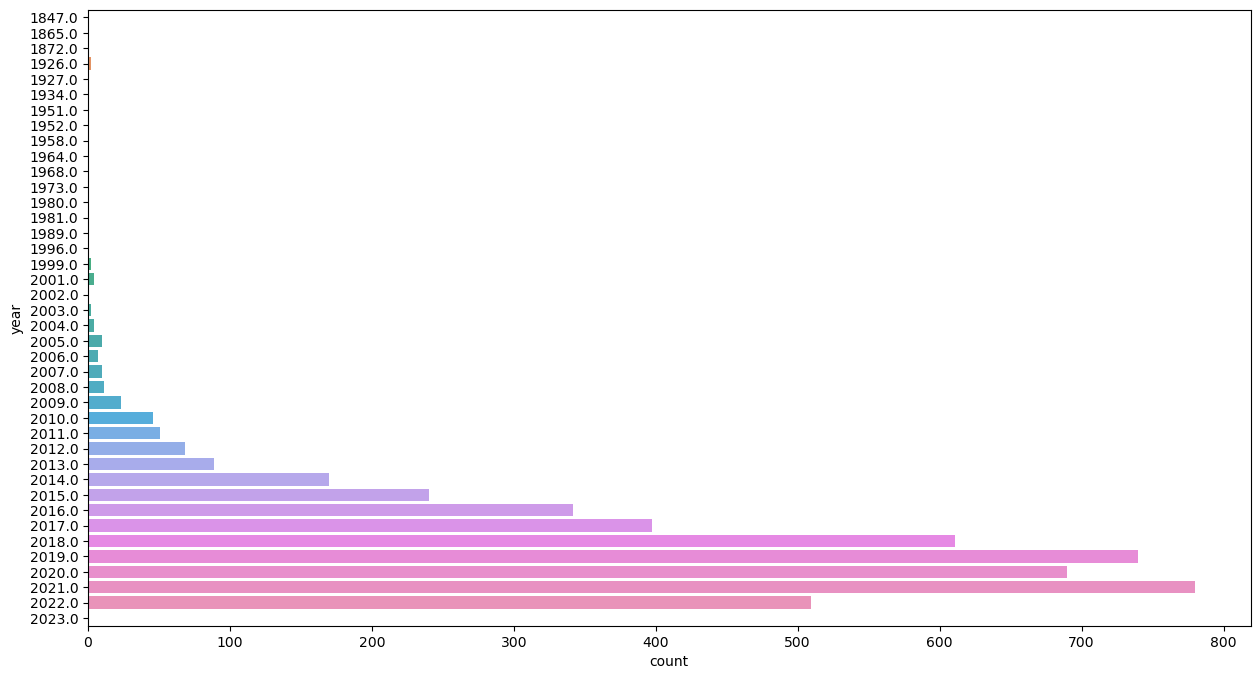

In [233]:
plt.figure(figsize=(15,8))
sns.countplot(y=vinissimus["year"])

**Year**: the min year is 1847 and the maximum is 2023. The majority of the wines are from the last 5 years (2018-2022).

### Price

<Axes: xlabel='price', ylabel='Count'>

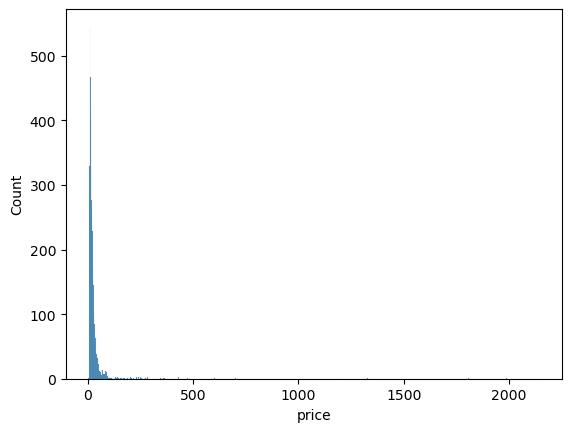

In [234]:
sns.histplot(vinissimus["price"])

<Axes: xlabel='price'>

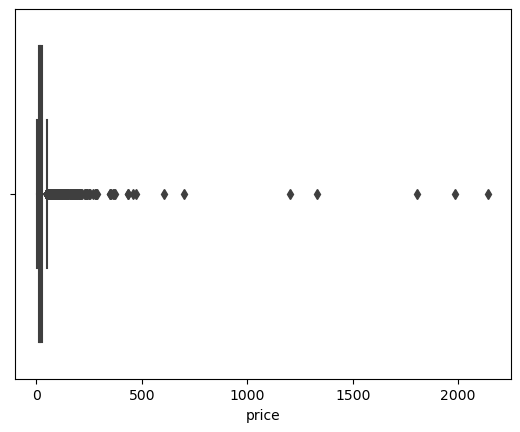

In [235]:
sns.boxplot(x=vinissimus["price"])

There are many outliers. We will split the data to analyse two subsets. There is a dense area of outliers below 200 pounds (aprox.), so we will set the threshold there. 

In [236]:
def outliers_limits(column, threshold):
    upper = np.nanpercentile(column, 75)
    lower = np.nanpercentile(column, 25)
    iqr = upper - lower
    upper_limit = upper + threshold * iqr
    lower_limit = lower - threshold * iqr
    return lower_limit, upper_limit

In [237]:
low_price, up_price = outliers_limits(vinissimus["price"], 15)
low_price, up_price 

(-193.39999999999998, 234.39999999999998)

In [238]:
price_outliers = vinissimus[(vinissimus["price"] < low_price) | (vinissimus["price"] > up_price)]
price_no_outliers = vinissimus[(vinissimus["price"] >= low_price) & (vinissimus["price"] <= up_price)]

In [239]:
len(price_outliers)

29

In [240]:
len(price_no_outliers)

5316

<Axes: xlabel='price', ylabel='Count'>

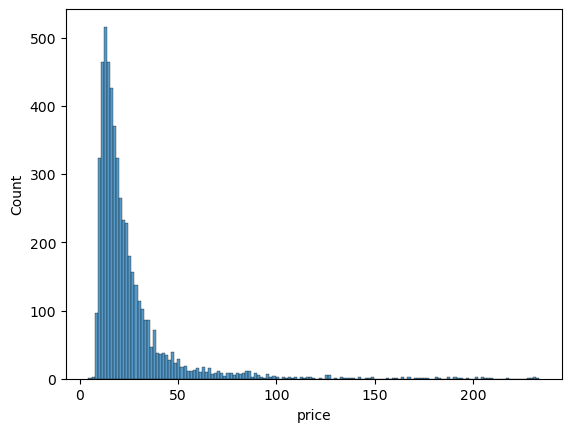

In [241]:
sns.histplot(x=price_no_outliers["price"])

In [242]:
px.histogram(price_no_outliers, x="price")

**Explore the outliers in price**

In [243]:
price_outliers.sort_values("price", ascending=False)

wine    year  \
3386                          Valduero Lantigua 1989  1989.0   
4649             Aalto XX Aniversario (Doble Magnum)     NaN   
1867                                   L'Ermita 2020  2020.0   
4706                           Valduero 12 años 1999  1999.0   
1448                                 La Faraona 2020  2020.0   
4996      Ca Les Viudes Vi de Mare 100 Anys (0.37 L)     NaN   
1790                    Sierra Cantabria Mágico 2017  2017.0   
1703                      Dominio de Es La Mata 2019  2019.0   
1508                             Les Aubaguetes 2019  2019.0   
4652                          Quiñón de Valmira 2019  2019.0   
4153                   Dominio de Es Carravilla 2019  2019.0   
4111                         Vega Sicilia Único 2012  2012.0   
3744         Dominio del Águila Canta La Perdiz 2018  2018.0   
4777                             Rumbo al Norte 2020  2020.0   
3617      Pérez Barquero Solera  Oloroso Lote B 2016  2016.0   
5013  Pérez Barquero Solera  Amontillado Lote B 2016  2016.0   
3462                               Clos Erasmus 2021  2021.0   
1785              Mas Doix  Garnatxa Centenària 2015  2015.0   
4504            Recaredo Tribut Segona Plenitud 1996  1996.0   
4761                         Clon de la Familia 2015  2015.0   
2699                       Enate Uno Chardonnay 2013  2013.0   
4852                  Vall Llach Mas de la Rosa 2019  2019.0   
1959               Sense Fronteres Guix Vermell 2017  2017.0   
2396                          El Tamboril Tinto 2020  2020.0   
2359           Manuel Raventós Enoteca Personal 2001  2001.0   
4930                 Dominio de Atauta San Juan 2013  2013.0   
2902                       Pérez Barquero Solera  PX     NaN   
2784      Don PX Toro Albalá Convento Selección 1958  1958.0   
2317          El Jardín de las Iguales Garnacha 2018  2018.0   

                            winery    price  bottle  type_wine  \
3386              Bodegas Valduero  2143.10    0.75        Red   
4649                         Aalto  1987.40    3.00        Red   
1867               Álvaro Palacios  1807.00    0.75        Red   
4706              Bodegas Valduero  1328.30    0.75        Red   
1448  Descendientes de J. Palacios  1203.40    0.75        Red   
4996            Arrels del Priorat   701.00    0.37    Dessert   
1790      Viñedos Sierra Cantabria   602.60    0.75        Red   
1703                 Dominio de ES   473.80    0.75        Red   
1508               Álvaro Palacios   457.60    0.75        Red   
4652      Bodegas Palacios Remondo   432.05     NaN        Red   
4153                 Dominio de ES   432.05    0.75        Red   
4111          Bodegas Vega Sicilia   370.85    0.75        Red   
3744            Dominio del Águila   365.40    0.75        Red   
4777        Comando G Viticultores   360.80    0.75        Red   
3617                Pérez Barquero   354.70     NaN    Dessert   
5013                Pérez Barquero   347.50    0.75    Dessert   
3462              Clos i Terrasses   346.85    0.75        Red   
1785               Celler Mas Doix   287.80    0.75        Red   
4504                      Recaredo   284.35     NaN  Sparkling   
4761                   Emilio Moro   284.35    0.75        Red   
2699                         Enate   282.60    0.75      White   
4852             Celler Vall Llach   275.60     NaN        Red   
1959              Terroir al Límit   268.80    0.75        Red   
2396        Comando G Viticultores   256.20    0.75        Red   
2359              Raventós i Blanc   250.80    0.75  Sparkling   
4930             Dominio de Atauta   250.75    0.75        Red   
2902                Pérez Barquero   241.20    0.75    Dessert   
2784                   Toro Albalá   241.20    0.75    Dessert   
2317             Bodegas Frontonio   239.40    0.75        Red   

       type_wine_details type_agriculture           region  \
3386                 Red     Conventional  Castilla y León   
4649                 R

<Axes: xlabel='price', ylabel='Count'>

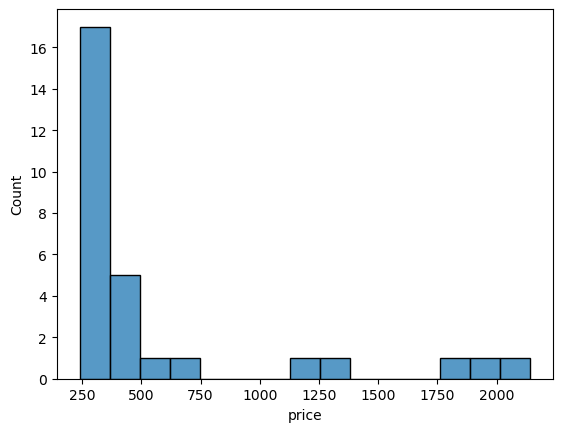

In [244]:
sns.histplot(x=price_outliers["price"])

In [245]:
px.histogram(price_outliers, x="price")

**Price**: there is a very big range of prices, between 4.4 and 2143 £. However, 75% of the wines are below 27.4 £, while the mean is 27.8 £: the distribution is highly right skewed. The most common values are between 10 and 18 £.

### Bottle volume

In [246]:
vinissimus["bottle"].value_counts(dropna=False)

0.75    4627
NaN      552
0.50      93
0.37      44
3.00      14
5.00       7
1.50       7
0.35       1
Name: bottle, dtype: int64

<Axes: xlabel='bottle', ylabel='count'>

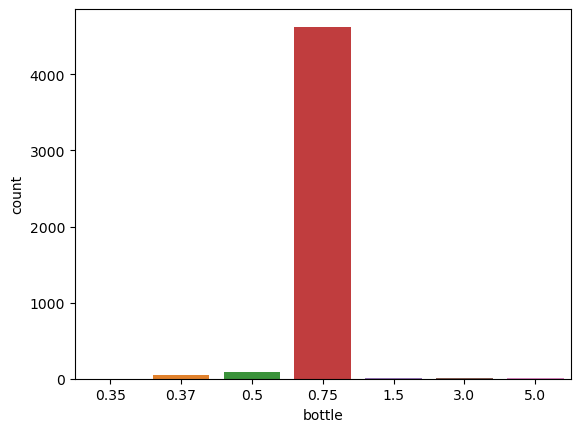

In [247]:
sns.countplot(x=vinissimus["bottle"])

**Bottle**: the vast majority of the bottles are the regular wine bottle size (0.75 l), but there is also a small number of smaller and larger volumnes. Possibilities here:
- Keep only the 0.75 bottles and drop the rest (they are probably also outliers in price).
- Maintain 3 categories: 0.75, smaller and larger volumes.

### Alcohol content

<Axes: xlabel='alcohol_content', ylabel='Count'>

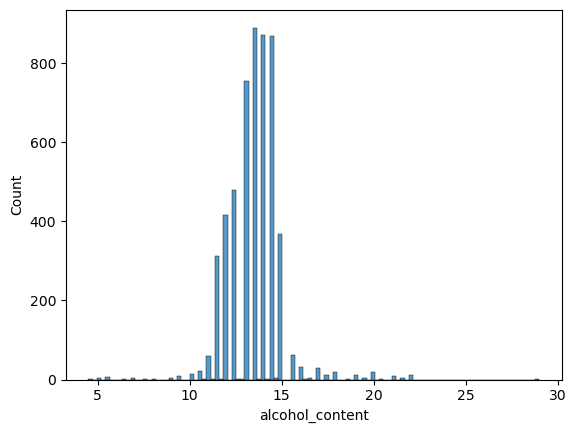

In [248]:
sns.histplot(x=vinissimus["alcohol_content"])

In [249]:
px.histogram(vinissimus, x="alcohol_content")

<Axes: xlabel='alcohol_content'>

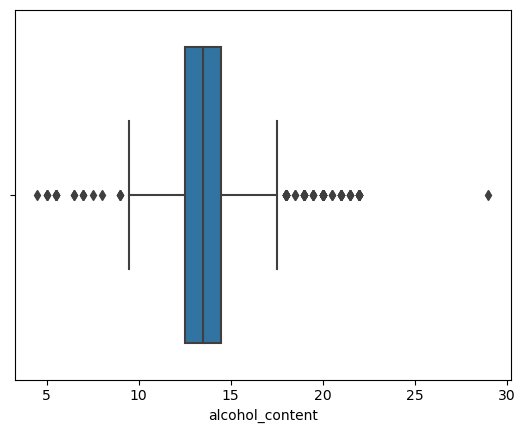

In [250]:
sns.boxplot(x=vinissimus["alcohol_content"])

**Alcohol content**: this feature is normally distributed, the mean and the median are the same, 13.5%. There are some outliers in both sides, that are probably frizzante wines in the lower levels of alcohol, and dessert wines in the higher alcohol content.

#### Explore the outliers in alcohol content

In [251]:
low_alcohol, up_alcohol = outliers_limits(vinissimus["alcohol_content"], 1.5)
low_alcohol, up_alcohol

(9.5, 17.5)

In [252]:
len(vinissimus[vinissimus["alcohol_content"]<low_alcohol])

20

In [253]:
vinissimus[vinissimus["alcohol_content"]<low_alcohol].sample(20)

wine    year  \
4443                     Yllera 5.5 Verdejo 2019  2019.0   
2717                               Barbadillo Vi     NaN   
4660                       Tarima Sparkling 2021  2021.0   
2993                     La Salada La Serra 2022  2022.0   
3616                                El Truc 2016  2016.0   
509         Mía Freixenet Sparkling Moscato Rosé     NaN   
2959                        Caligo Essència 2009  2009.0   
4840                   Pandorga PX 2015 (0.37 L)     NaN   
1491               Còsmic Essència 2017 (0.35 L)     NaN   
1828                  González Byass Croft Twist     NaN   
1100                           Libalis Frizz 5.5     NaN   
4100                   Win 5.0 Verdejo Frizzante     NaN   
989   Cuatro Rayas 61 Frizzante 5.5 Verdejo 2020  2020.0   
438                  Pinord Moscato Mediterráneo     NaN   
3688                  Fragantia Nº 6 Rosado 2018  2018.0   
3899              Yllera 7.5 Ice Revolution 2019  2019.0   
654           Palacio de Bornos Frizzante Rosado     NaN   
3085                   Fragantia 5.5 Blanco 2022  2022.0   
280              Mía Freixenet Sparkling Moscato     NaN   
1048                      Win 5.0 Rosé Frizzante     NaN   

                     winery  price  bottle  type_wine     type_wine_details  \
4443                 Yllera  11.20    0.75  Sparkling  Semi-sparkling sweet   
2717     Bodegas Barbadillo  13.20    0.75      White                 White   
4660         Bodegas Volver  11.00    0.75  Sparkling                  Cava   
2993       Celler la Salada  19.85    0.75      White                 White   
3616      Masia de la Roqua  14.30     NaN      White                 White   
509               Freixenet   9.80    0.75  Sparkling  Semi-sparkling sweet   
2959         DG Viticultors  61.40    0.75    Dessert             Noble Rot   
4840         Bodega Cota 45  41.60     NaN    Dessert                Raisin   
1491       Còsmic Vinyaters  37.40    0.35    Dessert                 Sweet   
1828         González Byass  10.80    0.75      White                 White   
1100  Castillo de Maetierra   9.60    0.75      White                 White   
4100            Matarromera   9.00    0.75  Sparkling  Semi-sparkling sweet   
989     Bodega Cuatro Rayas  10.40    0.75  Sparkling  Semi-sparkling sweet   
438          Bodegas Pinord   9.00    0.75      White                 White   
3688       Finca Constancia  10.50    0.75       Rosé                  Rosé   
3899                 Yllera  12.70     NaN        Red                   Red   
654       Palacio de Bornos  11.00    0.75  Sparkling  Semi-sparkling sweet   
3085       Finca Constancia  10.80    0.75      White                 White   
280               Freixenet   9.80    0.75  Sparkling  Semi-sparkling sweet   
1048            Matarromera   9.20    0.75  Sparkling  Semi-sparkling sweet   

     type_agriculture                region          region_gi  \
4443     Conventional      Wines without GI   Wines without GI   
2717     Conventional      Wines without GI   Wines without GI   
4660     Conventional  Comunidad Valenciana           Alicante   
2993     Conventional              Cataluña            Penedès   
3616     Conventional      Wines without GI   Wines without GI   
509      Conventional      Wines without GI   Wines without GI   
2959     Conventional              Cataluña            Penedès   
4840     Conventional      Wines without GI   Wines without GI   
1491       Biodynamic      Wines without GI   Wines without GI   
1828     Conventional             Andalucía   Jerez-Manzanilla   
1100     Conventional              La Rioja  Valles de Sadacia   
4100     Conventional      Wines without GI   Wines without GI   
989      Conventional       Castilla y León   Castile and León   
438      Conventional              Cataluña            Penedès   
3688     Conventional    Castilla-La Mancha           Castilla   
3899     Conventional      Wines without GI   Wines without GI   
6

In [254]:
len(vinissimus[vinissimus["alcohol_content"]>up_alcohol])

85

In [255]:
vinissimus[vinissimus["alcohol_content"]>up_alcohol].sample(20)

wine    year  \
4822                 La Bota de Amontillado 69 (Magnum)     NaN   
3966                        Tradición Palo Cortado VORS     NaN   
1962                       Málaga Virgen Chorrera Cream     NaN   
2147  Toro de Albalá Marqués Poley Palo Cortado (0.5 L)     NaN   
3275  Gutiérrez Colosía Oloroso Solera Familiar (0.5 L)     NaN   
4794              Valdespino Palo Cortado Cardenal VORS     NaN   
4261                   Valdespino Amontillado Tio Diego     NaN   
3483                          Osborne Santa María Cream     NaN   
5092                          Juan Piñero Cream (0.5 L)     NaN   
3702                         La Bota de Palo Cortado 92     NaN   
3490          Lustau Oloroso Emperatriz Eugenia (0.5 L)     NaN   
4653           Oloroso Colección Roberto Amillo (0.5 L)     NaN   
5285                 Pérez Barquero Solera  Amontillado     NaN   
4856          Oloroso Viejo Faraón 30 Años VORS (0.5 L)     NaN   
1132                          Callejuela Oloroso Origen     NaN   
4537  Sacristía AB Amontillado Muy Viejo En Rama (0....     NaN   
3590                De Muller Dom Juan Fort Solera 1865  1865.0   
5116              Málaga Virgen Seco Trasañejo (0.37 L)     NaN   
4962              Osborne VORS Amontillado 51.1 (0.5 L)     NaN   
4173                        De Muller Aureo Dulce Añejo     NaN   

                                                 winery   price  bottle  \
4822                                     Equipo Navazos   96.40    1.50   
3966                                  Bodegas Tradición   89.95     NaN   
1962                              Bodegas Málaga Virgen   15.00    0.75   
2147                                        Toro Albalá   46.00    0.50   
3275                          Bodegas Gutiérrez Colosía   86.20    0.50   
4794                         Valdespino (Grupo Estévez)  206.20     NaN   
4261                         Valdespino (Grupo Estévez)   20.90    0.75   
3483                                            Osborne   15.80    0.75   
5092                                Bodegas Juan Piñero   26.05    0.50   
3702                                     Equipo Navazos   68.90    0.75   
3490                                      Emilio Lustau   29.60    0.50   
4653                                    Bodegas Altanza   46.60    0.50   
5285                                     Pérez Barquero  204.25    0.75   
4856                          Bodegas Hidalgo La Gitana   82.75    0.50   
1132                                         Callejuela   30.80    0.75   
4537  Sacristía AB - Selección de Antonio Barbadillo...   85.20     NaN   
3590                                          De Muller   55.40    0.75   
5116                              Bodegas Málaga Virgen   38.45    0.37   
4962                                            Osborne   90.35    0.50   
4173                                          De Muller   26.00    0.75   

     type_wine    type_wine_details type_agriculture     region  \
4822   Dessert   Amontillado sherry     Conventional  Andalucía   
3966   Dessert  Palo Cortado sherry     Conventional  Andalucía   
1962   Dessert         Cream sherry     Conventional  Andalucía   
2147   Dessert  Palo Cortado sherry     Conventional  Andalucía   
3275   Dessert       Oloroso sherry     Conventional  Andalucía   
4794   Dessert  Palo Cortado sherry     Conventional  Andalucía   
4261   Dessert   Amontillado sherry     Conventional  Andalucía   
3483   Dessert         Cream sherry     Conventional  Andalucía   
5092   Dessert         Cream sherry     Conventional  Andalucía   
3702   Dessert  Palo Cortado sherry     Conventional  Andalucía   
3490   Dessert       Oloroso sherry     Conventional  Andalucía   
4653   Dessert       Oloroso sherry     Conventional  Andalucía   
5285   Dessert   Amontillado sherry     Conventional  Andalucía   
4856   Dessert       Oloroso sherry     Conventional  Andalucía   
1132   Dessert       Oloroso sherry     Conventional  Andalucí

In [256]:
vinissimus[vinissimus["alcohol_content"]>up_alcohol]["type_wine"].value_counts()

Dessert    85
Name: type_wine, dtype: int64

The upper outliers are all dessert wines (Sherry wines mainly). On the other side, there is more variability in the lower outliers, there are sparkling, red, white, rosé, dessert wines... although probably many of them are sparkling wines (of the frizzante type).

### Customer reviews
This feature is fundamental to understand how are the customers of the online shop.

<Axes: xlabel='customer_reviews', ylabel='Count'>

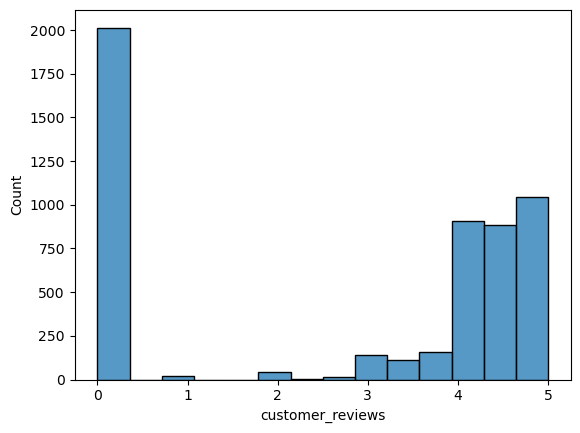

In [257]:
sns.histplot(x=vinissimus["customer_reviews"])

In [258]:
vinissimus["customer_reviews"].value_counts(dropna=False)

0.0    2014
5.0     737
4.0     722
4.5     355
4.3     256
4.7     163
4.4     153
3.0     142
4.6     123
4.8     120
4.2     116
3.5      84
4.1      68
3.7      55
3.8      53
2.0      43
3.9      38
4.9      26
3.3      26
1.0      20
2.5      11
3.6       9
3.4       3
2.8       2
2.7       2
NaN       2
2.9       1
2.3       1
Name: customer_reviews, dtype: int64

**Customer reviews**: There is a large number of wines that have 0 points, we will have to look at the number of reviews since it is probable that they don't have any review. Apart from that, the majority of wines have a high puntuation, between 4 and 5 points.

### Number of customer reviews

<Axes: xlabel='customer_reviews_number', ylabel='Count'>

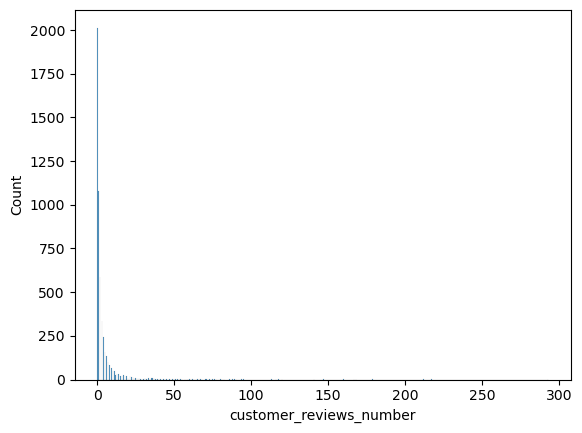

In [259]:
sns.histplot(x=vinissimus["customer_reviews_number"])

We are going to consider only the wines that have at least 1 review for analysing the customer reviews.

In [260]:
vinissimus_reviews = vinissimus[vinissimus["customer_reviews_number"]>0]
vinissimus_reviews.shape

(3329, 24)

In [261]:
len(vinissimus_reviews)/len(vinissimus)*100

62.28250701590271

62% of the wines in the dataset have received at least one customer review.

In [262]:
vinissimus_reviews.describe()

year        price       bottle  alcohol_content  \
count  3009.000000  3329.000000  3067.000000      3325.000000   
mean   2018.651047    22.689336     0.757082        13.533474   
std       6.421001    22.671907     0.219715         1.368725   
min    1847.000000     7.400000     0.350000         4.500000   
25%    2018.000000    12.800000     0.750000        13.000000   
50%    2019.000000    17.000000     0.750000        13.500000   
75%    2021.000000    24.500000     0.750000        14.500000   
max    2023.000000   370.850000     5.000000        22.000000   

       customer_reviews  customer_reviews_number  parker_score_num  \
count       3329.000000              3329.000000        292.000000   
mean           4.294683                 6.867227         92.979452   
std            0.644955                14.928247          2.010177   
min            1.000000                 1.000000         90.000000   
25%            4.000000                 1.000000         91.000000   
50%            4.400000                 2.000000         93.000000   
75%            4.800000                 6.000000         94.000000   
max            5.000000               293.000000        100.000000   

       penin_score  
count    65.000000  
mean     92.123077  
std       1.824381  
min      90.000000  
25%      91.000000  
50%      92.000000  
75%      93.000000  
max      97.000000

The statistics of some features have changed, the most striking change is in the maximum price, from around 2000 £ to 370 £. This dataframe is interesting, because it seems to represent the wines that the clients are actually buying. <br>
Regarding the customer reviews:
- Number of reviews: we see that most wines have few reviews (75% are under 6) but some wines are very popular and get up to 293 reviews. <br>
- Score: most wines are between 4-5 points. 

<Axes: xlabel='customer_reviews', ylabel='Count'>

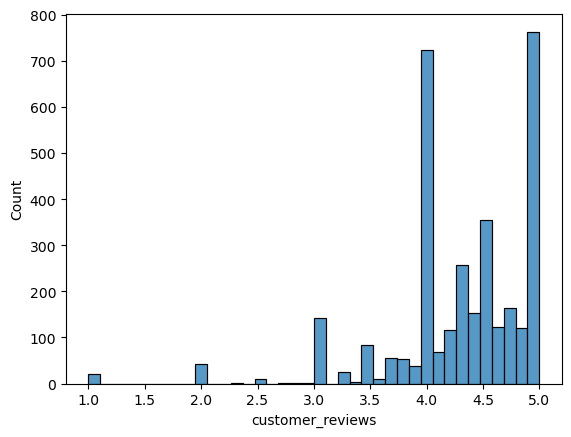

In [263]:
sns.histplot(x=vinissimus_reviews["customer_reviews"])

<Axes: xlabel='customer_reviews_number', ylabel='Count'>

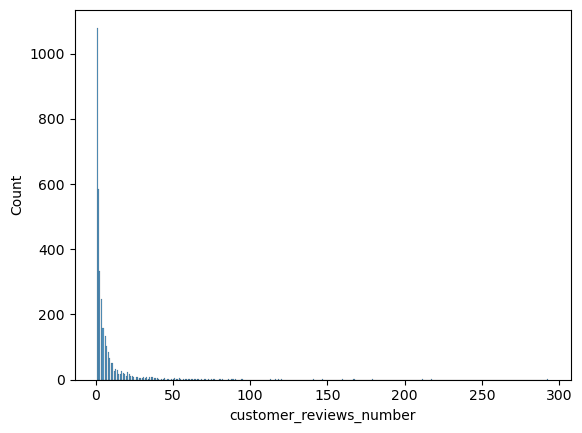

In [264]:
sns.histplot(x=vinissimus_reviews["customer_reviews_number"])

<Axes: xlabel='price', ylabel='Count'>

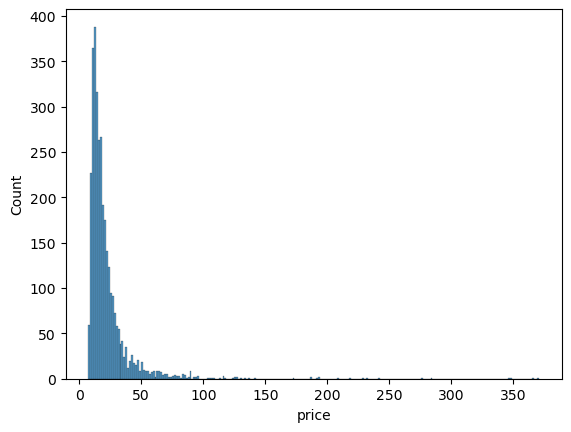

In [265]:
sns.histplot(x=vinissimus_reviews["price"])

In [266]:
# Create a new column for turning the count of customers reviews into categories

vinissimus_reviews["number_reviews_categorical"] = vinissimus_reviews["customer_reviews_number"]
vinissimus_reviews["number_reviews_categorical"] = vinissimus_reviews["number_reviews_categorical"].apply(lambda x:
                                                                                                         "1-10" if x<11 else
                                                                                                         ("11-50" if x<51 else
                                                                                                         ("51-100" if x<101 else
                                                                                                         "101-300")))
vinissimus_reviews["number_reviews_categorical"].value_counts()

1-10       2840
11-50       426
51-100       49
101-300      14
Name: number_reviews_categorical, dtype: int64

<Axes: xlabel='number_reviews_categorical', ylabel='count'>

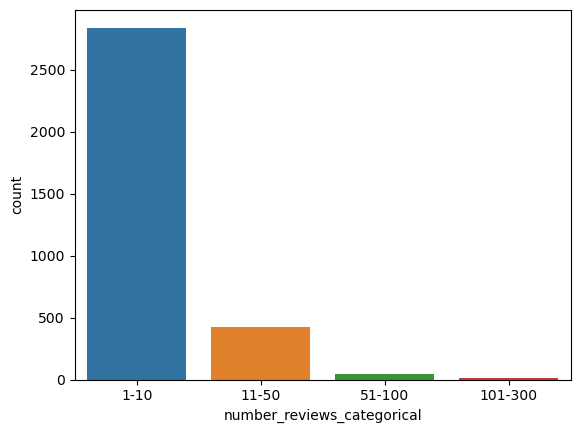

In [267]:
order = vinissimus_reviews["number_reviews_categorical"].value_counts().index
sns.countplot(data=vinissimus_reviews, x="number_reviews_categorical", order=order)

In [268]:
num_reviews_cat = pd.DataFrame(vinissimus_reviews["number_reviews_categorical"].value_counts().reset_index().values)
num_reviews_cat.to_csv("num_reviews_cat.csv", index=False) # export for the presentation

### Parker and Peñín scores
#### Some information about the scores
The **Parker score**, often referred to as the Parker Points or Parker Rating, is a wine rating system developed by Robert Parker, an influential wine critic. The system assigns a numerical score to wines on a scale typically ranging from 50 to 100, with higher scores indicating better quality. Generally, the wineries only publish the score if it is a very good one, above 90. <br>
https://www.robertparker.com/about/the-rating-system <br>
The **Peñín score**, on the other hand, is a wine rating system developed by the Peñín Guide, a renowned Spanish wine publication founded by José Peñín. The Peñín Guide is considered one of the most influential wine guides in Spain, providing comprehensive reviews and ratings for Spanish wines. The Peñín score evaluates wines on a 100-point scale, similar to the Parker score, but it is specialized in Spanish wines. Again, the wineries publish the score if it's high. <br>
https://guiapenin.wine/

In [269]:
order = list(vinissimus["parker_score"].unique())
order.remove(np.nan)
order = sorted(order)
order.remove("100")
order.append("100")
# order

<Axes: xlabel='parker_score', ylabel='count'>

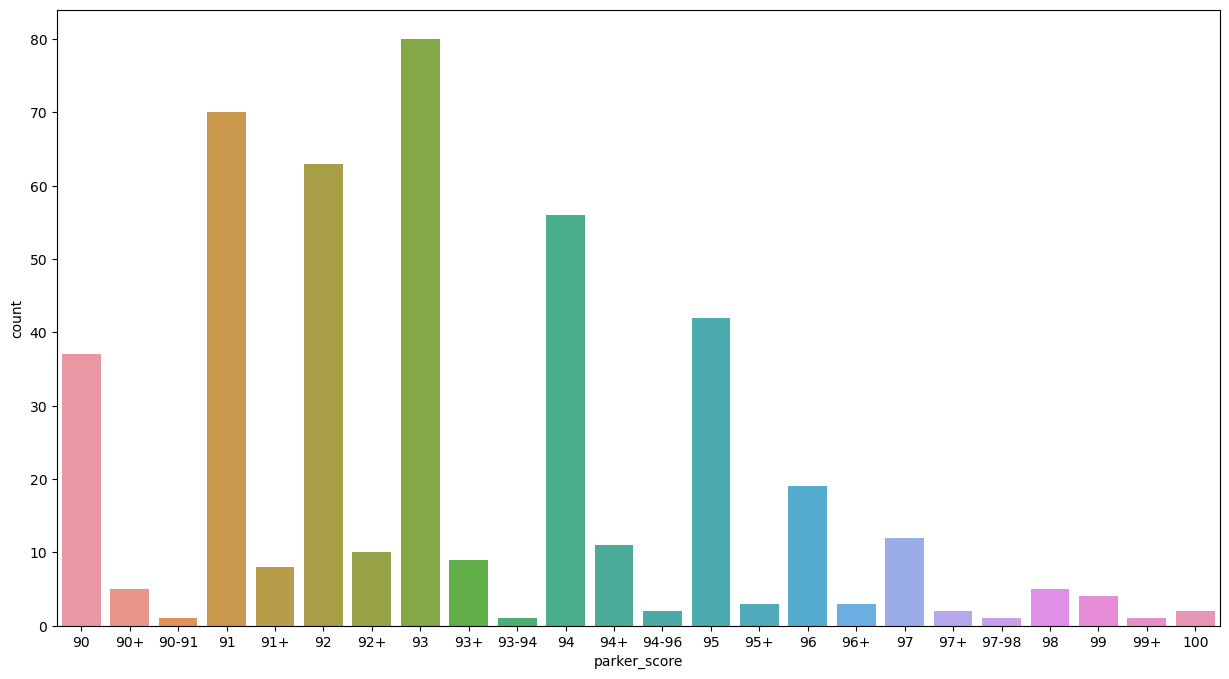

In [270]:
plt.figure(figsize=(15,8))
sns.countplot(x=vinissimus["parker_score"], order=order)

<Axes: xlabel='penin_score', ylabel='count'>

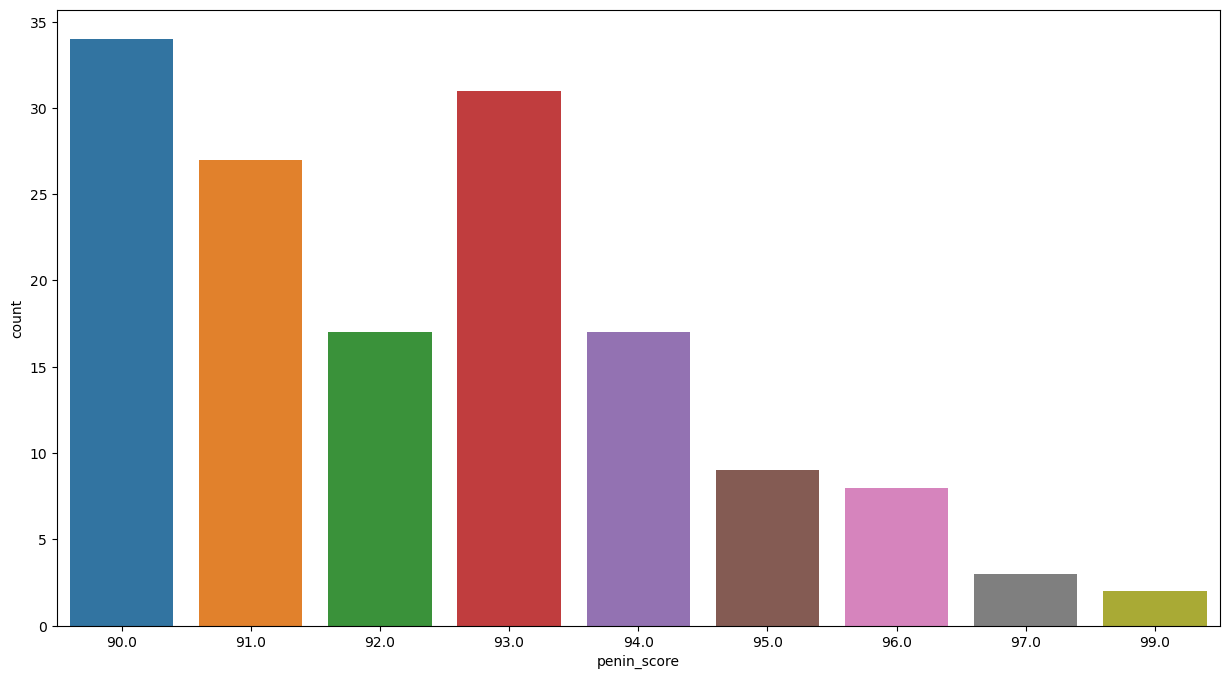

In [271]:
plt.figure(figsize=(15,8))
sns.countplot(x=vinissimus["penin_score"])

In [272]:
len(vinissimus)

5345

In [273]:
# Wines that have at least one of the scores

score_cols = ['parker_score', 'parker_score_num', 'penin_score']

len(vinissimus.dropna(subset=score_cols, how='all')) # Drops rows that have NaN in all the scores columns

556

In [274]:
513/5154*100

9.953434225844005

Only 10% of our dataset has won a Parker or Peñín score. What about the reviewed wines?

In [275]:
len(vinissimus_reviews)

3329

In [276]:
len(vinissimus_reviews.dropna(subset=score_cols, how='all'))

339

The relationship is the same (around 10%). <br>
We will create a new feature with the wines that have wone a Parker or a Peñín score.

In [277]:
vinissimus.columns

Index(['wine', 'year', 'winery', 'price', 'bottle', 'type_wine',
       'type_wine_details', 'type_agriculture', 'region', 'region_gi',
       'grapes', 'num_varieties', 'tasting_bouquet', 'tasting_mouth',
       'alcohol_content', 'customer_reviews', 'customer_reviews_number',
       'parker_score', 'parker_score_num', 'penin_score', 'image', 'url',
       'bouquet_norm', 'mouth_norm'],
      dtype='object')

In [278]:
vinissimus["parker_penin_score"] = 0
vinissimus.loc[pd.notna(vinissimus["parker_score"]), "parker_penin_score"] = 1
vinissimus.loc[pd.notna(vinissimus["penin_score"]), "parker_penin_score"] = 1
vinissimus["parker_penin_score"].value_counts()

0    4789
1     556
Name: parker_penin_score, dtype: int64

## Categorical features

In [279]:
vinissimus.select_dtypes(object).columns

Index(['wine', 'winery', 'type_wine', 'type_wine_details', 'type_agriculture',
       'region', 'region_gi', 'grapes', 'num_varieties', 'tasting_bouquet',
       'tasting_mouth', 'parker_score', 'image', 'url', 'bouquet_norm',
       'mouth_norm'],
      dtype='object')

### Wine names

In [281]:
len(vinissimus)

5345

In [282]:
vinissimus["wine"].nunique()

5344

There are 5345 unique wines in the dataset (there are 2 wines with the same name).

### Wineries 

In [283]:
vinissimus["winery"].nunique()

1212

We have 1212 unique wineries. Let's have a look at the ones that have more wines. 

In [292]:
winery_count = vinissimus["winery"].value_counts()
top_winery_count = winery_count[winery_count > 10]
# top_winery_count

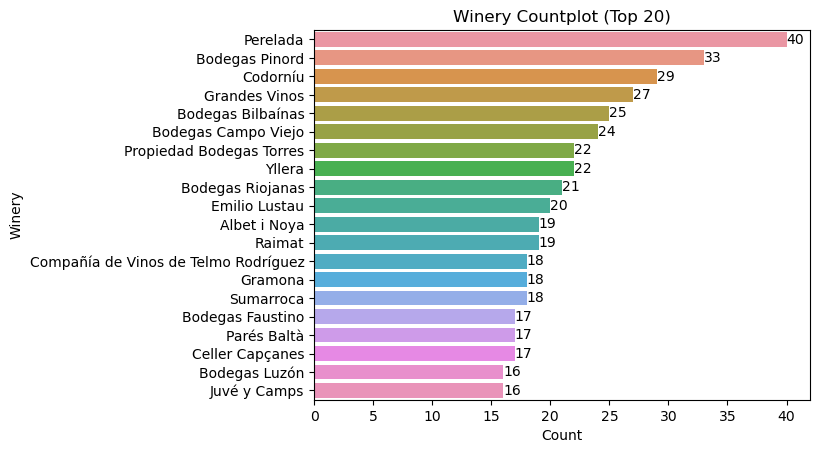

In [285]:
ax = sns.countplot(data=vinissimus, y="winery", order=vinissimus["winery"].value_counts().iloc[:20].index)
ax.bar_label(ax.containers[0])
plt.xlabel("Count")
plt.ylabel("Winery")
plt.title("Winery Countplot (Top 20)")
plt.show()

### Type of wine 

In [286]:
vinissimus["type_wine"].value_counts()

Red          2759
White        1506
Sparkling     480
Dessert       304
Rosé          296
Name: type_wine, dtype: int64

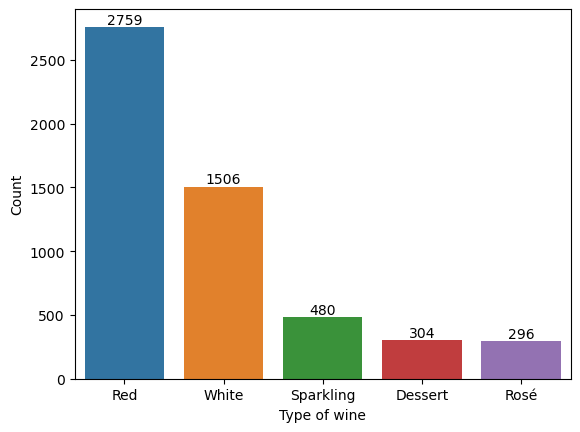

In [287]:
ax = sns.countplot(x=vinissimus["type_wine"], order=vinissimus["type_wine"].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xlabel("Type of wine")
plt.ylabel("Count")
plt.show()

The majority of wines are red, followed by white wines. There is also a small number of sparkling, rosé and dessert wines.

### Type of wine (details)

In [288]:
vinissimus["type_wine_details"].value_counts()

Red                                   2749
White                                 1474
Cava                                   432
Rosé                                   245
Natural sweet                           64
Oak-aged Rosé                           36
Orange                                  32
Pet Nat                                 28
Late harvest                            26
Sweet                                   25
Amontillado sherry                      25
Palo Cortado sherry                     23
Fino sherry                             23
Oloroso sherry                          22
Manzanilla sherry                       20
Raisin                                  16
Vino rancio                             15
Nouveau                                 10
Clarete                                 10
Cream sherry                            10
Sparkling                                8
Semi-sweet                               7
Semi-sparkling sweet                     7
Noble Rot  

Look at the distribution of each broad category of wines. 

In [289]:
def plot_type(category):
    df = vinissimus[vinissimus["type_wine"]==category]
    print(f"Types of wines in: {category}")
    print(df["type_wine_details"].value_counts())
    ax = sns.countplot(y=df["type_wine_details"], order=df["type_wine_details"].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.show()

In [290]:
categories = vinissimus["type_wine"].unique()

Types of wines in: Red
Red        2749
Nouveau      10
Name: type_wine_details, dtype: int64


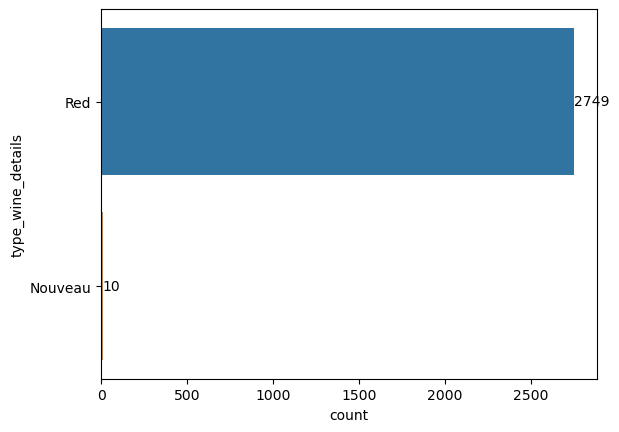

Types of wines in: Sparkling
Cava                    432
Pet Nat                  28
Sparkling                 8
Semi-sparkling sweet      7
Frizzante white           4
Frizzante rosé            1
Name: type_wine_details, dtype: int64


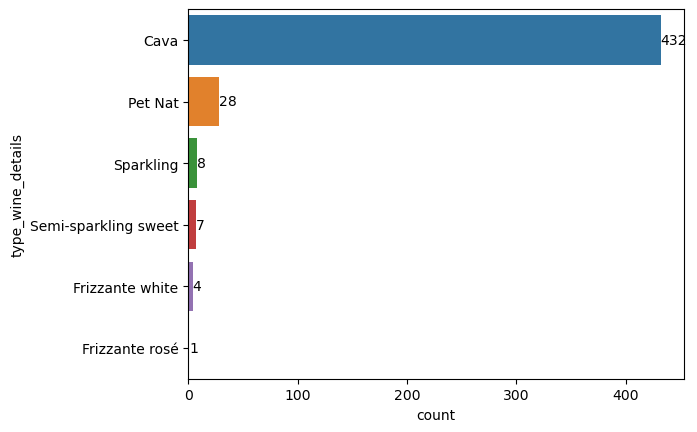

Types of wines in: White
White     1474
Orange      32
Name: type_wine_details, dtype: int64


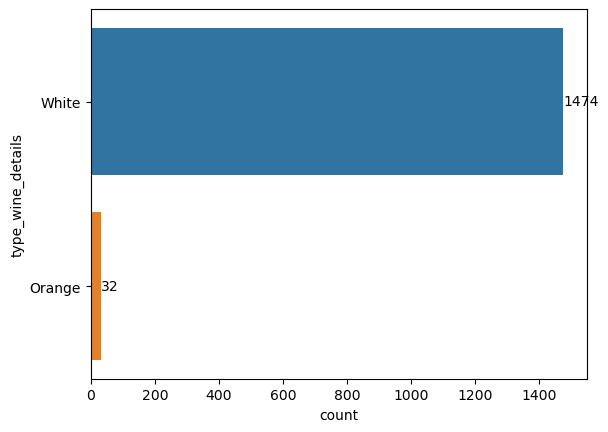

Types of wines in: Rosé
Rosé             245
Oak-aged Rosé     36
Clarete           10
Rosé Young         5
Name: type_wine_details, dtype: int64


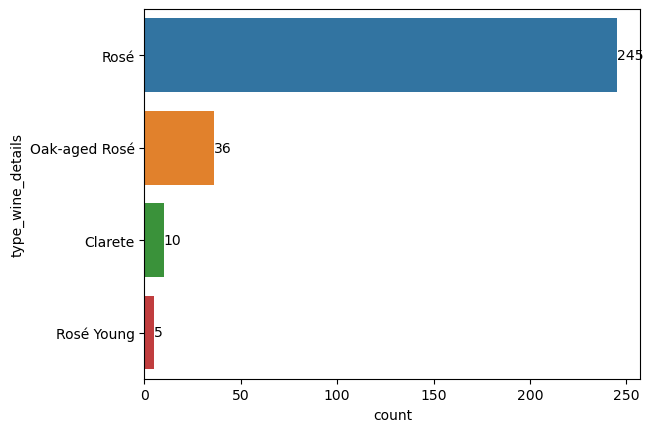

Types of wines in: Dessert
Natural sweet                         64
Late harvest                          26
Amontillado sherry                    25
Sweet                                 25
Palo Cortado sherry                   23
Fino sherry                           23
Oloroso sherry                        22
Manzanilla sherry                     20
Raisin                                16
Vino rancio                           15
Cream sherry                          10
Semi-sweet                             7
Noble Rot                              6
Fortified                              5
Icewine                                4
Mistela                                4
Medium sherry                          3
Vino Naranja del Condado de Huelva     2
Pale Cream sherry                      1
Flavoured sweet                        1
Fortified Amontillado                  1
Fortified Fino                         1
Name: type_wine_details, dtype: int64


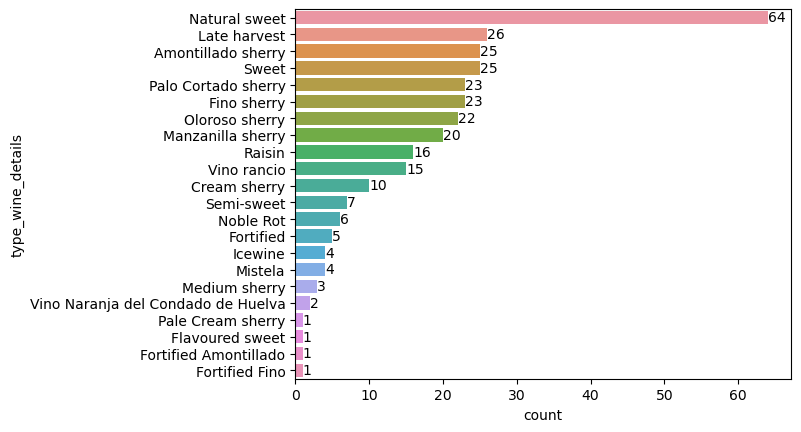

In [291]:
for category in categories:
    plot_type(category)

### Grapes

In [64]:
grapes_df = pd.read_csv("C:/Users/mboll/OneDrive/Documentos/DATA/Ironhack/Final_project/02-cleaning/clean_grapes.csv")
grapes_df.head()

wine    year                 winery  price  \
0            Ultreia Saint Jacques 2021  2021.0  Raúl Pérez Viticultor   16.2   
1                        Blanc Pescador     NaN               Perelada    7.8   
2                        Blanc Pescador     NaN               Perelada    7.8   
3                        Blanc Pescador     NaN               Perelada    7.8   
4  Bach Extrísimo Blanco Semidulce 2021  2021.0             Masia Bach    9.4   

   bottle  type_wine type_wine_details type_agriculture            region  \
0    0.75        Red               Red     Conventional   Castilla y León   
1    0.75  Sparkling   Frizzante white     Conventional  Wines without GI   
2    0.75  Sparkling   Frizzante white     Conventional  Wines without GI   
3    0.75  Sparkling   Frizzante white     Conventional  Wines without GI   
4    0.75      White             White     Conventional          Cataluña   

          region_gi     grapes num_varieties  \
0            Bierzo     Mencia      Varietal   
1  Wines without GI    Macabeo         Blend   
2  Wines without GI  Parellada         Blend   
3  Wines without GI   Xarel·lo         Blend   
4         Catalunya   Xarel·lo         Blend   

                                     tasting_bouquet  \
0                                Raspberry / Violets   
1          Aromatic / Fruit aromas / Highly aromatic   
2          Aromatic / Fruit aromas / Highly aromatic   
3          Aromatic / Fruit aromas / Highly aromatic   
4  Highly aromatic / Complex / Fruit aromas / Flo...   

                                       tasting_mouth  alcohol_content  \
0   Red fruit / Mineral / Voluminous / Medium-bodied             13.5   
1                       Light / Pleasant / Sparkling             11.5   
2                       Light / Pleasant / Sparkling             11.5   
3                       Light / Pleasant / Sparkling             11.5   
4  Good entry / Structured / Balanced / Good acid...             11.5   

   customer_reviews  customer_reviews_number parker_score  parker_score_num  \
0               4.2                    217.0          NaN               NaN   
1               4.4                     45.0          NaN               NaN   
2               4.4                     45.0          NaN               NaN   
3               4.4                     45.0          NaN               NaN   
4               4.8                     95.0          NaN               NaN   

   penin_score                                              image  \
0          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
1          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
2          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
3          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
4          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   

                                                 url  \
0  https://www.vinissimus.com/en/wine/ultreia-sai...   
1  https://www.vinissimus.com/en/wine/blanc-pesca...   
2  https://www.vinissimus.com/en/wine/blanc-pesca...   
3  https://www.vinissimus.com/en/wine/blanc-pesca...   
4  https://www.vinissimus.com/en/wine/bach-extris...   

                                        bouquet_norm  \
0                                  raspberry violets   
1              aromatic fruit_aromas highly_aromatic   
2              aromatic fruit_aromas highly_aromatic   
3              aromatic fruit_aromas highly_aromatic   
4  highly_aromatic complex fruit_aromas floral_sc...   

                                          mouth_norm  
0         red_fruit mineral voluminous medium-bodied  
1                           light pleasant sparkling  
2                           light pleasant sparkling  
3                           light pleasant sparkling  
4  good_entry structured balanced good_acidity fl...

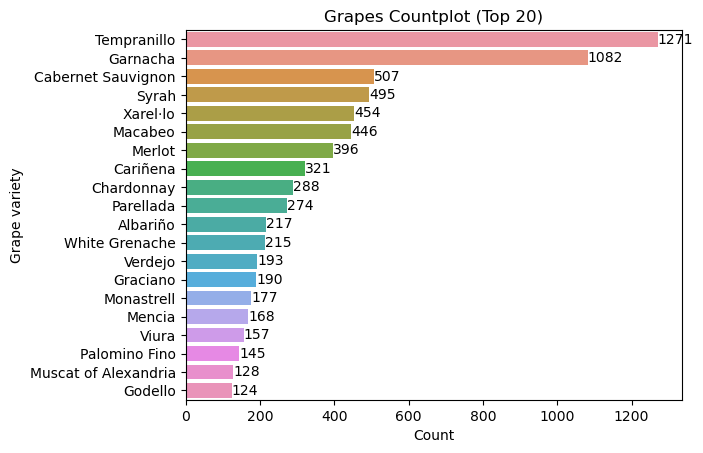

In [65]:
ax = sns.countplot(data=grapes_df, y="grapes", order=grapes_df["grapes"].value_counts().iloc[:20].index)
ax.bar_label(ax.containers[0])
plt.xlabel("Count")
plt.ylabel("Grape variety")
plt.title("Grapes Countplot (Top 20)")
plt.show()

In [66]:
grape_count = pd.DataFrame(grapes_df["grapes"].value_counts())
# grape_count

In [67]:
len(grape_count[(grape_count["grapes"] > 1) & (grape_count["grapes"] < 21)])

98

In [68]:
grape_count.describe()

grapes
count   199.000000
mean     47.753769
std     143.356745
min       1.000000
25%       1.000000
50%       5.000000
75%      20.500000
max    1271.000000

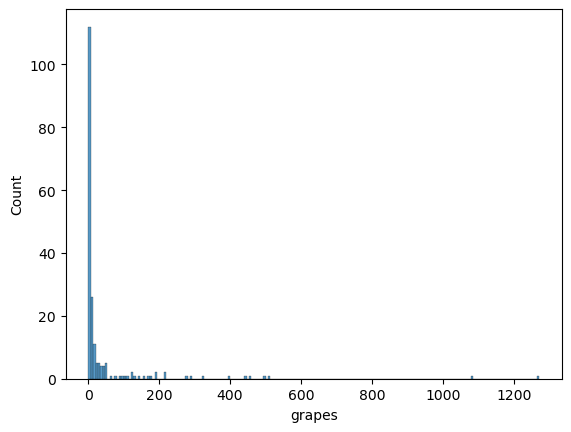

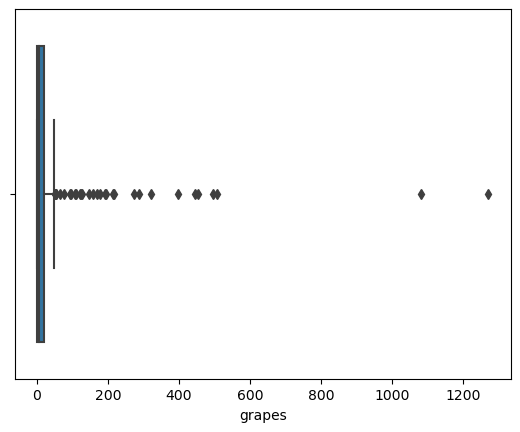

In [69]:
sns.histplot(grape_count["grapes"])
plt.show()
sns.boxplot(x=grape_count["grapes"])
plt.show()    

In [70]:
grape_count["categories"] = grape_count["grapes"].apply(lambda x: "1" if x == 1 else("2-20" if x < 21 else ">20"))
grape_count["categories"].value_counts()

2-20    98
1       51
>20     50
Name: categories, dtype: int64

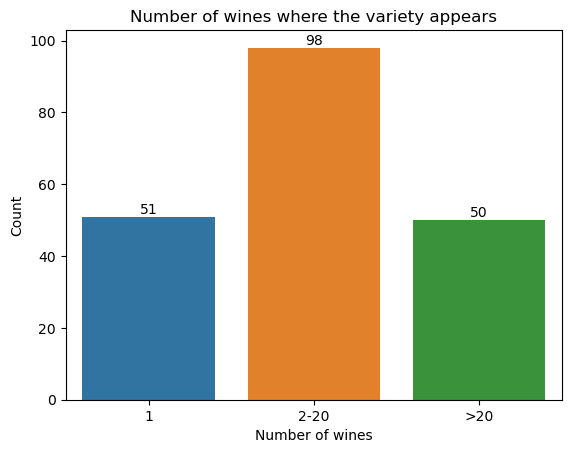

In [71]:
ax = sns.countplot(data=grape_count, x="categories", order=["1", "2-20", ">20"])
ax.bar_label(ax.containers[0])
plt.xlabel("Number of wines")
plt.ylabel("Count")
plt.title("Number of wines where the variety appears")
plt.show()

There are almost 200 different grapes present in the dataset, with 25% of them (51 grapes) that are present in only one wine. 50% of them are present in only 2 to 20 wines, and only 50 grapes are present in more than 20 wines.

### Varietal vs blend wines

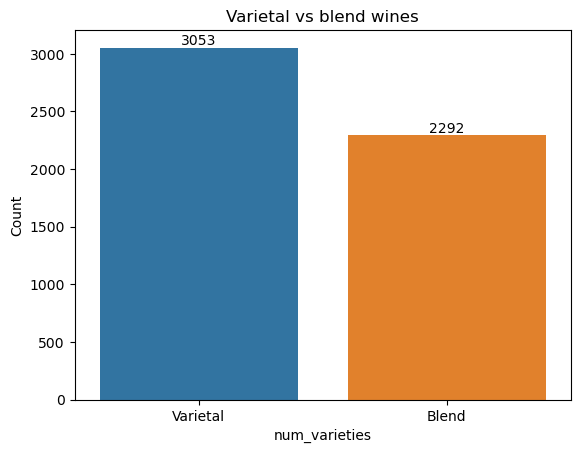

In [72]:
ax = sns.countplot(data=vinissimus, x="num_varieties")
ax.bar_label(ax.containers[0])
plt.ylabel("Count")
plt.title("Varietal vs blend wines")
plt.show()

### Type of agriculture

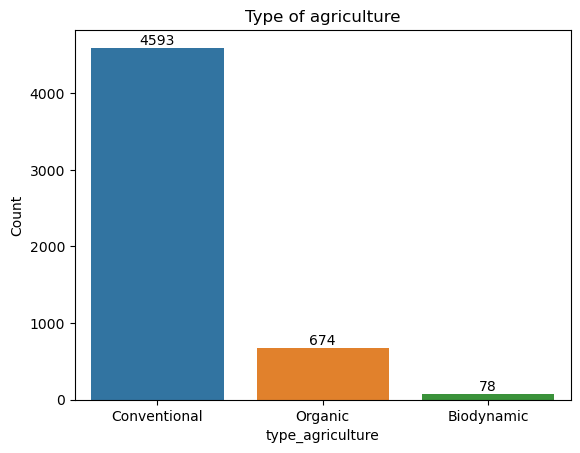

In [73]:
ax = sns.countplot(data=vinissimus, x="type_agriculture")
ax.bar_label(ax.containers[0])
plt.ylabel("Count")
plt.title("Type of agriculture")
plt.show()

### Region

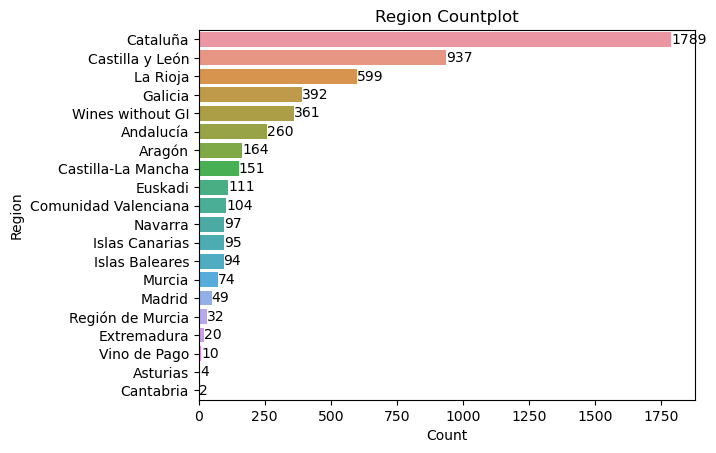

In [74]:
ax = sns.countplot(data=vinissimus, y="region", order=vinissimus["region"].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xlabel("Count")
plt.ylabel("Region")
plt.title("Region Countplot")
plt.show()

In [75]:
def plot_regions(category):
    df = vinissimus[vinissimus["region"]==category]
    print(f"Geographical indications in: {category}")
    print(df["region_gi"].value_counts())
    ax = sns.countplot(y=df["region_gi"], order=df["region_gi"].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.show()

In [76]:
categories = vinissimus["region"].unique()

Geographical indications in: Castilla y León
Ribera del Duero             369
Rueda                        147
Castile and León             129
Bierzo                       126
Toro                          91
Cigales                       20
Tierra de León                17
Sierra de Salamanca           12
Arribes                        7
Arlanza                        7
Cebreros                       6
Abadía Retuerta                4
Tierra del Vino de Zamora      2
Name: region_gi, dtype: int64


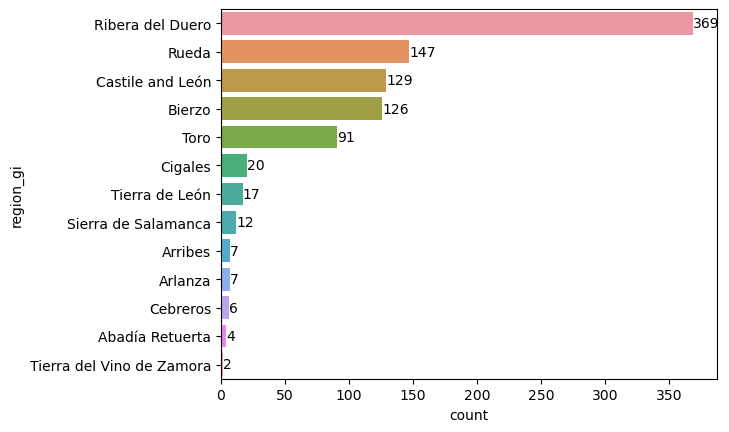

Geographical indications in: Wines without GI
Wines without GI    361
Name: region_gi, dtype: int64


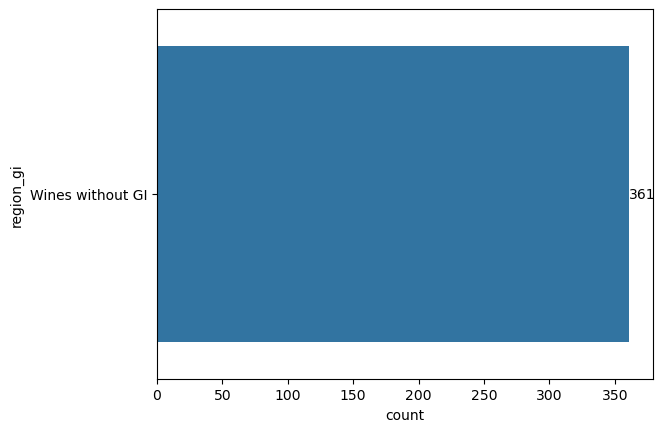

Geographical indications in: Cataluña
Penedès                366
DO Cava                317
Priorat                245
Montsant               174
Empordà                143
Terra Alta             117
Costers del Segre       96
Catalunya               73
Conca de Barberà        47
Corpinnat               46
Carignan                43
Tarragona               30
Pla de Bages            30
Clàssic Penedès         29
Alella                  27
Conca del Riu Anoia      6
Name: region_gi, dtype: int64


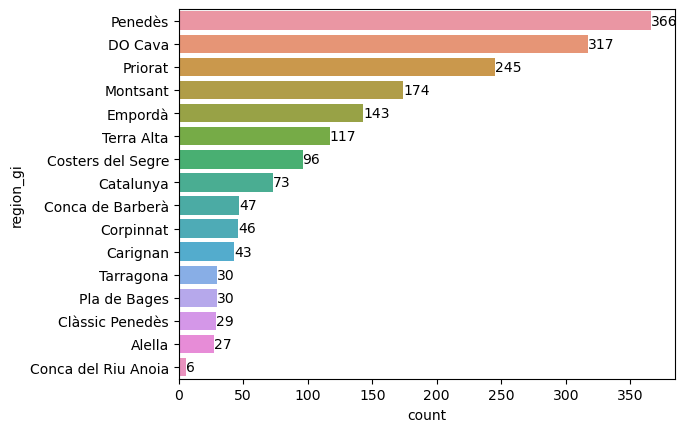

Geographical indications in: La Rioja
Rioja                591
Valles de Sadacia      8
Name: region_gi, dtype: int64


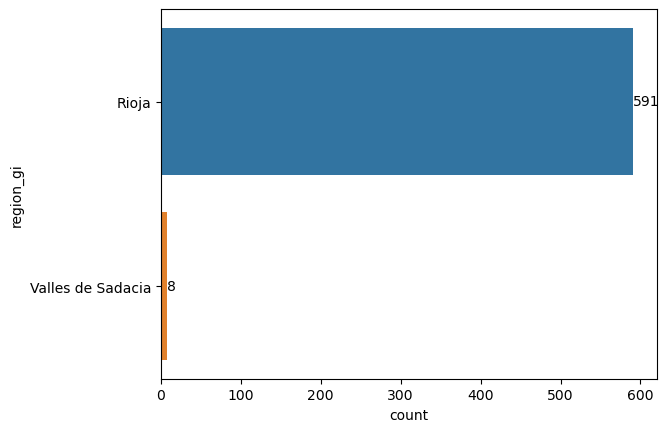

Geographical indications in: Aragón
Somontano             80
Campo de Borja        34
Calatayud             32
Valdejalón            12
Bajo Aragón            4
Ribera del Queiles     2
Name: region_gi, dtype: int64


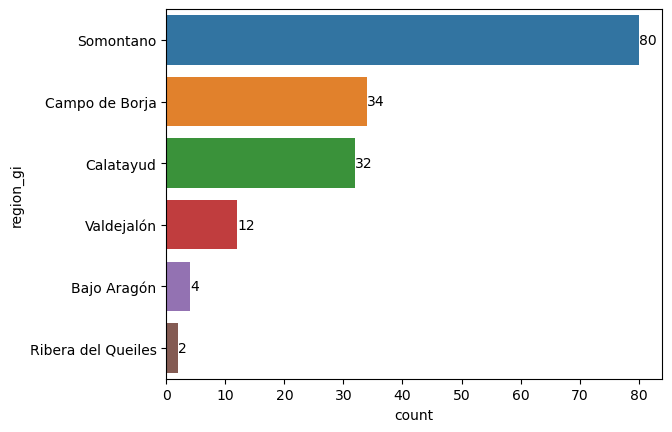

Geographical indications in: Navarra
Navarre               88
3 Riberas              4
Pago de Otazu          3
Ribera del Queiles     2
Name: region_gi, dtype: int64


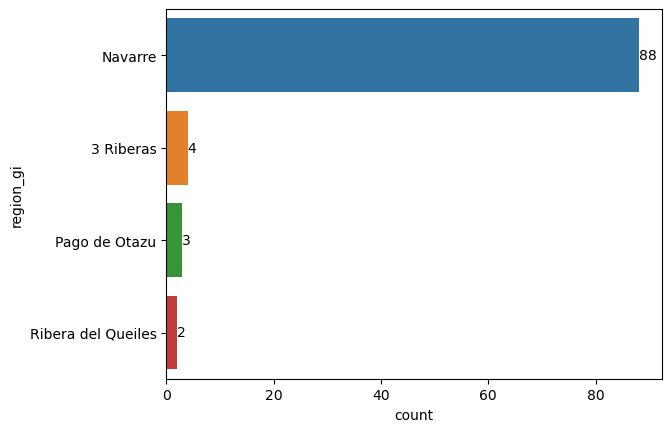

Geographical indications in: Comunidad Valenciana
Valencia         43
Alicante         38
Utiel-Requena    15
El Terrerazo      6
DO Cava           2
Name: region_gi, dtype: int64


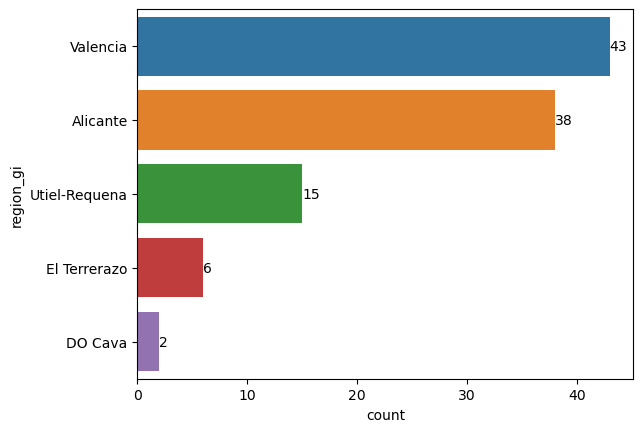

Geographical indications in: Andalucía
Jerez-Manzanilla     134
Montilla-Moriles      47
Sierras de Málaga     24
Cádiz                 23
Málaga                16
Granada                8
Condado de Huelva      8
Name: region_gi, dtype: int64


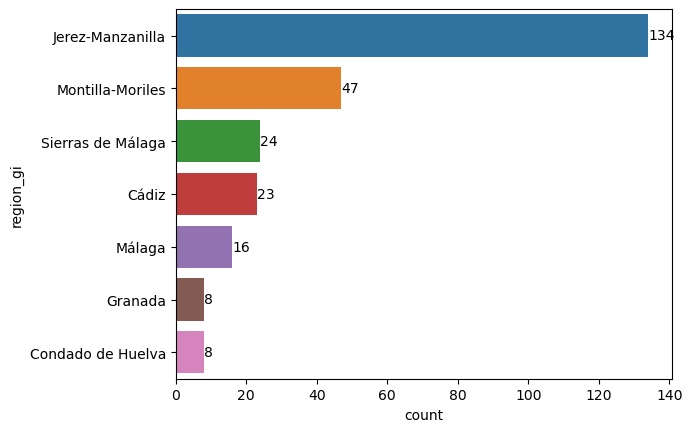

Geographical indications in: Galicia
Rías Baixas        206
Ribeiro             62
Ribeira Sacra       52
Valdeorras          42
Monterrei           25
Barbanza e Iria      5
Name: region_gi, dtype: int64


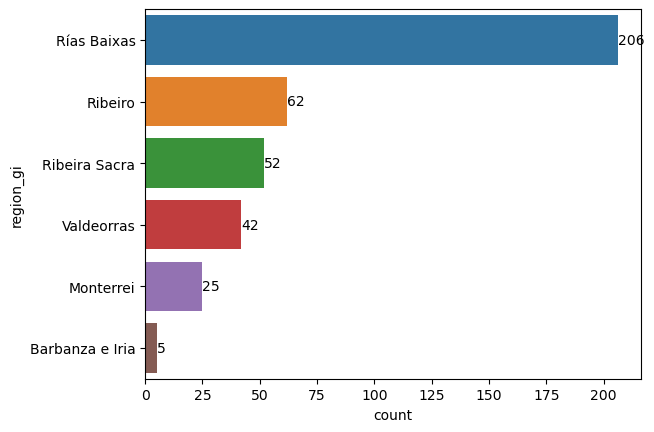

Geographical indications in: Euskadi
Rioja                  92
Bizkaiko Txakolina     11
Getariako Txakolina     7
Arabako Txakolina       1
Name: region_gi, dtype: int64


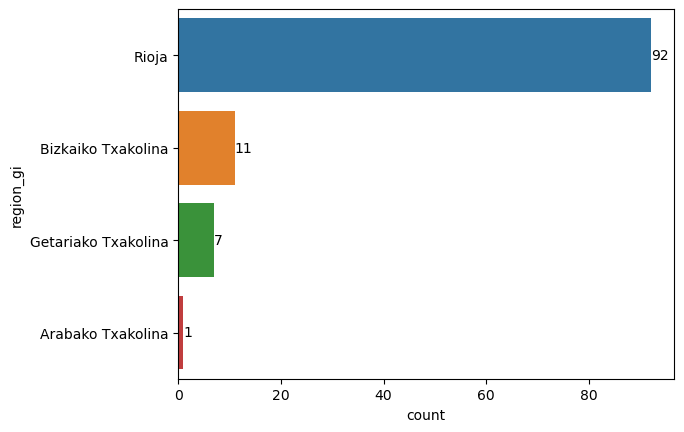

Geographical indications in: Murcia
Jumilla    74
Name: region_gi, dtype: int64


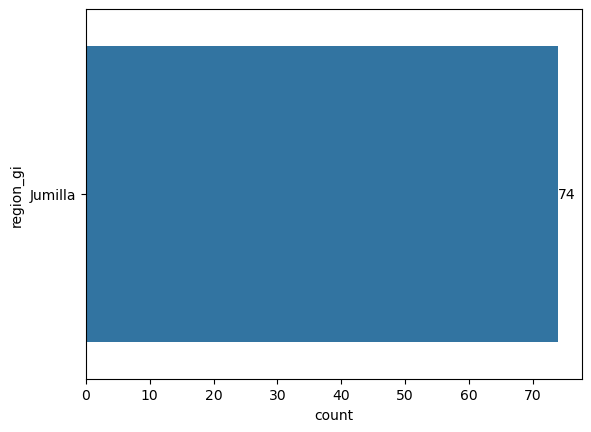

Geographical indications in: Islas Baleares
Mallorca               49
Ibiza                  12
Binissalem-Mallorca    12
Pla i Llevant          12
Illa de Menorca         5
Formentera              4
Name: region_gi, dtype: int64


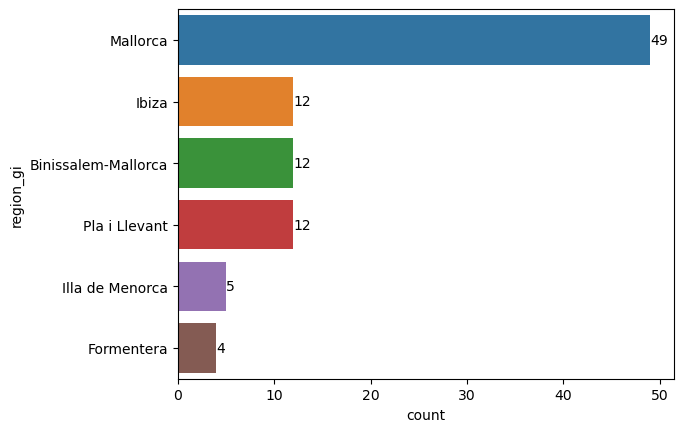

Geographical indications in: Extremadura
Extremadura            16
Ribera del Guadiana     4
Name: region_gi, dtype: int64


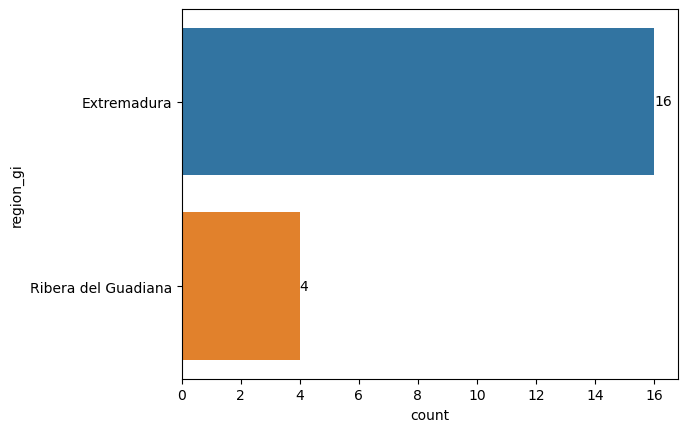

Geographical indications in: Castilla-La Mancha
Castilla                75
La Mancha               21
Méntrida                20
Manchuela               12
Almansa                  9
Dominio de Valdepusa     7
Jumilla                  3
Uclés                    2
Pago Florentino          1
Vallegarcía              1
Name: region_gi, dtype: int64


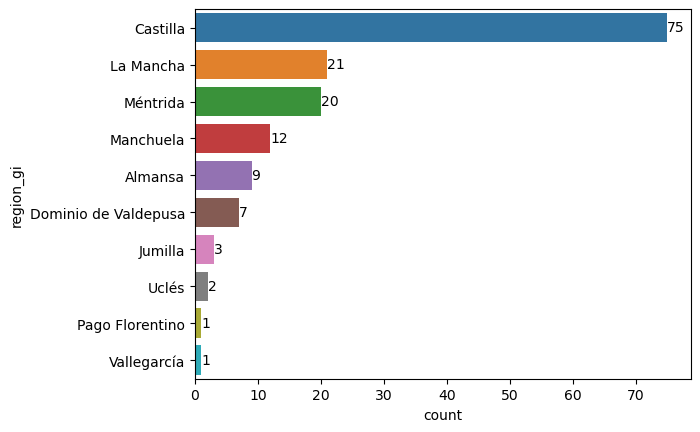

Geographical indications in: Islas Canarias
Valle de La Orotava     18
Tacoronte - Acentejo    14
Ycoden-Daute-Isora      14
Lanzarote               13
Canary Islands          11
Abona                   10
Valle de Güímar          9
La Palma                 4
Gran Canaria             2
Name: region_gi, dtype: int64


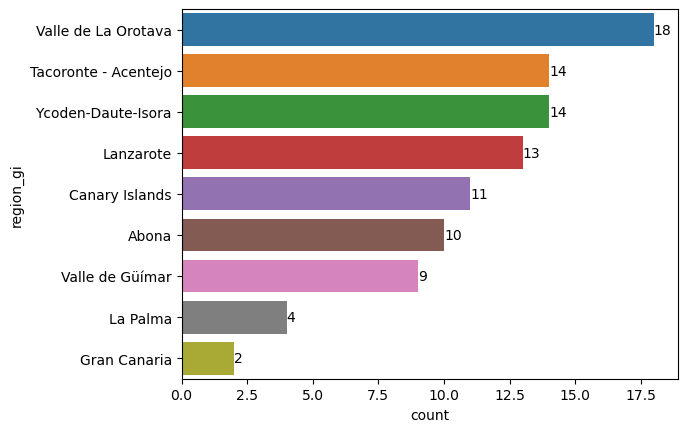

Geographical indications in: Región de Murcia
Yecla     26
Bullas     6
Name: region_gi, dtype: int64


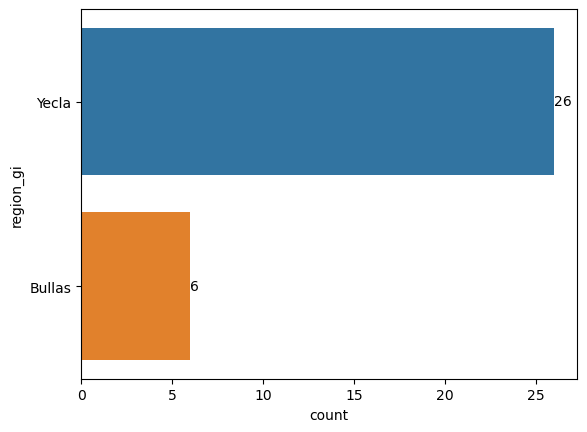

Geographical indications in: Madrid
Vinos de Madrid    49
Name: region_gi, dtype: int64


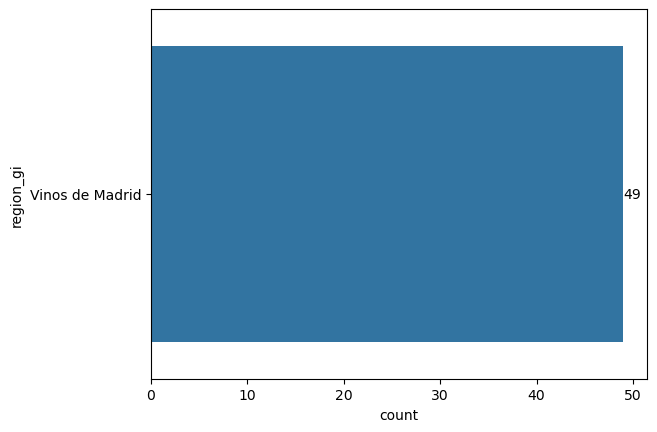

Geographical indications in: Asturias
Cangas    4
Name: region_gi, dtype: int64


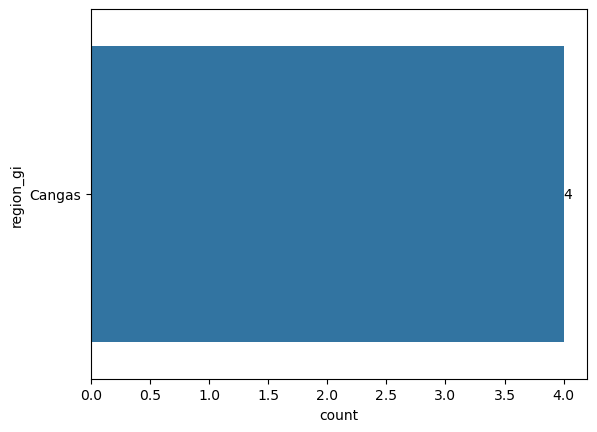

Geographical indications in: Vino de Pago
Pago Aylés                  3
Pago Dehesa del Carrizal    2
Pago Calzadilla             2
Pago Casa del Blanco        2
Pago Campo de la Guardia    1
Name: region_gi, dtype: int64


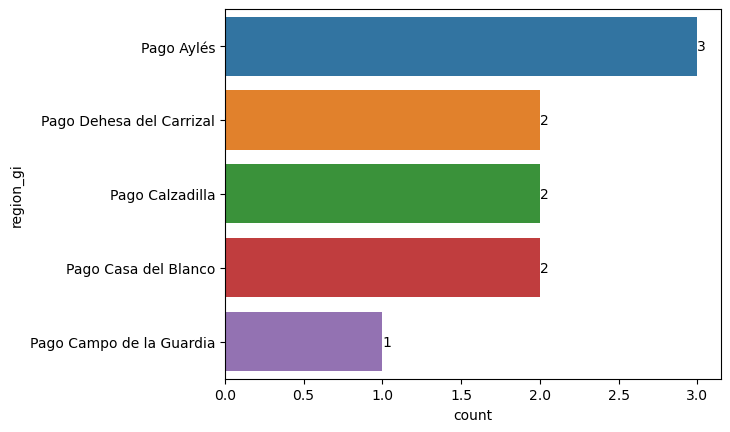

Geographical indications in: Cantabria
Costa de Cantabria    1
Liébana               1
Name: region_gi, dtype: int64


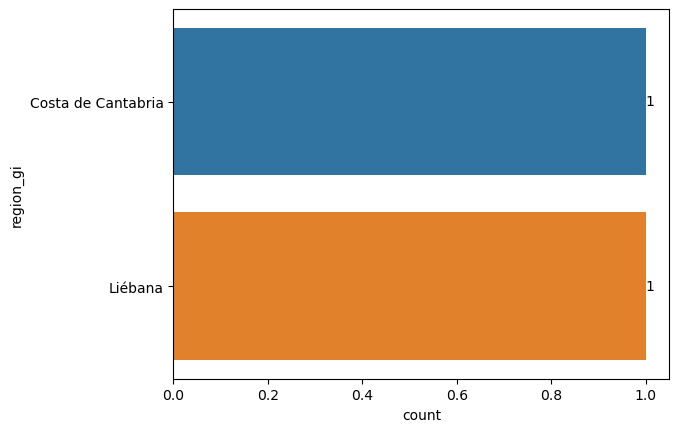

In [77]:
for category in categories:
    plot_regions(category)

# Multivariate analysis

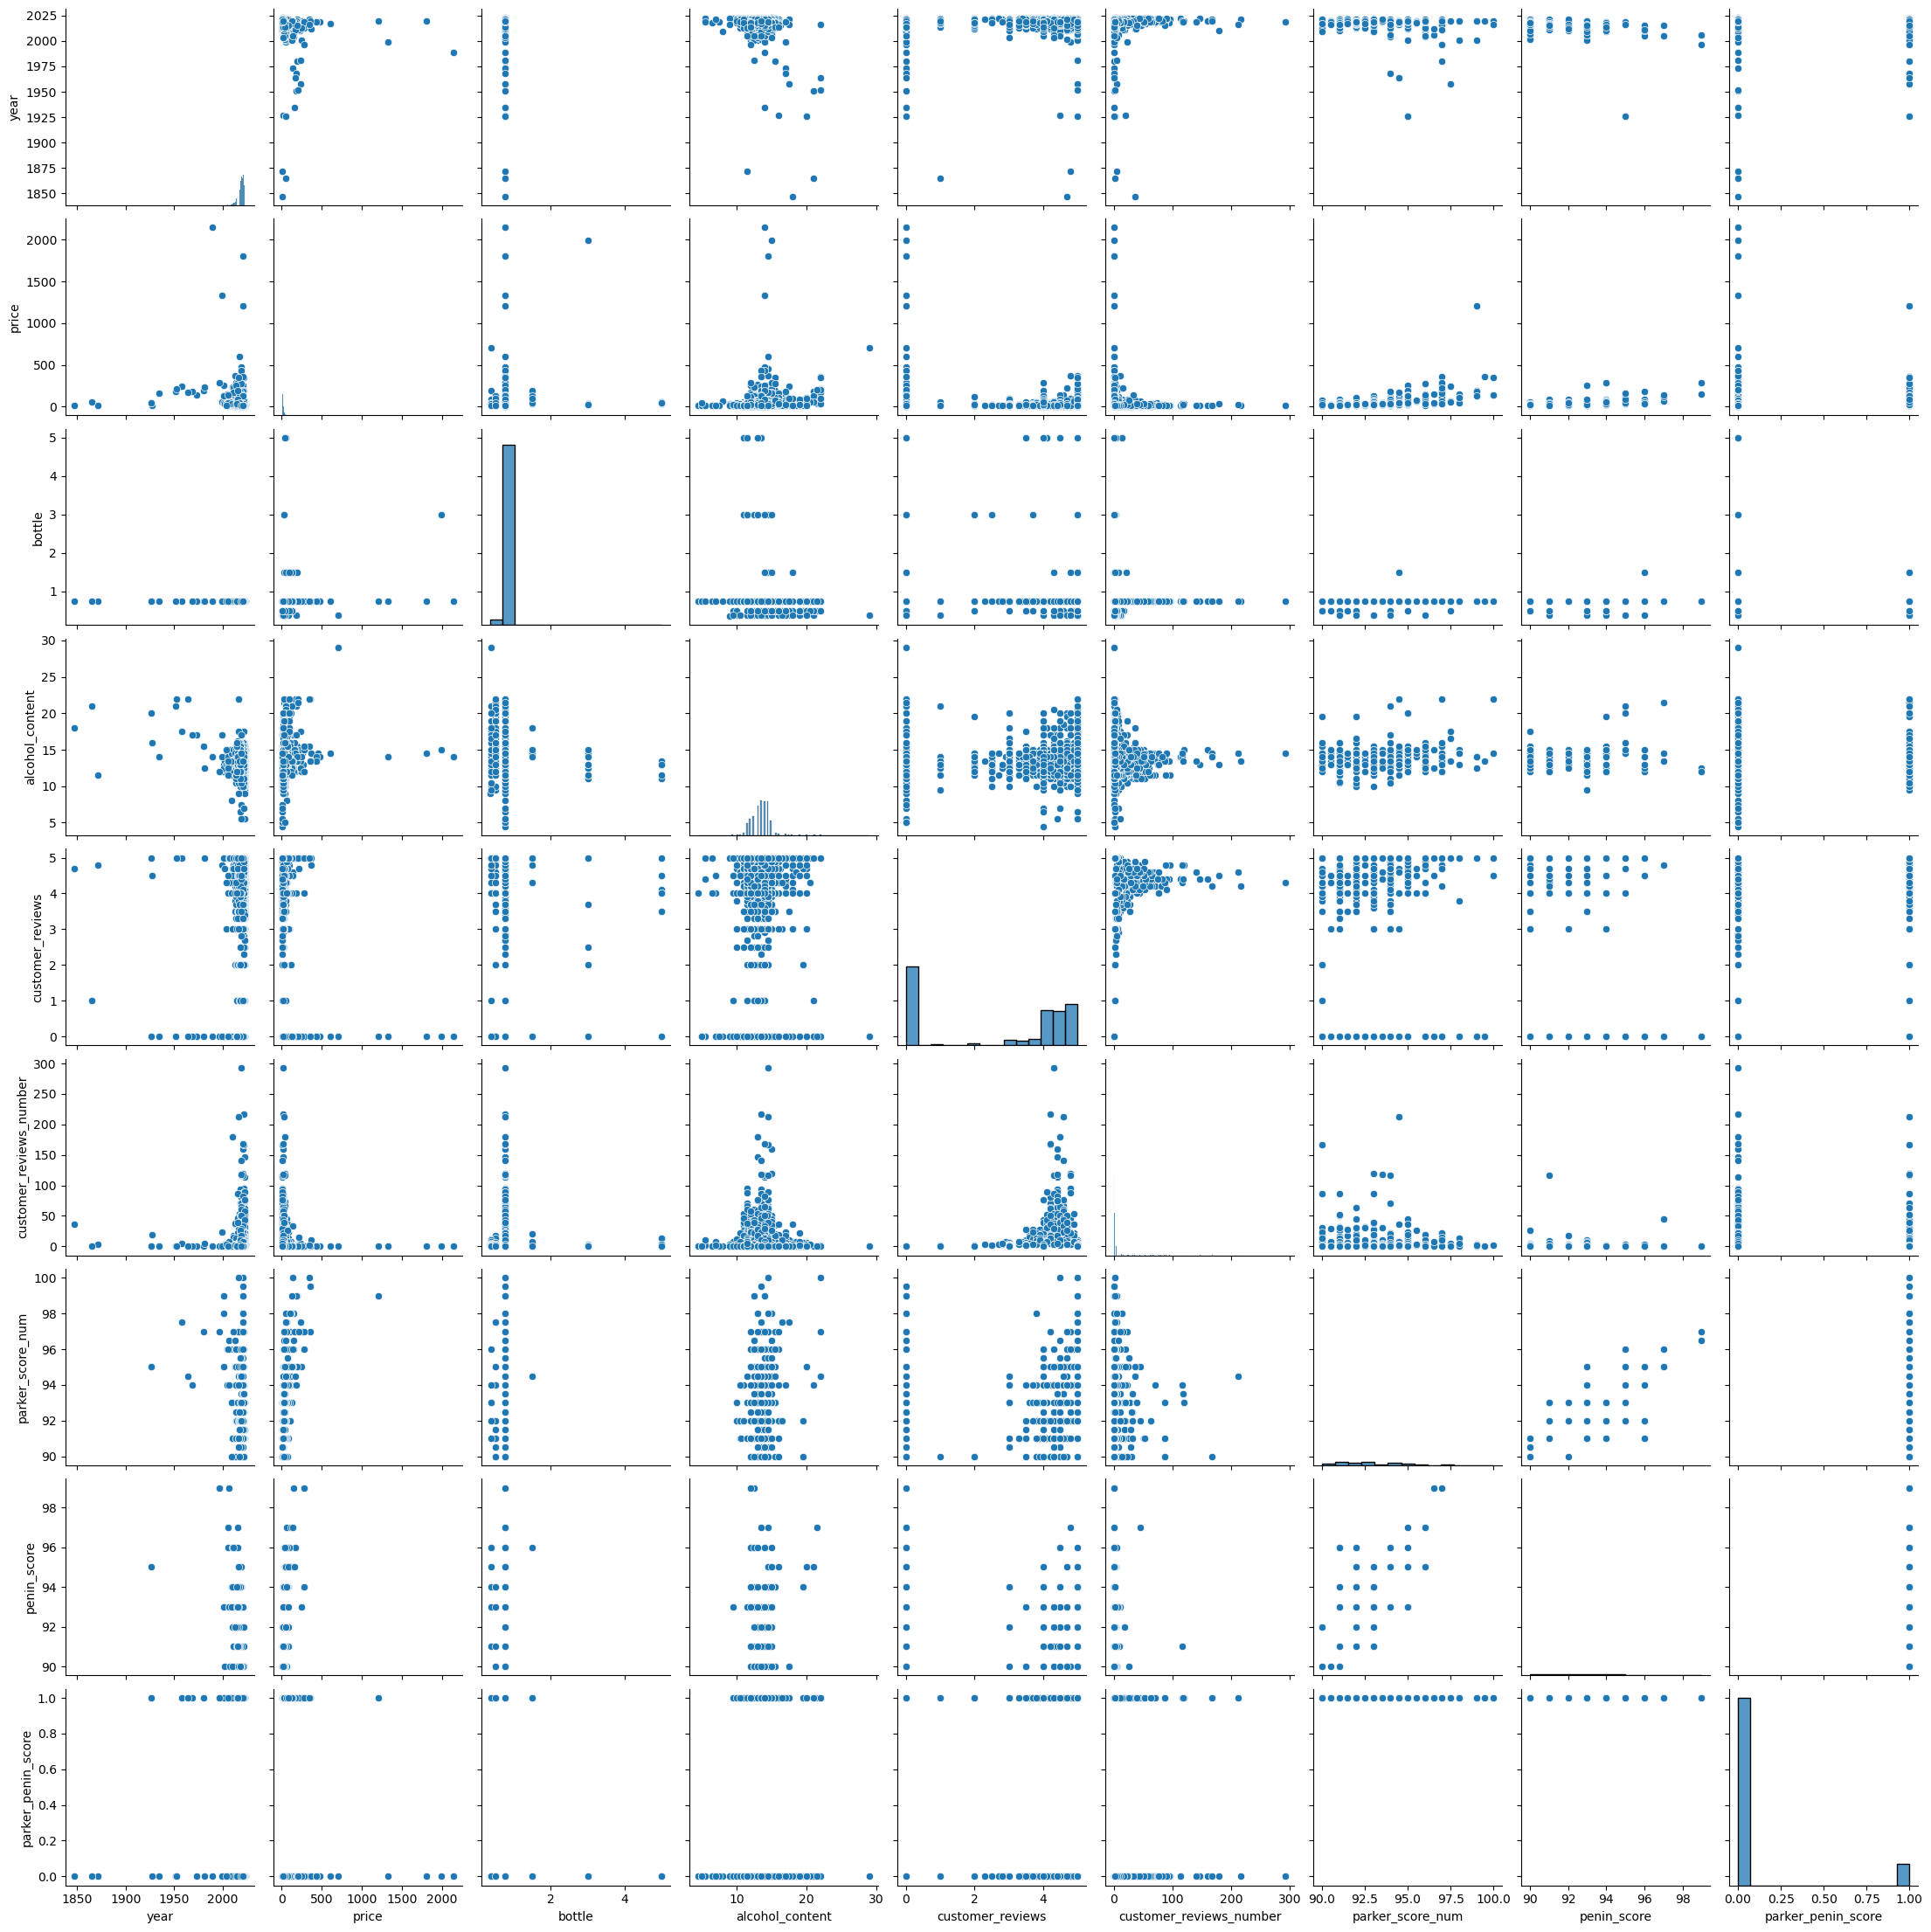

In [78]:
# Pairwise scatter plot for numeric columns
numeric_columns = vinissimus.select_dtypes(np.number).columns
sns.pairplot(vinissimus[numeric_columns])
plt.show()

There is a clear correlation between the Parker and Peñín scores.

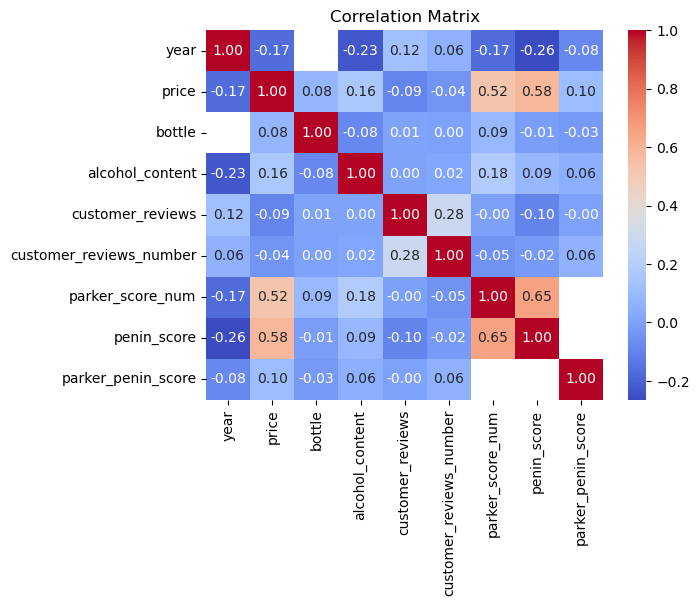

In [79]:
# Heatmap to visualize correlation between numeric columns
corr_matrix = vinissimus[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Price is correlated with Parker and Peñín scores.

### Price and type of wine
Since the distribution of the price variable is highly skewed, to make comparisons it is better to use the median instead of the average since the latter is more sensitive to outliers.

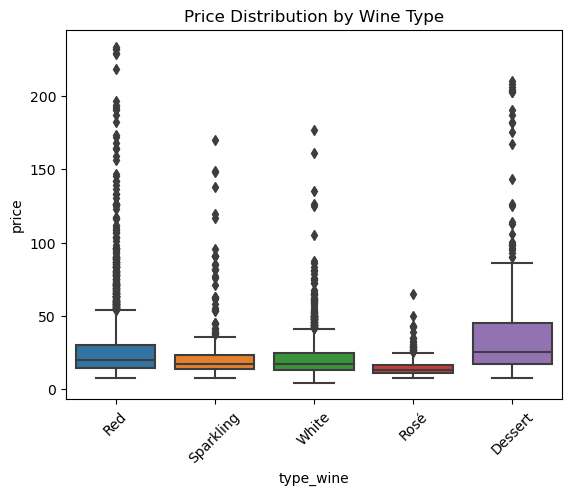

In [80]:
# Compare different wine types based on price
sns.boxplot(x='type_wine', y='price', data=price_no_outliers)
plt.xticks(rotation=45)
plt.title("Price Distribution by Wine Type")
plt.show()

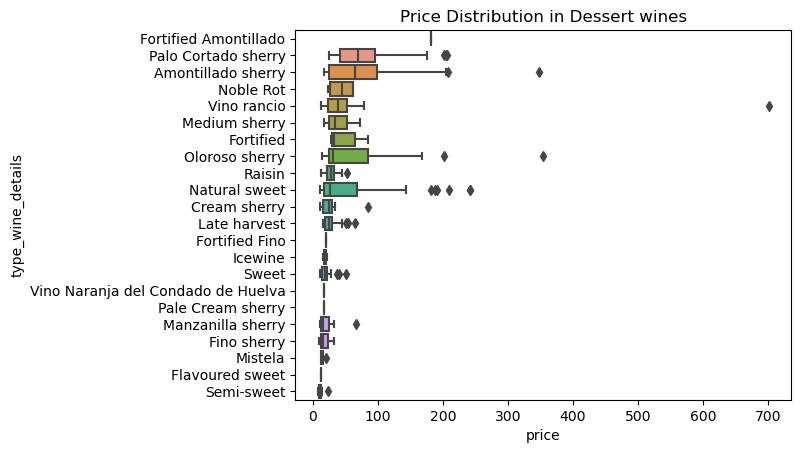

In [81]:
# Further explore the Dessert wines
dessert_wines = vinissimus[vinissimus['type_wine']=='Dessert']
order_dessert = dessert_wines.groupby('type_wine_details')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='type_wine_details', x='price', data=dessert_wines, order=order_dessert)
plt.title("Price Distribution in Dessert wines")
plt.show()

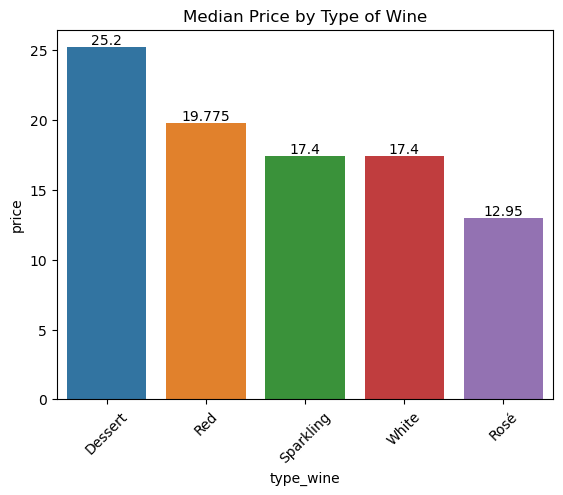

In [82]:
# Median price by type of wine
median_price_by_type = vinissimus.groupby('type_wine')['price'].median().reset_index()
median_price_by_type = median_price_by_type.sort_values(by='price', ascending=False)

ax = sns.barplot(x='type_wine', y='price', data=median_price_by_type)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("Median Price by Type of Wine")
plt.show()

### Price and region

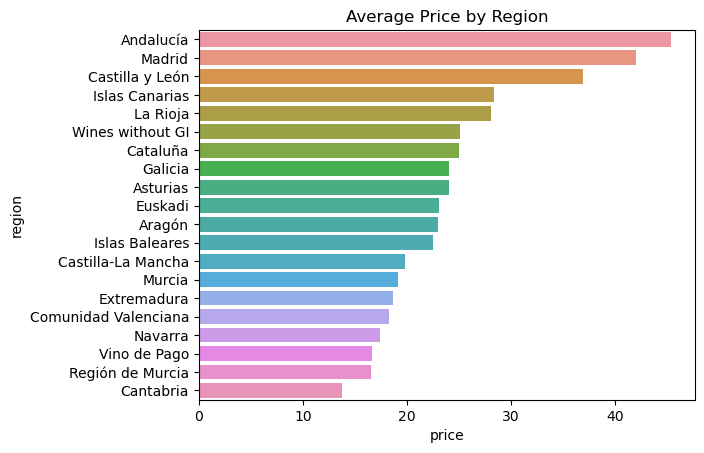

In [83]:
# Compare regions by average price 
avg_price_by_region = vinissimus.groupby('region')['price'].mean().reset_index()
avg_price_by_region = avg_price_by_region.sort_values(by='price', ascending=False)
sns.barplot(y='region', x='price', data=avg_price_by_region)
plt.title("Average Price by Region")
plt.show()

Andalucía is in the first position most likely because of the dessert wines.

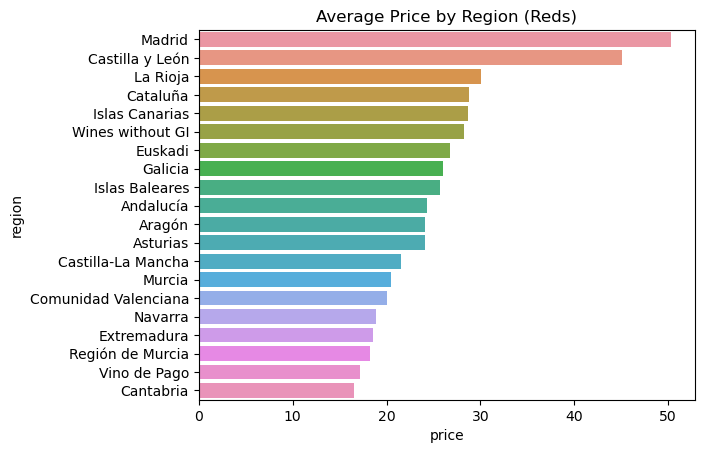

In [84]:
# Compare regions by average price (red wines)
avg_price_by_region = vinissimus[vinissimus["type_wine"]=="Red"].groupby('region')['price'].mean().reset_index()
avg_price_by_region = avg_price_by_region.sort_values(by='price', ascending=False)
sns.barplot(y='region', x='price', data=avg_price_by_region)
plt.title("Average Price by Region (Reds)")
plt.show()

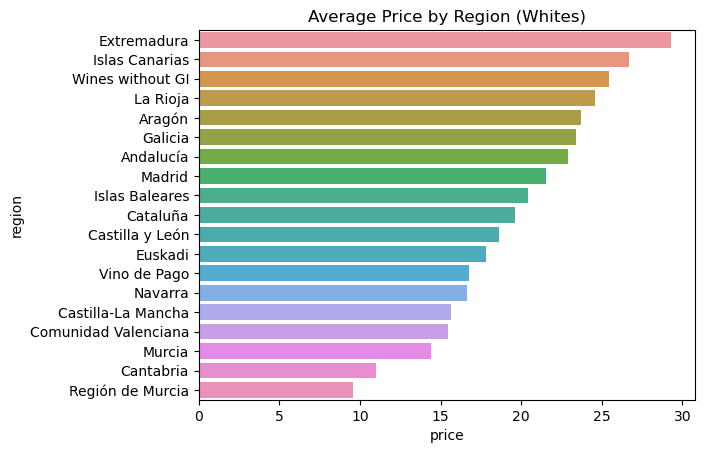

In [85]:
# Compare regions by average price (red wines)
avg_price_by_region = vinissimus[vinissimus["type_wine"]=="White"].groupby('region')['price'].mean().reset_index()
avg_price_by_region = avg_price_by_region.sort_values(by='price', ascending=False)
sns.barplot(y='region', x='price', data=avg_price_by_region)
plt.title("Average Price by Region (Whites)")
plt.show()

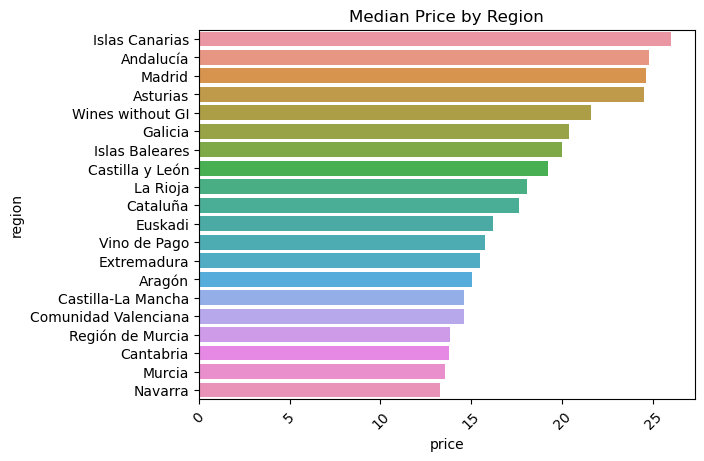

In [86]:
# Compare regions by median price 
median_price_by_region = vinissimus.groupby('region')['price'].median().reset_index()
median_price_by_region = median_price_by_region.sort_values(by='price', ascending=False)
sns.barplot(y='region', x='price', data=median_price_by_region)
plt.xticks(rotation=45)
plt.title("Median Price by Region")
plt.show()

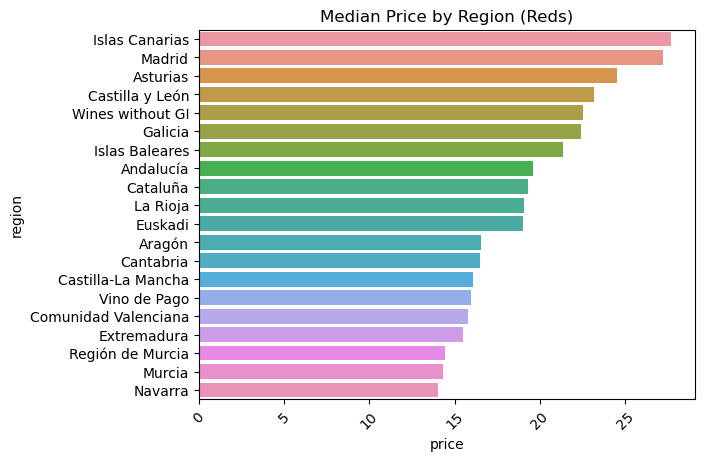

In [87]:
# Compare regions by median price (red wines)
median_price_by_region = vinissimus[vinissimus["type_wine"]=="Red"].groupby('region')['price'].median().reset_index()
median_price_by_region = median_price_by_region.sort_values(by='price', ascending=False)
sns.barplot(y='region', x='price', data=median_price_by_region)
plt.xticks(rotation=45)
plt.title("Median Price by Region (Reds)")
plt.show()

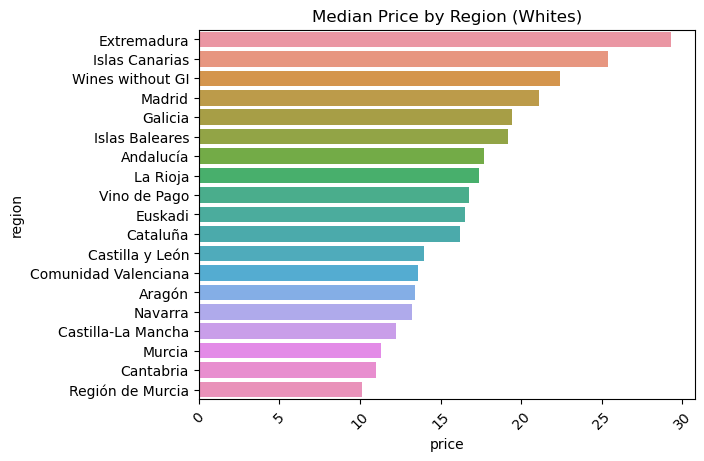

In [88]:
# Compare regions by median price (white wines)
median_price_by_region = vinissimus[vinissimus["type_wine"]=="White"].groupby('region')['price'].median().reset_index()
median_price_by_region = median_price_by_region.sort_values(by='price', ascending=False)
sns.barplot(y='region', x='price', data=median_price_by_region)
plt.xticks(rotation=45)
plt.title("Median Price by Region (Whites)")
plt.show()

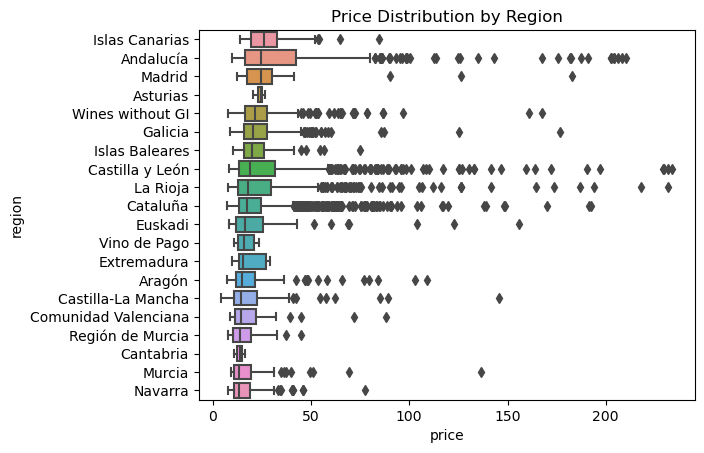

In [89]:
# Compare regions based on price
order_regions = price_no_outliers.groupby('region')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='region', x='price', data=price_no_outliers, order=order_regions)
plt.title("Price Distribution by Region")
plt.show()

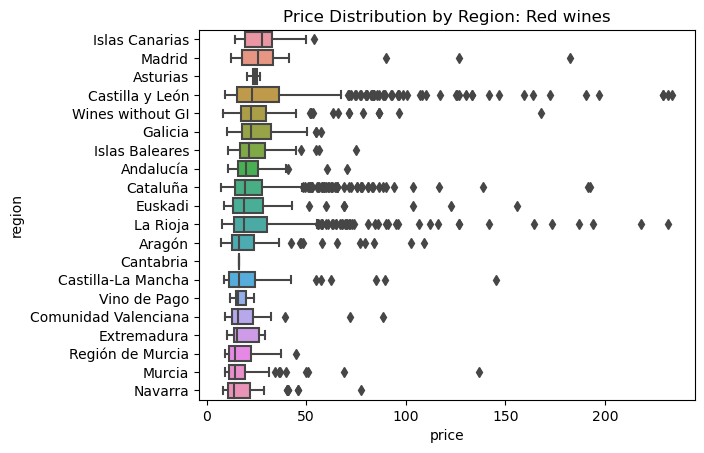

In [90]:
# Compare regions based on price (red wines)
red_wines = price_no_outliers[price_no_outliers["type_wine"] == "Red"]
order_regions = red_wines.groupby('region')['price'].median().sort_values(ascending=False).index

sns.boxplot(y='region', x='price', data=red_wines, order=order_regions)
plt.title("Price Distribution by Region: Red wines")
plt.show()

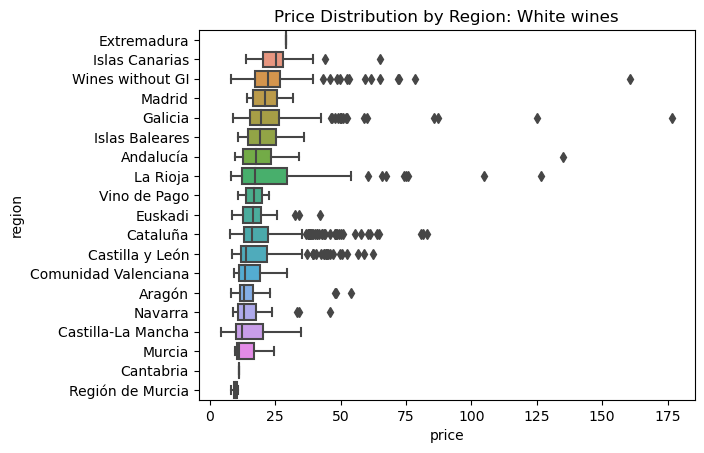

In [91]:
# Compare regions based on price (white wines)
white_wines = price_no_outliers[price_no_outliers["type_wine"] == "White"]
order_regions = white_wines.groupby('region')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='region', x='price', data=white_wines, order=order_regions)
plt.title("Price Distribution by Region: White wines")
plt.show()

### Price and grapes

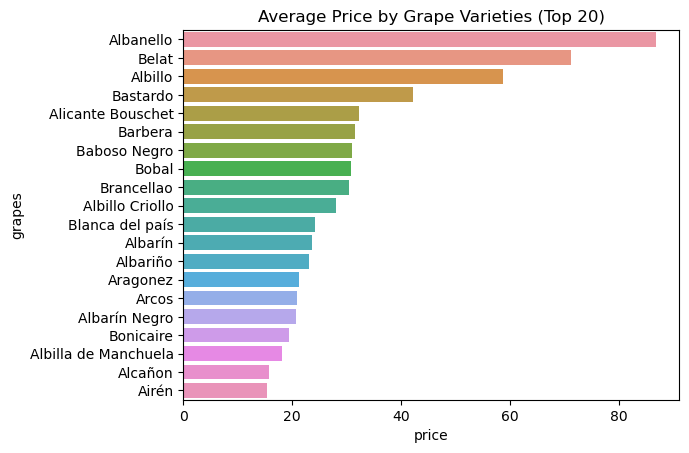

In [92]:
# Compare grapes by average price 
avg_price_by_grapes = grapes_df.groupby('grapes')['price'].mean().reset_index()
avg_price_by_grapes = avg_price_by_grapes[:20].sort_values(by='price', ascending=False)

sns.barplot(y='grapes', x='price', data=avg_price_by_grapes)
plt.title("Average Price by Grape Varieties (Top 20)")
plt.show()

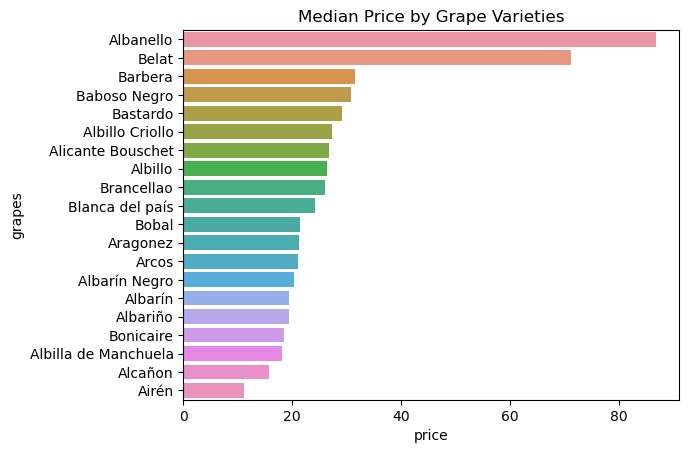

In [93]:
# Compare grapes by median price 
median_price_by_grapes = grapes_df.groupby('grapes')['price'].median().reset_index()
median_price_by_grapes = median_price_by_grapes[:20].sort_values(by='price', ascending=False)

sns.barplot(y='grapes', x='price', data=median_price_by_grapes)
plt.title("Median Price by Grape Varieties")
plt.show()

As we have seen, 75% of the grapes varieties present in the dataset have a very small representation. We will be looking now only at wines that appear in at least 100 wines.

In [94]:
top_grapes = grape_count[grape_count["grapes"] > 100].index
top_grapes_df = grapes_df[grapes_df["grapes"].isin(top_grapes)]

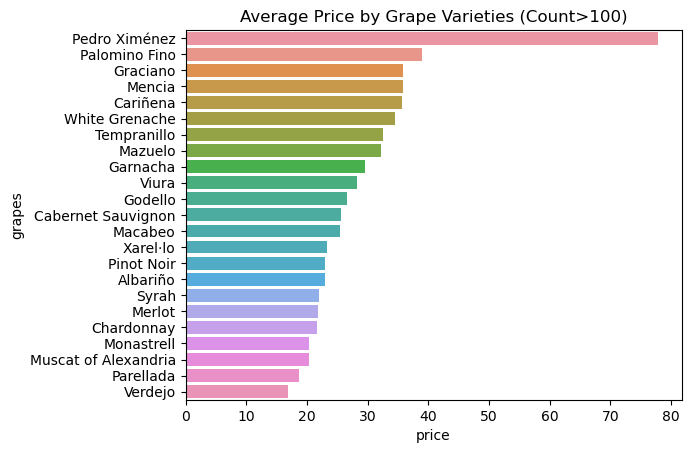

In [95]:
# Compare grapes by average price 
avg_price_by_grapes = top_grapes_df.groupby('grapes')['price'].mean().reset_index()
avg_price_by_grapes = avg_price_by_grapes.sort_values(by='price', ascending=False)

sns.barplot(y='grapes', x='price', data=avg_price_by_grapes)
plt.title("Average Price by Grape Varieties (Count>100)")
plt.show()

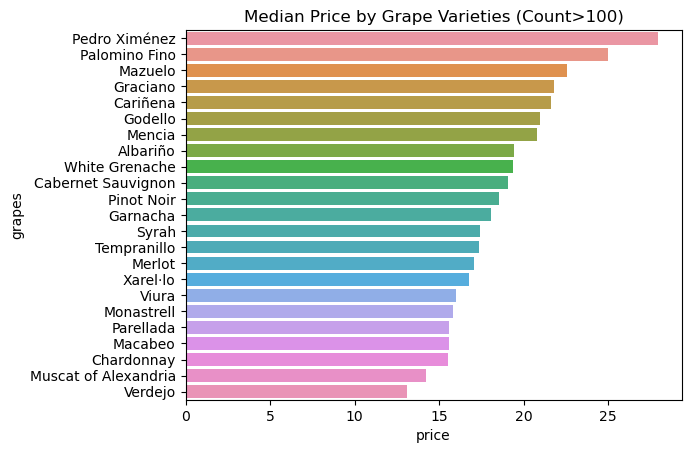

In [96]:
# Compare grapes by median price 
median_price_by_grapes = top_grapes_df.groupby('grapes')['price'].median().reset_index()
median_price_by_grapes = median_price_by_grapes.sort_values(by='price', ascending=False)

sns.barplot(y='grapes', x='price', data=median_price_by_grapes)
plt.title("Median Price by Grape Varieties (Count>100)")
plt.show()

## Customer reviews
Analysing the reviews can give us information about how are the clients of the shop. <br>
Let's have a look into the wines that have received at least one customer review.

In [97]:
reviewed_wines = vinissimus[vinissimus["customer_reviews_number"]>1]
reviewed_wines.describe()

year        price       bottle  alcohol_content  \
count  2039.000000  2249.000000  2121.000000      2247.000000   
mean   2019.036292    21.344820     0.759382        13.546061   
std       6.217173    21.275041     0.228189         1.302481   
min    1847.000000     7.400000     0.350000         5.500000   
25%    2018.000000    12.400000     0.750000        13.000000   
50%    2020.000000    16.400000     0.750000        13.500000   
75%    2021.000000    23.000000     0.750000        14.500000   
max    2023.000000   370.850000     5.000000        22.000000   

       customer_reviews  customer_reviews_number  parker_score_num  \
count       2249.000000              2249.000000        220.000000   
mean           4.326367                 9.684749         93.095455   
std            0.475777                17.476745          2.030021   
min            1.000000                 2.000000         90.000000   
25%            4.000000                 2.000000         91.875000   
50%            4.400000                 4.000000         93.000000   
75%            4.600000                 9.000000         94.000000   
max            5.000000               293.000000        100.000000   

       penin_score  parker_penin_score  
count    34.000000         2249.000000  
mean     91.911765            0.109382  
std       1.831834            0.312187  
min      90.000000            0.000000  
25%      90.250000            0.000000  
50%      91.000000            0.000000  
75%      93.000000            0.000000  
max      97.000000            1.000000

### Customer reviews and type

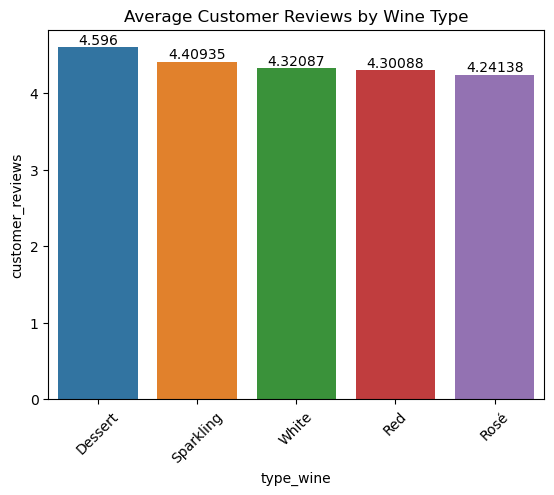

In [98]:
# Average customer reviews by wine type
avg_reviews_by_type = reviewed_wines.groupby('type_wine')['customer_reviews'].mean().reset_index()
avg_reviews_by_type = avg_reviews_by_type.sort_values(by='customer_reviews', ascending=False)
ax = sns.barplot(x='type_wine', y='customer_reviews', data=avg_reviews_by_type)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("Average Customer Reviews by Wine Type")
plt.show()

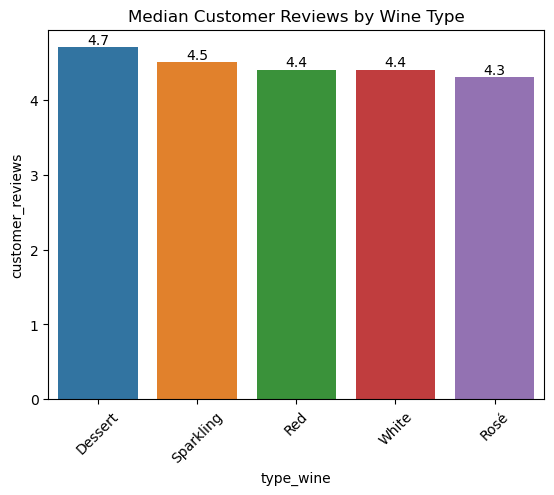

In [99]:
# Median customer reviews by wine type
median_reviews_by_type = reviewed_wines.groupby('type_wine')['customer_reviews'].median().reset_index()
median_reviews_by_type = median_reviews_by_type.sort_values(by='customer_reviews', ascending=False)
ax = sns.barplot(x='type_wine', y='customer_reviews', data=median_reviews_by_type)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("Median Customer Reviews by Wine Type")
plt.show()

There seems to be some variation of the score depending on the type of wine. We will apply the Chi-square method to check if the two variables are related, using a level of significance of 0.05 (5% risk of concluding that a difference exists when there is no actual difference). <br>
Link to tables: https://www.medcalc.org/manual/chi-square-table.php

In [100]:
data_crosstab = pd.crosstab(reviewed_wines["customer_reviews"], reviewed_wines["type_wine"])
chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstab, correction=False)

print("The Chi2 value is: ",round(chi2,2))
print("The p-value is: ",p_value)
print("The number of degrees of freedom is: ",dof)

The Chi2 value is:  137.05
The p-value is:  0.008237079204668407
The number of degrees of freedom is:  100


The p-value obtained is smaller than 0.05, and the Chi<sup>2</sup> value obtained from the tables is 124.342, which is also smaller than the one we calculated. <br>
Therefore, we can reject the null hypothesis and conclude that there is a relationship between the type of wine and the score the clients gave in the reviews.

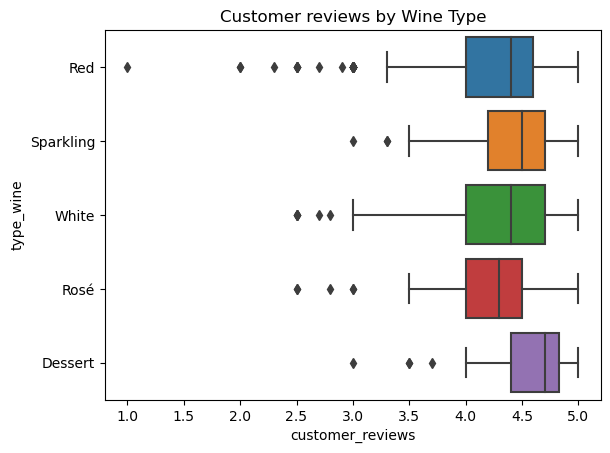

In [101]:
sns.boxplot(y='type_wine', x='customer_reviews', data=reviewed_wines)
plt.title("Customer reviews by Wine Type")
plt.show()

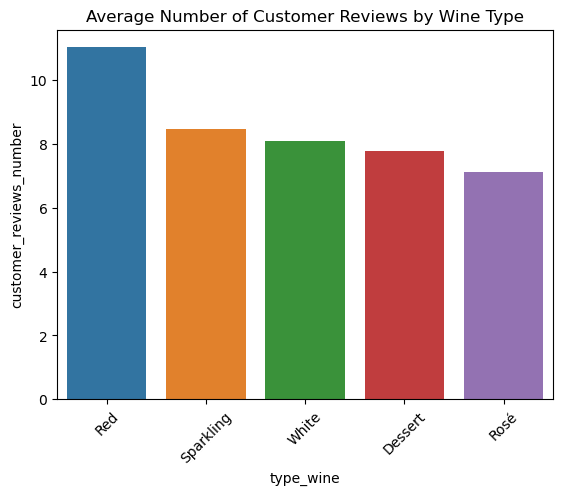

In [102]:
# Average number of customer reviews by wine type
avg_reviews_by_type = reviewed_wines.groupby('type_wine')['customer_reviews_number'].mean().reset_index()
avg_reviews_by_type = avg_reviews_by_type.sort_values(by='customer_reviews_number', ascending=False)
sns.barplot(x='type_wine', y='customer_reviews_number', data=avg_reviews_by_type)
plt.xticks(rotation=45)
plt.title("Average Number of Customer Reviews by Wine Type")
plt.show()

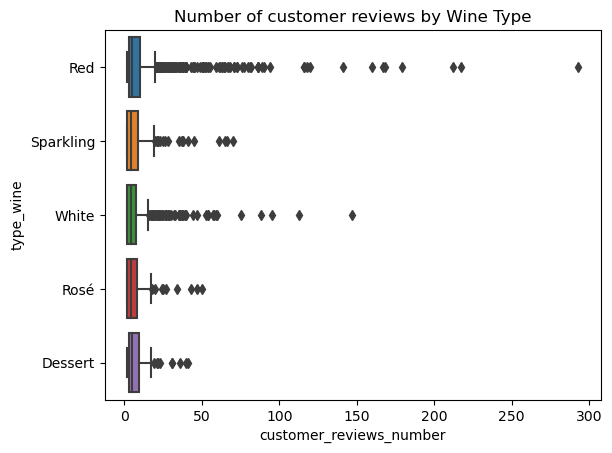

In [103]:
sns.boxplot(y='type_wine', x='customer_reviews_number', data=reviewed_wines)
plt.title("Number of customer reviews by Wine Type")
plt.show()

Dessert wines are getting less reviews (they are presumably less bought), but the scores they obtain tend to be higher. Reds are the most reviewed category, and they have a higher range in the scores. Wines have also a wide range of scores. Rosé wines, on the other hand, are the ones with fewer reviews and with lower scores.

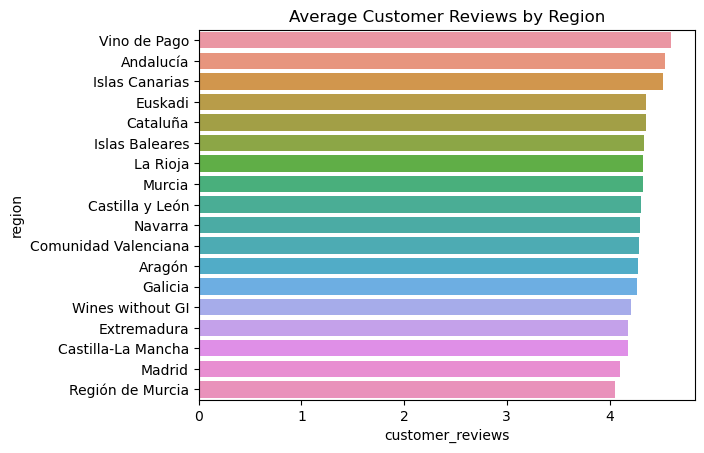

In [104]:
# Average customer reviews by region
avg_reviews_by_region = reviewed_wines.groupby('region')['customer_reviews'].mean().reset_index()
avg_reviews_by_region = avg_reviews_by_region.sort_values(by='customer_reviews', ascending=False)
sns.barplot(y='region', x='customer_reviews', data=avg_reviews_by_region)
plt.title("Average Customer Reviews by Region")
plt.show()

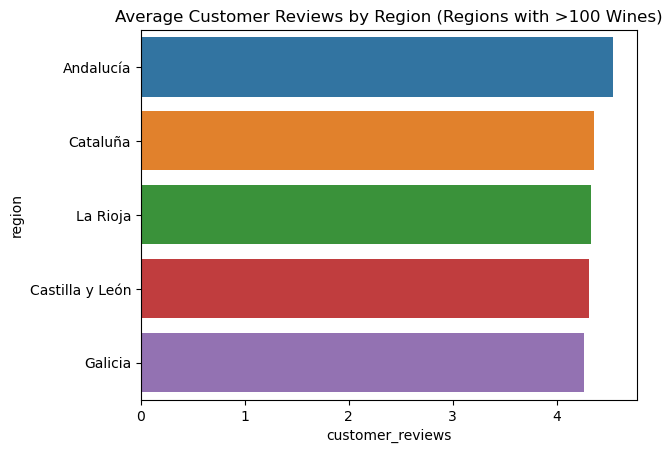

In [105]:
# Average customer reviews by region (regions with more than 100 wines)
regions_with_more_than_100_wines = reviewed_wines['region'].value_counts()[reviewed_wines['region'].value_counts() > 100].index
filtered_vinissimus = reviewed_wines[reviewed_wines['region'].isin(regions_with_more_than_100_wines)]

avg_reviews_by_region = filtered_vinissimus.groupby('region')['customer_reviews'].mean().reset_index()
avg_reviews_by_region = avg_reviews_by_region.sort_values(by='customer_reviews', ascending=False)

sns.barplot(y='region', x='customer_reviews', data=avg_reviews_by_region)
plt.title("Average Customer Reviews by Region (Regions with >100 Wines)")
plt.show()

### Customer reviews and Geographical Indications

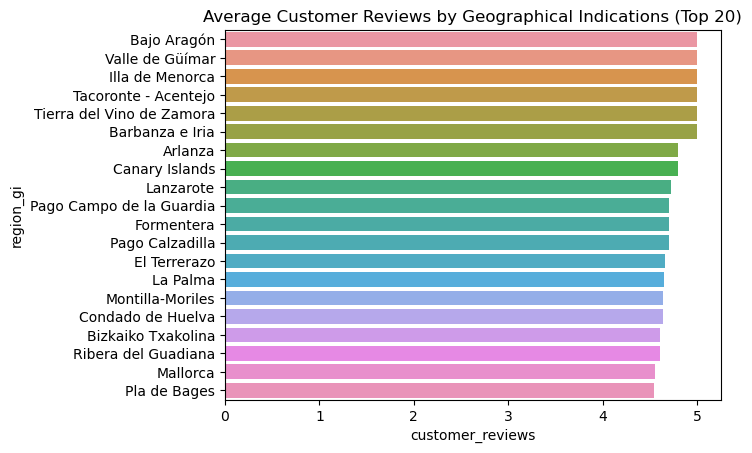

In [106]:
# Average customer reviews
avg_reviews_by_gi = reviewed_wines.groupby('region_gi')['customer_reviews'].mean().reset_index()
avg_reviews_by_gi = avg_reviews_by_gi.sort_values(by='customer_reviews', ascending=False)[:20]
sns.barplot(y='region_gi', x='customer_reviews', data=avg_reviews_by_gi)
plt.title("Average Customer Reviews by Geographical Indications (Top 20)")
plt.show()

We find small GIs that have wines of high quality, including some Vinos de Pago.

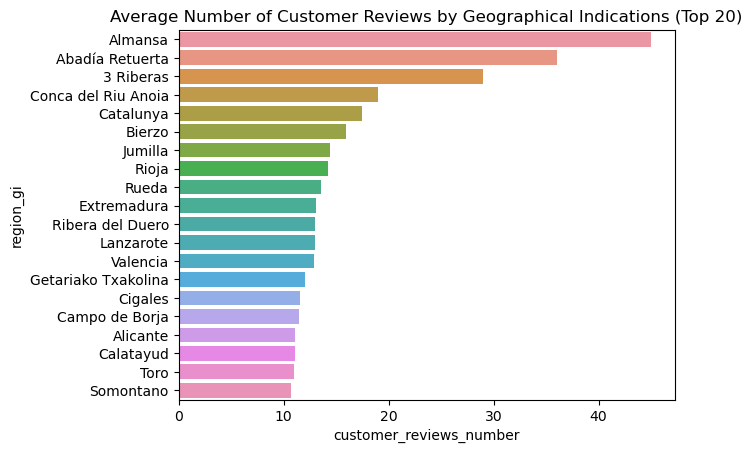

In [107]:
# Average number of customer reviews
avg_num_reviews_by_gi = reviewed_wines.groupby('region_gi')['customer_reviews_number'].mean().reset_index()
avg_num_reviews_by_gi = avg_num_reviews_by_gi.sort_values(by='customer_reviews_number', ascending=False)[:20]
sns.barplot(y='region_gi', x='customer_reviews_number', data=avg_num_reviews_by_gi)
plt.title("Average Number of Customer Reviews by Geographical Indications (Top 20)")
plt.show()

Let's filter out the GIs that have less than 30 wines.

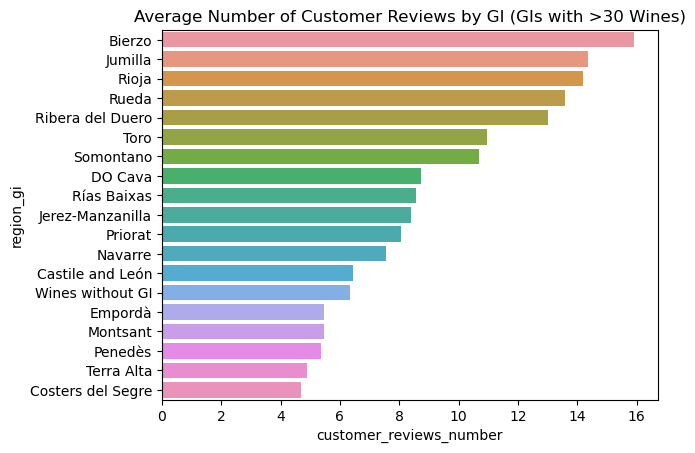

In [108]:
regions_with_more_than_30_wines = reviewed_wines['region_gi'].value_counts()[reviewed_wines['region_gi'].value_counts() > 30].index
filtered_vinissimus = reviewed_wines[reviewed_wines['region_gi'].isin(regions_with_more_than_30_wines)]

avg_reviews_by_region = filtered_vinissimus.groupby('region_gi')['customer_reviews_number'].mean().reset_index()
avg_reviews_by_region = avg_reviews_by_region.sort_values(by='customer_reviews_number', ascending=False)

sns.barplot(y='region_gi', x='customer_reviews_number', data=avg_reviews_by_region)
plt.title("Average Number of Customer Reviews by GI (GIs with >30 Wines)")
plt.show()

We find interesting GIs such as Bierzo, Toro, Priorat, Navarra, Montsant and Penedés, apart from the classical GIs (Rioja, Ribera, Rueda, Cava, Rías Baixas, Jerez...) <br>
Now let's filter out the bad reviews (keep only above 4.0).

In [109]:
new_filtered_vinissimus = filtered_vinissimus[filtered_vinissimus["customer_reviews"]>4]
new_filtered_vinissimus["customer_reviews"].describe()

count    1233.000000
mean        4.548662
std         0.261552
min         4.100000
25%         4.300000
50%         4.500000
75%         4.700000
max         5.000000
Name: customer_reviews, dtype: float64

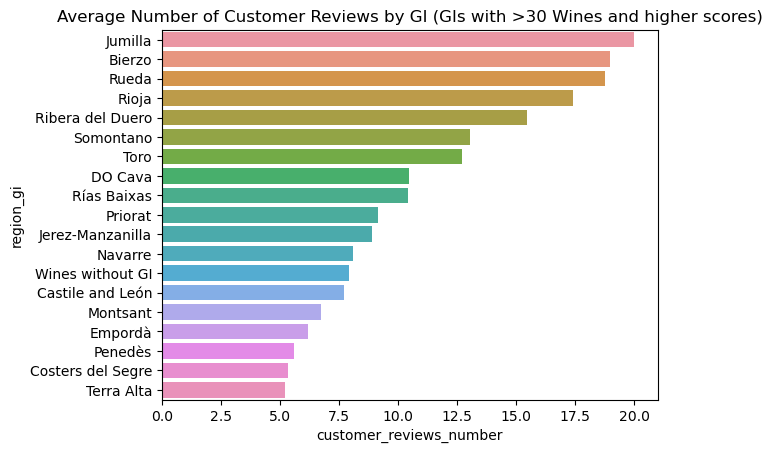

In [110]:
avg_reviews_by_region = new_filtered_vinissimus.groupby('region_gi')['customer_reviews_number'].mean().reset_index()
avg_reviews_by_region = avg_reviews_by_region.sort_values(by='customer_reviews_number', ascending=False)

sns.barplot(y='region_gi', x='customer_reviews_number', data=avg_reviews_by_region)
plt.title("Average Number of Customer Reviews by GI (GIs with >30 Wines and higher scores)")
plt.show()

In [111]:
avg_reviews_by_region.to_csv("region_reviews.csv", index=False) # export for the presentation

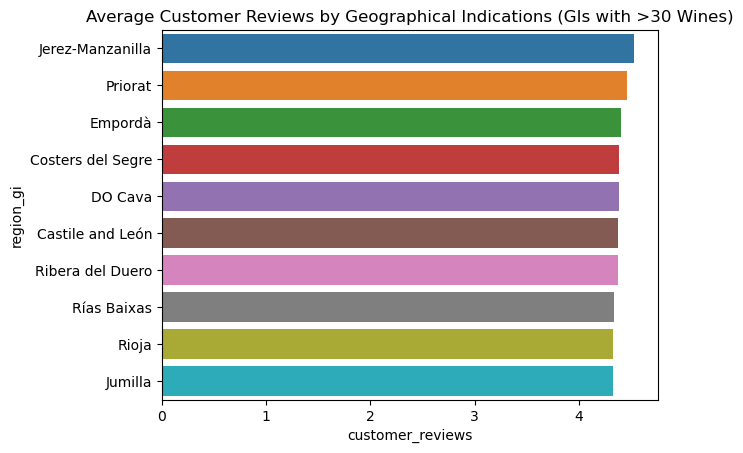

In [112]:
avg_reviews_by_gi = filtered_vinissimus.groupby('region_gi')['customer_reviews'].mean().reset_index()
avg_reviews_by_gi = avg_reviews_by_gi.sort_values(by='customer_reviews', ascending=False)[:10]
sns.barplot(y='region_gi', x='customer_reviews', data=avg_reviews_by_gi)
plt.title("Average Customer Reviews by Geographical Indications (GIs with >30 Wines)")
plt.show()

### Customer reviews and grapes

In [113]:
grapes_reviewed_wines = grapes_df[grapes_df["customer_reviews_number"]>1]

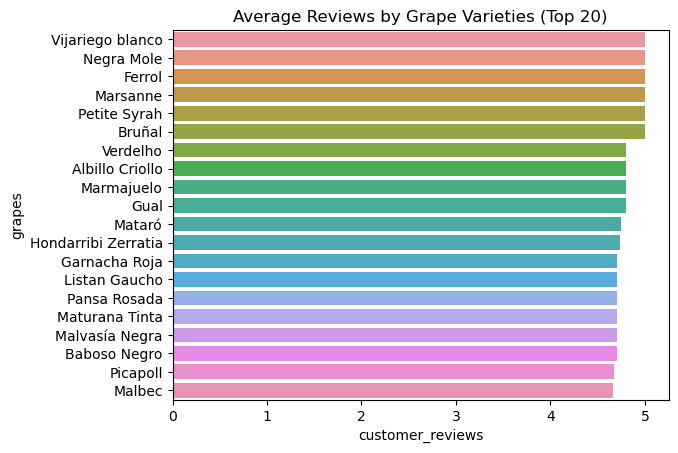

In [114]:
# Compare grapes by average reviews
avg_reviews_by_grapes = grapes_reviewed_wines.groupby('grapes')['customer_reviews'].mean().reset_index()
avg_reviews_by_grapes = avg_reviews_by_grapes.sort_values(by='customer_reviews', ascending=False)[:20]

sns.barplot(y='grapes', x='customer_reviews', data=avg_reviews_by_grapes)
plt.title("Average Reviews by Grape Varieties (Top 20)")
plt.show()

In [115]:
top_grapes = grape_count[grape_count["grapes"] > 100].index
top_grapes_df_reviewed = grapes_df[(grapes_df["grapes"].isin(top_grapes)) & (grapes_df["customer_reviews_number"]>1)]

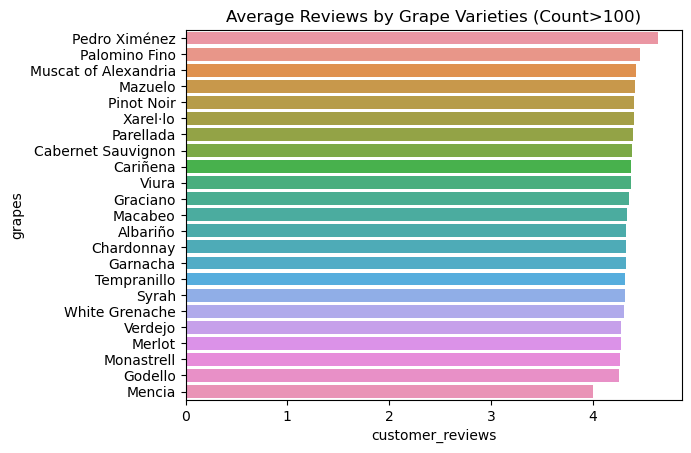

In [116]:
# Compare grapes by reviews (top grapes)
avg_reviews_by_grapes = top_grapes_df_reviewed.groupby('grapes')['customer_reviews'].mean().reset_index()
avg_reviews_by_grapes = avg_reviews_by_grapes.sort_values(by='customer_reviews', ascending=False)

sns.barplot(y='grapes', x='customer_reviews', data=avg_reviews_by_grapes)
plt.title("Average Reviews by Grape Varieties (Count>100)")
plt.show()

### Customer reviews and price

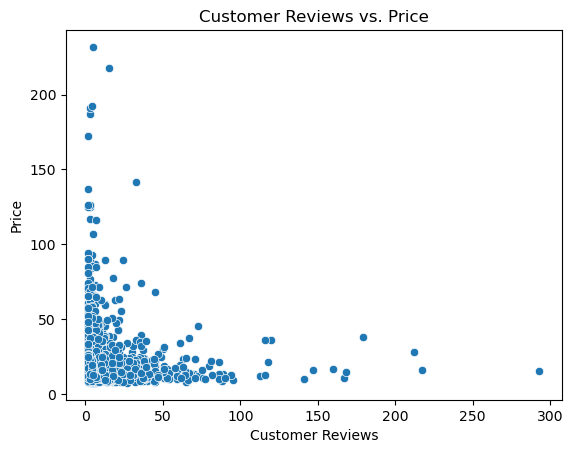

In [117]:
# Scatter plot to show the relationship between customer reviews and price
sns.scatterplot(x='customer_reviews_number', y='price', data=price_no_outliers[price_no_outliers["customer_reviews_number"]>1])
plt.xlabel("Customer Reviews")
plt.ylabel("Price")
plt.title("Customer Reviews vs. Price")
plt.show()

### Wines with higher number of reviews
As we saw in the univariate analysis, the majority of wines in the dataser have zero or very few reviews, but there is a small number of wines with a much higher number, up to almost 300 (see boxplot below). We will have a closer look at them.

<Axes: xlabel='customer_reviews_number'>

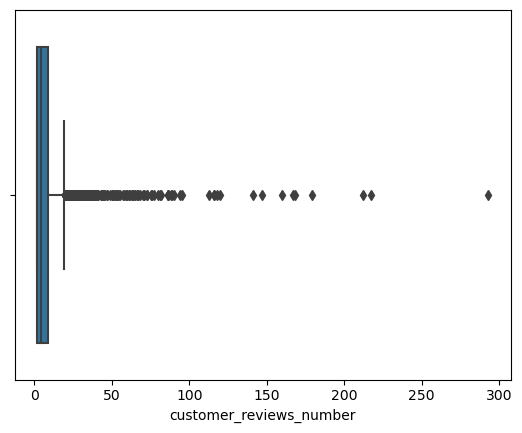

In [118]:
sns.boxplot(data=reviewed_wines, x="customer_reviews_number")

In [119]:
top_reviews = vinissimus[vinissimus["customer_reviews_number"]>50]
len(top_reviews)

63

#### Type of wine

[Text(0, 0, '47'), Text(0, 0, '12'), Text(0, 0, '4')]

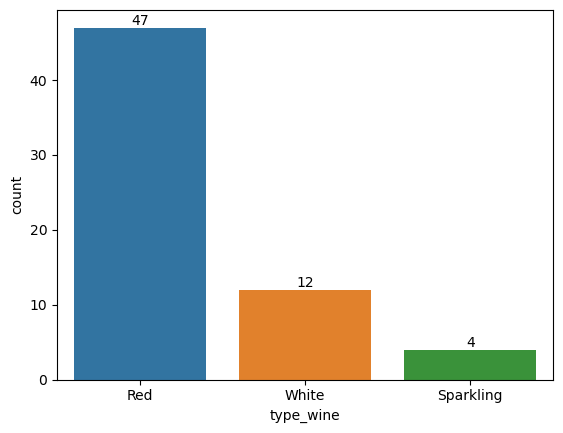

In [120]:
ax = sns.countplot(data=top_reviews, x="type_wine")
ax.bar_label(ax.containers[0])

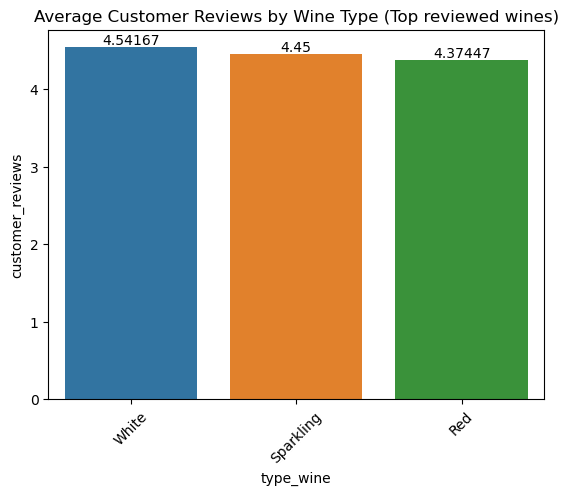

In [121]:
# Average customer reviews by wine type
avg_reviews_by_type = top_reviews.groupby('type_wine')['customer_reviews'].mean().reset_index()
avg_reviews_by_type = avg_reviews_by_type.sort_values(by='customer_reviews', ascending=False)
ax = sns.barplot(x='type_wine', y='customer_reviews', data=avg_reviews_by_type)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("Average Customer Reviews by Wine Type (Top reviewed wines)")
plt.show()

#### Geographical Indications

<Axes: xlabel='count', ylabel='region_gi'>

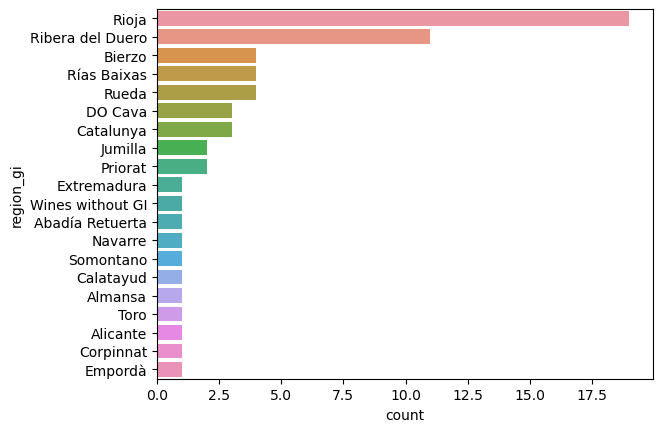

In [122]:
sns.countplot(data=top_reviews, y="region_gi", order=top_reviews["region_gi"].value_counts().index)

As we saw while looking at the relationship between reviews and GIs, we have the classical regions in the list, the top two (Rioja and Ribera) as well as others as Rías Baixas (Albariño wines), Rueda, Cava... all these regions are very popular for the general public and are typically found in supermarkets and department stores. <br>
We also find other regions like Bierzo, Catalunya, Jumilla, Priorat, Somontano, Toro... that are popular between the wine enthusiasts because they produce wines of high quality and different characteristics. 

In [123]:
top_reviews100 = vinissimus[vinissimus["customer_reviews_number"]>100]
len(top_reviews100)

14

<Axes: xlabel='count', ylabel='region_gi'>

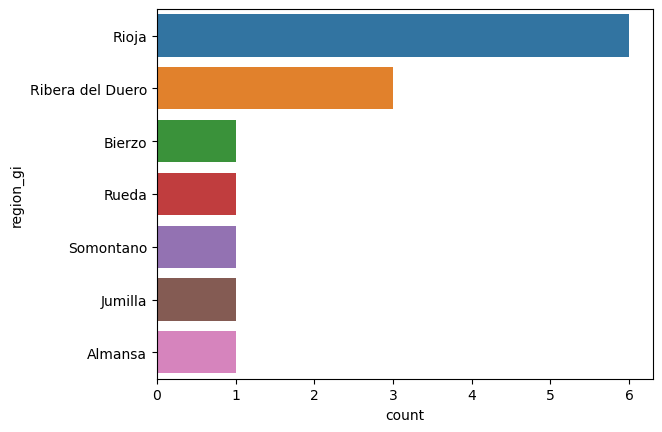

In [124]:
sns.countplot(data=top_reviews100, y="region_gi", order=top_reviews100["region_gi"].value_counts().index)

In [125]:
top_reviews100

wine    year  \
0                        Ultreia Saint Jacques 2021  2021.0   
3                        José Pariente Verdejo 2022  2022.0   
8                              El Coto Crianza 2019  2019.0   
9                        Viña Tondonia Reserva 2010  2010.0   
10                        Viña Ardanza Reserva 2016  2016.0   
11                         Pago de Carraovejas 2020  2020.0   
14                                  La Montesa 2019  2019.0   
21                      Enate Chardonnay - 234 2022  2022.0   
148                    Juan Gil Etiqueta Plata 2020  2020.0   
284                       Ramón Bilbao Crianza 2019  2019.0   
286                                       Laya 2021  2021.0   
379                                      Pruno 2020  2020.0   
3307                                     Aalto 2020  2020.0   
3315  Lindes de Remelluri Viñedos de Labastida 2019  2019.0   

                             winery  price  bottle type_wine  \
0             Raúl Pérez Viticultor   16.2    0.75       Red   
3            Bodegas José Pariente    16.2    0.75     White   
8                  El Coto de Rioja    9.8    0.75       Red   
9      Bodegas R. López de Heredia    37.8    0.75       Red   
10                    La Rioja Alta   27.8    0.75       Red   
11       Bodega Pago de Carraovejas   36.4    0.75       Red   
14         Bodegas Palacios Remondo   15.6    0.75       Red   
21                            Enate   12.0    0.75     White   
148                Bodegas Juan Gil   17.0    0.75       Red   
284            Bodegas Ramón Bilbao   12.4    0.75       Red   
286                 Bodegas Atalaya   11.0    0.75       Red   
379               Finca Villacreces   14.8    0.75       Red   
3307                          Aalto   36.0    0.75       Red   
3315  Granja Ntra. Sra de Remelluri   21.1    0.75       Red   

     type_wine_details type_agriculture              region         region_gi  \
0                  Red     Conventional     Castilla y León            Bierzo   
3                White     Conventional     Castilla y León             Rueda   
8                  Red     Conventional            La Rioja             Rioja   
9                  Red     Conventional            La Rioja             Rioja   
10                 Red     Conventional            La Rioja             Rioja   
11                 Red     Conventional     Castilla y León  Ribera del Duero   
14                 Red          Organic            La Rioja             Rioja   
21               White     Conventional              Aragón         Somontano   
148                Red          Organic              Murcia           Jumilla   
284                Red     Conventional            La Rioja             Rioja   
286                Red     Conventional  Castilla-La Mancha           Almansa   
379                Red     Conventional     Castilla y León  Ribera del Duero   
3307               Red     Conventional     Castilla y León  Ribera del Duero   
3315               Red     Conventional            La Rioja             Rioja   

                                                 grapes num_varieties  \
0                                            ['Mencia']      Varietal   
3                                           ['Verdejo']      Varietal   
8                                       ['Tempranillo']      Varietal   
9     ['Tempranillo', 'Garnacha', 'Graciano', 'Mazue...         Blend   
10                          ['Tempranillo', 'Garnacha']         Blend   
11      ['Tempranillo', 'Cabernet Sauvignon', 'Merlot']         Blend   
14                                         ['Garnacha']      Varietal   
21                                       ['Chardonnay']      Varietal   
148                                      ['Monastrell']      Varietal   
284                                     ['Tempranillo']      Varietal   
286                ['Garnacha Tintorera', 'Monastrell']         Blend   
379               ['Tempranillo', 'Cabernet Sauv

However, if we look at the wines with more than 100 reviews, we see that they are mostly from Rioja and Ribera, with only some small representations from other regions.<br>
We can conclude that even when there is a tremendous range of choices (almost 100 different regions), the most popular ones are mainly wines that could be found in a supermarket. However, among the website's customers there are clearly many wine lovers who enjoy trying different wines from other regions than the classical ones. We can help them learn about new options through a recommender.

In [126]:
top_reviews = pd.DataFrame(top_reviews100["region_gi"].value_counts().reset_index().values)
top_reviews.to_csv("top_reviews.csv", index=False) # export for the presentation

# Text data
What are we going to look at?
- **Length** (character length) and **word count** 
- **Term frequency** (which are the most common words?)
- **Word cloud**
<br>

Other common EDA techniques for NLP that we are not going to use are:
- **N-grams**: N-grams are contiguous sequences of n words. For example: bi-grams ("red fruit", "highly aromatic"...) and tri-grams ("complex fruit aromas"). Since we have already joined terms that consisted in more than one word, there is no need to perform this analysis.
- **Sentiment Analysis**: our data does not include text reviews or other descriptions with sentiment.
- **Named entity recognition**: there are no specific entities (like names of wineries, grapes, regions...) mentioned in the text.
- **Parts of speech tagging**: this method analyses the distribution of the different parts of speech (nouns, verbs, adjectives...). <br>
- **Topic modeling**

Resources for EDA in text data: 
- https://www.kaggle.com/code/harshsingh2209/complete-guide-to-eda-on-text-data
- https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

As we did in the cleaning part, we will focus first on the columns that have more potential for building the recommender: bouquet and mouth. <br>
We will start by dropping the null values in those two columns.

In [127]:
vinissimus.isna().sum()

wine                          0
year                        521
winery                        0
price                         0
bottle                      552
type_wine                     0
type_wine_details             0
type_agriculture              0
region                        0
region_gi                     0
grapes                        0
num_varieties                 0
tasting_bouquet            1529
tasting_mouth              1529
alcohol_content              23
customer_reviews              2
customer_reviews_number       2
parker_score               4898
parker_score_num           4898
penin_score                5197
image                         0
url                           0
bouquet_norm               1529
mouth_norm                 1529
parker_penin_score            0
dtype: int64

In [128]:
text_data = vinissimus.dropna(subset=["bouquet_norm"]).reset_index(drop=True)
text_data.isna().sum()

wine                          0
year                        378
winery                        0
price                         0
bottle                      381
type_wine                     0
type_wine_details             0
type_agriculture              0
region                        0
region_gi                     0
grapes                        0
num_varieties                 0
tasting_bouquet               0
tasting_mouth                 0
alcohol_content              14
customer_reviews              0
customer_reviews_number       0
parker_score               3557
parker_score_num           3557
penin_score                3705
image                         0
url                           0
bouquet_norm                  0
mouth_norm                    0
parker_penin_score            0
dtype: int64

In [129]:
def exploring_text(df, column, normalized_column):
    print("Length and counts of words")
    print("")
    
    # Character count
    df["lenght"] = df[column].str.len()
    
    # Word count
    def word_count(text):
        text_list = text.split()
        return len(text_list)

    df["word_count"] = df[column].apply(word_count)   
    
    print(df.describe())
    print("")
    
    # Visualizations
    print("Length (character count)")
    sns.histplot(df["lenght"])
    plt.show()
    sns.boxplot(x=df["lenght"])
    plt.show()    
    
    print("Word count")
    sns.histplot(df["word_count"])
    plt.show()
    sns.boxplot(x=df["word_count"])
    plt.show()   
    
    # Obtain the outliers in word count    
    outliers_word_count = df[abs(zscore(df["word_count"])) >= 3]
    
    # Term Frequency Analysis
    print("Term Frequency Analysis")
    df["lists"] = df[normalized_column].str.split()
   
    corpus = []
    for i in range(df.shape[0]): 
        corpus += df["lists"][i] # Iterates over the column and adds all the elements to the corpus variable
    print(f"There is a total of {len(corpus)} terms in {normalized_column}.")

    word_freq_dict = Counter(corpus)
       
    # Barplot
    print("Which are the most common terms?")
    
    most_common_terms = word_freq_dict.most_common(20)
    terms = [term for term, _ in most_common_terms]
    freq = [count for _, count in most_common_terms]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=freq, y=terms)
    ax.bar_label(ax.containers[0])
    plt.title('Top 20 Most Frequently Occurring Terms')
    plt.xlabel('Frequency')
    plt.ylabel('Terms')
    plt.show()
    
    # Word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()   
    
    # Dataframe with terms and frequencies
    term_frequencies = pd.DataFrame(list(word_freq_dict.items()), columns=['term', 'frequency'])
    term_frequencies = term_frequencies.sort_values(by='frequency', ascending=False).reset_index(drop=True)
    term_frequencies["proportion"] = round(term_frequencies["frequency"]/len(text_data)*100, 2)
    
    return outliers_word_count, term_frequencies

In [130]:
def exploring_text_short(df, normalized_column):
     # Term Frequency Analysis
    print("Term Frequency Analysis")
    df["lists"] = df[normalized_column].str.split()
   
    corpus = []
    for i in range(df.shape[0]): 
        corpus += df["lists"][i] # Iterates over the column and adds all the elements to the corpus variable
    print(f"There is a total of {len(corpus)} terms in {normalized_column}.")

    word_freq_dict = Counter(corpus)
       
    # Barplot
    print("Which are the most common terms?")
    
    most_common_terms = word_freq_dict.most_common(20)
    terms = [term for term, _ in most_common_terms]
    freq = [count for _, count in most_common_terms]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=freq, y=terms)
    ax.bar_label(ax.containers[0])
    plt.title('Top 20 Most Frequently Occurring Terms')
    plt.xlabel('Frequency')
    plt.ylabel('Terms')
    plt.show()
    
    # Word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()   
    
    # Dataframe with terms and frequencies
    term_frequencies = pd.DataFrame(list(word_freq_dict.items()), columns=['term', 'frequency'])
    term_frequencies = term_frequencies.sort_values(by='frequency', ascending=False).reset_index(drop=True)
    term_frequencies["proportion"] = round(term_frequencies["frequency"]/len(text_data)*100, 2)
    
    return term_frequencies

### Bouquet

In [131]:
bouquet = text_data[["wine", "tasting_bouquet", "bouquet_norm"]]
bouquet.head()

wine  \
0            Ultreia Saint Jacques 2021   
1                        Blanc Pescador   
2  Bach Extrísimo Blanco Semidulce 2021   
3            José Pariente Verdejo 2022   
4             Coto de Imaz Reserva 2018   

                                     tasting_bouquet  \
0                                Raspberry / Violets   
1          Aromatic / Fruit aromas / Highly aromatic   
2  Highly aromatic / Complex / Fruit aromas / Flo...   
3           White fruit / Apricot / Fennel / Aniseed   
4                 Ripe fruit / Spicy notes / Complex   

                                        bouquet_norm  
0                                  raspberry violets  
1              aromatic fruit_aromas highly_aromatic  
2  highly_aromatic complex fruit_aromas floral_sc...  
3                 white_fruit apricot fennel aniseed  
4                     ripe_fruit spicy_notes complex

Length and counts of words

            lenght   word_count
count  3816.000000  3816.000000
mean     77.775157    14.889675
std      33.937577     6.529509
min       5.000000     1.000000
25%      53.000000    10.000000
50%      73.000000    14.000000
75%      97.000000    19.000000
max     268.000000    53.000000

Length (character count)


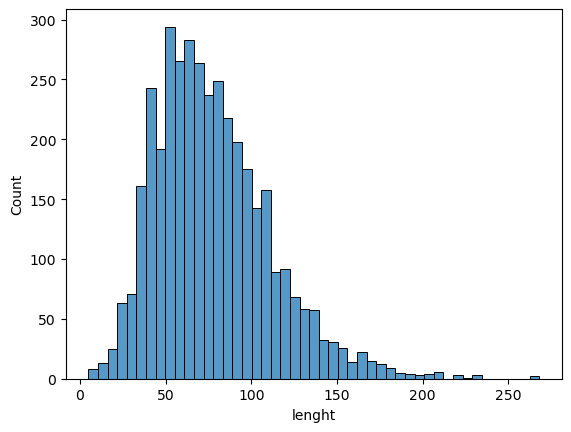

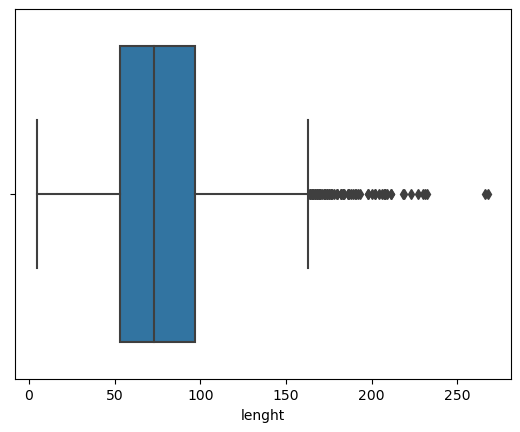

Word count


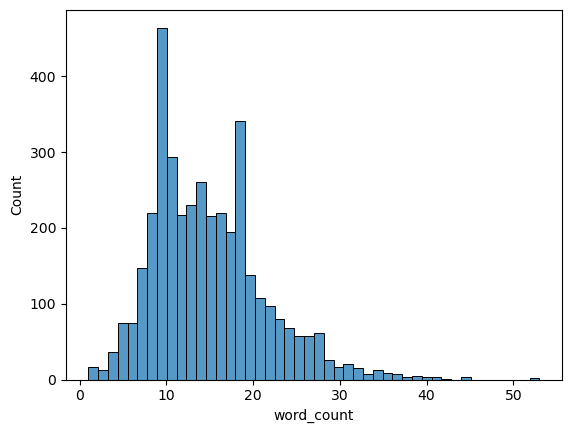

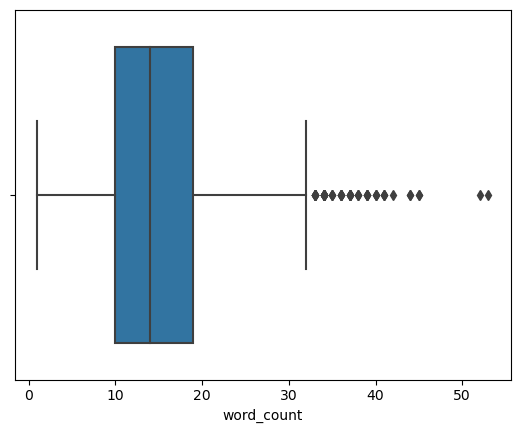

Term Frequency Analysis
There is a total of 22811 terms in bouquet_norm.
Which are the most common terms?


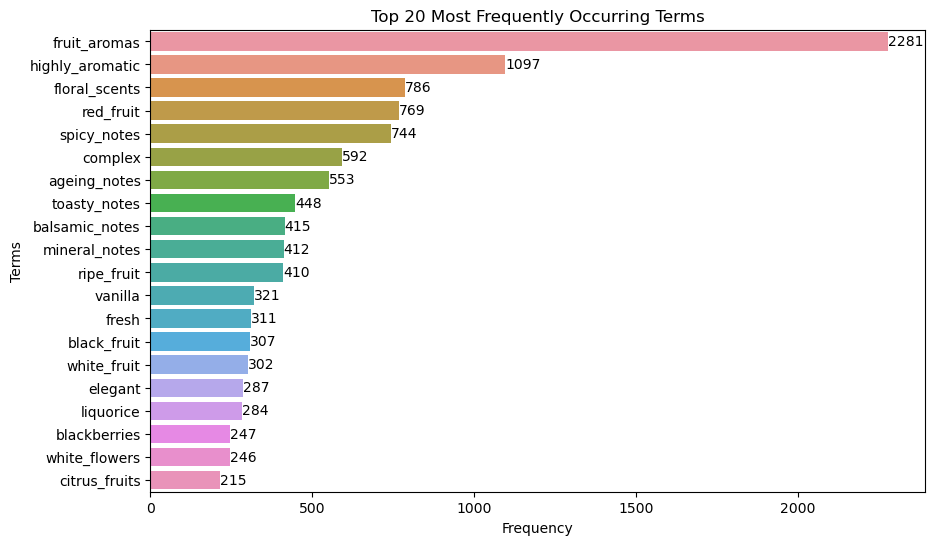

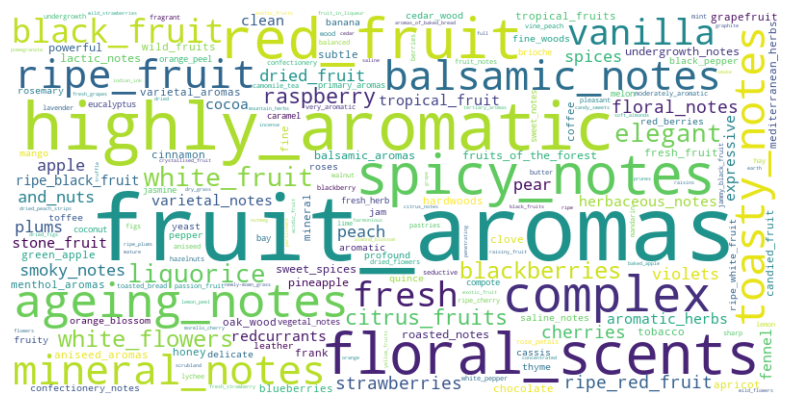

In [132]:
outliers_word_count, term_freq = exploring_text(bouquet, "tasting_bouquet", "bouquet_norm")

### Mouth

In [133]:
mouth = text_data[["wine", "tasting_mouth", "mouth_norm"]]
mouth.head()

wine  \
0            Ultreia Saint Jacques 2021   
1                        Blanc Pescador   
2  Bach Extrísimo Blanco Semidulce 2021   
3            José Pariente Verdejo 2022   
4             Coto de Imaz Reserva 2018   

                                       tasting_mouth  \
0   Red fruit / Mineral / Voluminous / Medium-bodied   
1                       Light / Pleasant / Sparkling   
2  Good entry / Structured / Balanced / Good acid...   
3              Rich / Unctuous / Pleasant bitterness   
4         Fleshy / Powerful / Ripe tannins / Velvety   

                                          mouth_norm  
0         red_fruit mineral voluminous medium-bodied  
1                           light pleasant sparkling  
2  good_entry structured balanced good_acidity fl...  
3                  rich unctuous pleasant_bitterness  
4               fleshy powerful ripe_tannins velvety

Length and counts of words

            lenght   word_count
count  3816.000000  3816.000000
mean     69.484539    12.863470
std      33.254447     6.231528
min       3.000000     1.000000
25%      44.000000     8.000000
50%      65.000000    12.000000
75%      89.000000    17.000000
max     246.000000    45.000000

Length (character count)


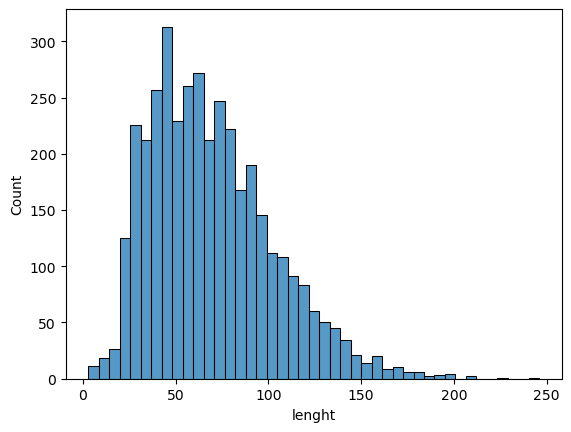

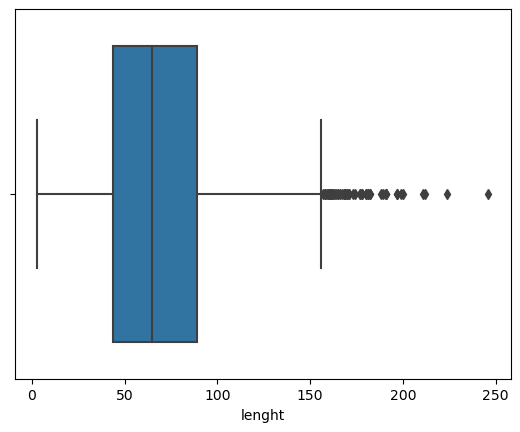

Word count


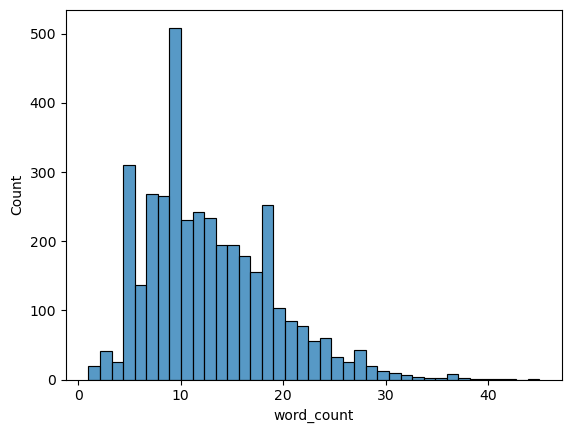

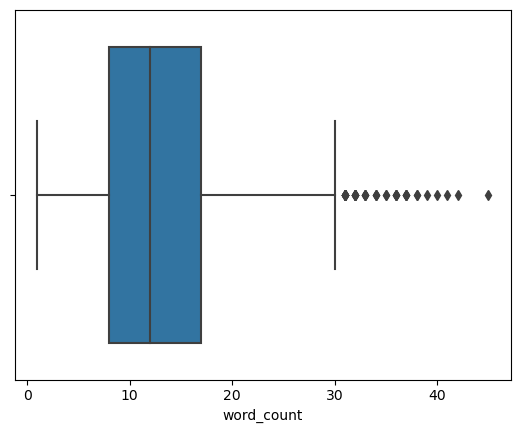

Term Frequency Analysis
There is a total of 22762 terms in mouth_norm.
Which are the most common terms?


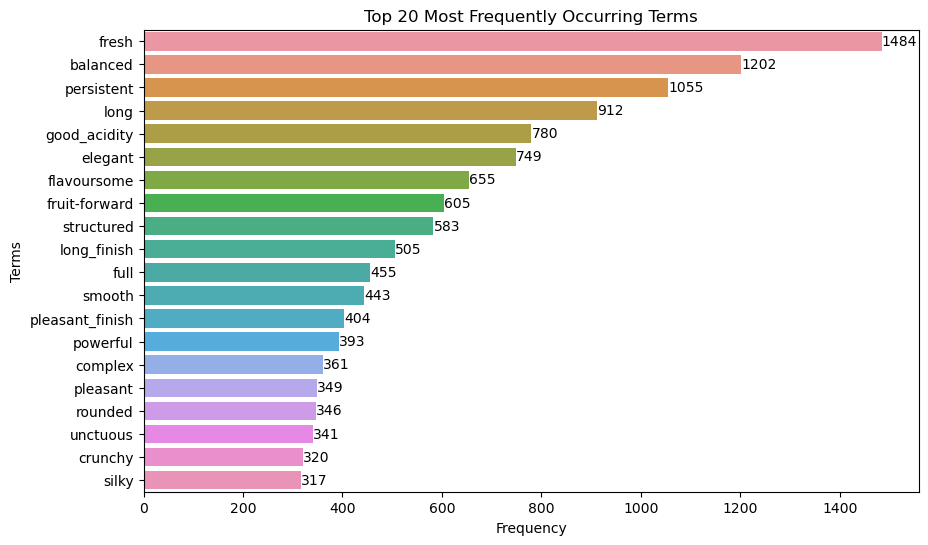

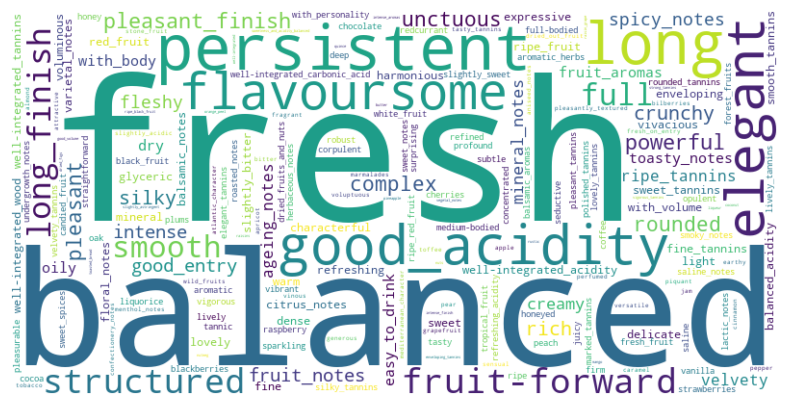

In [134]:
outliers_word_count, term_freq = exploring_text(mouth, "tasting_mouth", "mouth_norm")

### Bouquet and mouth
Join the two columns since this is how we will use them for clustering.

In [135]:
text_data["tasting_notes"] = text_data["tasting_mouth"] + " / " + text_data["tasting_bouquet"]
text_data["notes_norm"] = text_data["mouth_norm"] + " " + text_data["bouquet_norm"]
text_data.head()

wine    year                  winery  \
0            Ultreia Saint Jacques 2021  2021.0   Raúl Pérez Viticultor   
1                        Blanc Pescador     NaN                Perelada   
2  Bach Extrísimo Blanco Semidulce 2021  2021.0              Masia Bach   
3            José Pariente Verdejo 2022  2022.0  Bodegas José Pariente    
4             Coto de Imaz Reserva 2018  2018.0        El Coto de Rioja   

   price  bottle  type_wine type_wine_details type_agriculture  \
0   16.2    0.75        Red               Red     Conventional   
1    7.8    0.75  Sparkling   Frizzante white     Conventional   
2    9.4    0.75      White             White     Conventional   
3   16.2    0.75      White             White     Conventional   
4   13.0    0.75        Red               Red     Conventional   

             region         region_gi                                grapes  \
0   Castilla y León            Bierzo                            ['Mencia']   
1  Wines without GI  Wines without GI  ['Macabeo', 'Parellada', 'Xarel·lo']   
2          Cataluña         Catalunya               ['Xarel·lo', 'Macabeo']   
3   Castilla y León             Rueda                           ['Verdejo']   
4          La Rioja             Rioja                       ['Tempranillo']   

  num_varieties                                    tasting_bouquet  \
0      Varietal                                Raspberry / Violets   
1         Blend          Aromatic / Fruit aromas / Highly aromatic   
2         Blend  Highly aromatic / Complex / Fruit aromas / Flo...   
3      Varietal           White fruit / Apricot / Fennel / Aniseed   
4      Varietal                 Ripe fruit / Spicy notes / Complex   

                                       tasting_mouth  alcohol_content  \
0   Red fruit / Mineral / Voluminous / Medium-bodied             13.5   
1                       Light / Pleasant / Sparkling             11.5   
2  Good entry / Structured / Balanced / Good acid...             11.5   
3              Rich / Unctuous / Pleasant bitterness             13.0   
4         Fleshy / Powerful / Ripe tannins / Velvety             13.5   

   customer_reviews  customer_reviews_number parker_score  parker_score_num  \
0               4.2                    217.0          NaN               NaN   
1               4.4                     45.0          NaN               NaN   
2               4.8                     95.0          NaN               NaN   
3               4.4                    147.0          NaN               NaN   
4               4.4                     94.0          NaN               NaN   

   penin_score                                              image  \
0          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
1          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
2          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
3          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
4          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   

                                                 url  \
0  https://www.vinissimus.com/en/wine/ultreia-sai...   
1  https://www.vinissimus.com/en/wine/blanc-pesca...   
2  https://www.vinissimus.com/en/wine/bach-extris...   
3  https://www.vinissimus.com/en/wine/jose-parien...   
4  https://www.vinissimus.com/en/wine/coto-de-ima...   

                                        bouquet_norm  \
0                                  raspberry violets   
1              aromatic fruit_aromas highly_aromatic   
2  highly_aromatic complex fruit_aromas floral_sc...   
3                 white_fruit apricot fennel aniseed   
4                     ripe_fruit spicy_notes complex   

                                          mouth_norm  parker_penin_score  \
0         red_fruit mineral voluminous medium-bodied                   0   
1                           light pleasant sparkling                   0   
2  good_entry structured balanced good_acidity fl...        

In [136]:
tasting_notes = text_data[["wine", "tasting_notes", "notes_norm"]]
tasting_notes.head()

wine  \
0            Ultreia Saint Jacques 2021   
1                        Blanc Pescador   
2  Bach Extrísimo Blanco Semidulce 2021   
3            José Pariente Verdejo 2022   
4             Coto de Imaz Reserva 2018   

                                       tasting_notes  \
0  Red fruit / Mineral / Voluminous / Medium-bodi...   
1  Light / Pleasant / Sparkling / Aromatic / Frui...   
2  Good entry / Structured / Balanced / Good acid...   
3  Rich / Unctuous / Pleasant bitterness / White ...   
4  Fleshy / Powerful / Ripe tannins / Velvety / R...   

                                          notes_norm  
0  red_fruit mineral voluminous medium-bodied ras...  
1  light pleasant sparkling aromatic fruit_aromas...  
2  good_entry structured balanced good_acidity fl...  
3  rich unctuous pleasant_bitterness white_fruit ...  
4  fleshy powerful ripe_tannins velvety ripe_frui...

Length and counts of words

            lenght   word_count
count  3816.000000  3816.000000
mean    150.259696    28.753145
std      58.854646    11.220295
min      14.000000     3.000000
25%     106.000000    20.000000
50%     142.000000    27.000000
75%     186.000000    35.000000
max     446.000000    85.000000

Length (character count)


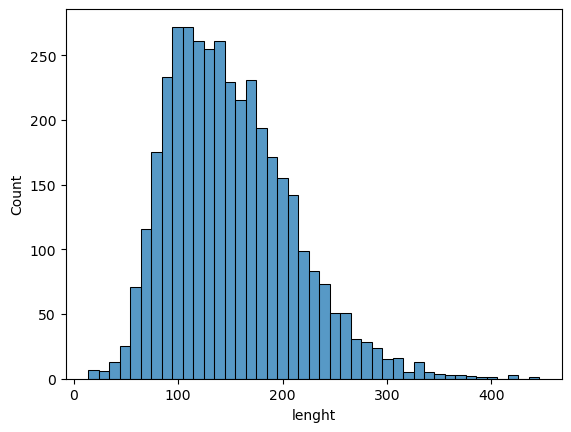

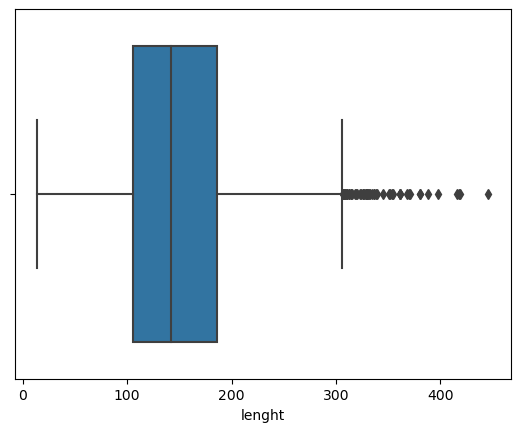

Word count


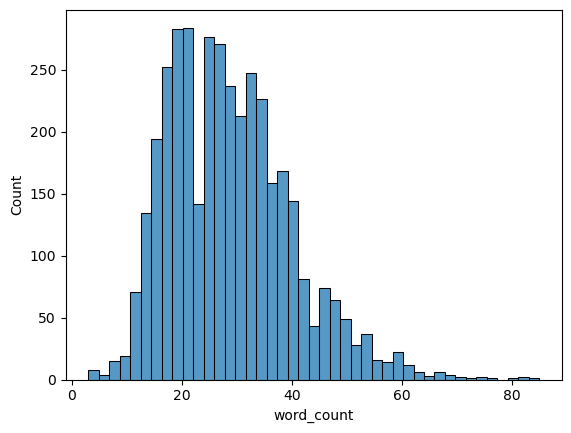

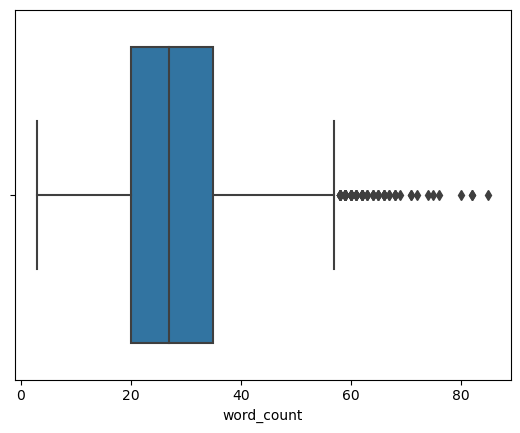

Term Frequency Analysis
There is a total of 45573 terms in notes_norm.
Which are the most common terms?


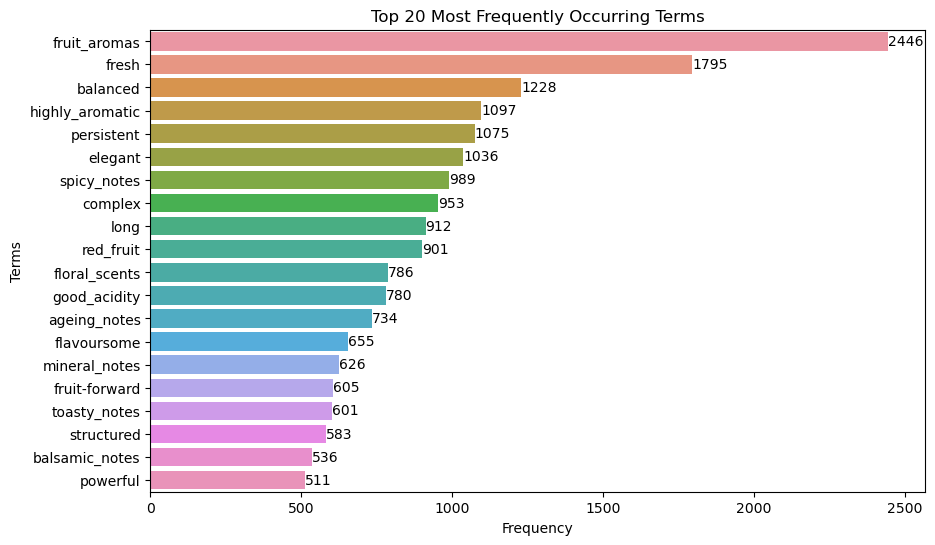

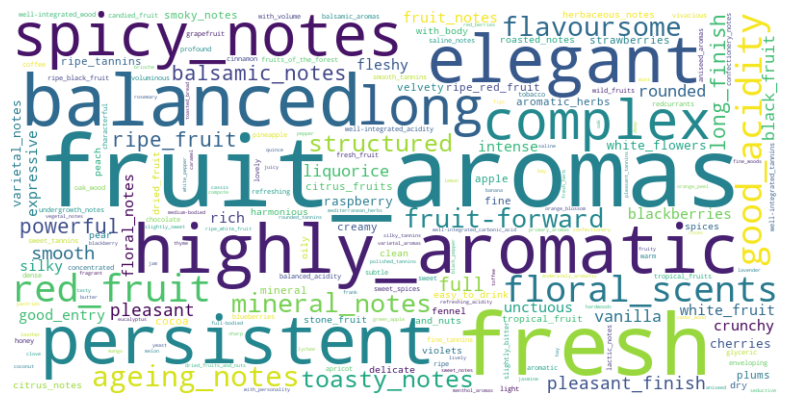

In [137]:
outliers_word_count, term_freq = exploring_text(tasting_notes, "tasting_notes", "notes_norm")

#### Values that are longer than usual

In [138]:
len(outliers_word_count)

29

In [139]:
outliers_word_count

wine  \
32                   Barón de Ley Reserva 2018   
407       Raventós de Alella Blanc Allier 2019   
470                       Tebaida Nemesio 2015   
550               Finca Valpiedra Reserva 2015   
551                         Tocat i Posat 2014   
601         Barón de Ley Finca Monasterio 2019   
606   Barón de Ley 3 Viñas Blanco Reserva 2019   
701                              La Clave 2020   
923                Més Que Paraules Negre 2020   
1292                              Cipma I 2019   
1553                Fraga Do Corvo Mencía 2022   
1660  Bosque de Matasnos Edición Limitada 2018   
1946                      Davide Albariño 2022   
2201     Gregorio Martínez Finca Sangrado 2016   
2373         Pérez Pascuas Gran Selección 2014   
2513                Antoni Giribet Gínjol 2018   
2539                       Clos del Músic 2017   
2578                               Líbero 2018   
2700                   Goliardo Espadeiro 2017   
2740                             Cipma II 2019   
2807                Fai un Sol de Carallo 2020   
2847                        Flor de Silos 2018   
2907                    Mas Igneus Fa 112 2015   
3047            Finca Moncloa 10 barricas 2014   
3142                     Navaldar Crianza 2015   
3192                Briego Adalid Reserva 2015   
3208               Pago del Vicario Agios 2007   
3429       Finca Viñoa Embotellado Tardío 2019   
3534                  Viña Verino Godello 2014   

                                          tasting_notes  \
32    Good entry / Voluminous / Unctuous / Rounded t...   
407   Good entry / Elegant / Creamy / Smoky notes / ...   
470   Fresh on entry / Lovely / Elegant / Unctuous /...   
550   Smooth / With volume / Fine / Structured / Tan...   
551   Powerful / Flavoursome / Fruit notes / Ripe re...   
601   Structured / Flavoursome / Balanced / Elegant ...   
606   Vivacious / Complex / Profound / deep / Minera...   
701   Full / Concentrated / Balanced / Fresh / Pleas...   
923   Intense / Flavoursome / Complex / Ripe fruit /...   
1292  Good entry / Vivacious / Saline / Fresh / Harm...   
1553  Good entry / Fresh / Spicy notes / Pepper / Sm...   
1660  Full / Intense / Fleshy / Silky / Powerful / E...   
1946  Good entry / Fresh / Fruit-forward / Structure...   
2201  Fresh / Light / With volume / Fresh fruit / Re...   
2373  Velvety / With body / Vivacious / Wild fruits ...   
2513  Good entry / Powerful / With body / Well-integ...   
2539  With body / Characterful / Intense / Profound ...   
2578  Good entry / Unctuous / Balanced / Refreshing ...   
2700  Structured / Fresh on entry / Well-integrated ...   
2740  Expressive / Fresh / Citrus notes / Silky / Sa...   
2807  Full / Complex / Oily / Long / Crunchy / Elega...   
2847  Concentrated / Fleshy / Powerful / Balanced / ...   
2907  Good entry / Structured / Fruit-forward / Flav...   
3047  Balanced / Good acidity / Good entry / Slightl...   
3142  With personality / Characterful / Balsamic not...   
3192  Powerful / Structured / Well-integrated acidit...   
3208  Pleasant tannins / Sweet tannins / Fruit notes...   
3429  Structured / Intense / Dense / Glyceric / Frui...   
3534  Voluptuous / Balanced / Harmonious / Full / Cr...   

                                             notes_norm  lenght  word_count  
32    good_entry voluminous unctuous rounded_tannins...     326          64  
407   good_entry elegant creamy smoky_notes aromatic...     333          66  
470   fresh_on_entry lovely elegant unctuous volumin...     332          63  
550   smooth with_volume fine structured tannic flav...     361          72  
551   powerful flavoursome fruit_notes ripe_red_frui...     329          63  
601   structured flavoursome balanced elegant well-i...     336          66  
606   vivacious complex profound deep mineral_notes ...     361          68  
701   full concentrated balanced fresh pleasant_tann...     361          65  
923   intense flavoursome complex ripe_fruit toasty_...     355     

We see here that the outliers are not errors. At the same time, there does not seem to be any pattern in the winery these wines come from or the type of wine (they are mostly reds but that is also the predominant type of wine).

#### Term frequencies

In [140]:
term_freq.head()

term  frequency  proportion
0     fruit_aromas       2446       64.10
1            fresh       1795       47.04
2         balanced       1228       32.18
3  highly_aromatic       1097       28.75
4       persistent       1075       28.17

In [141]:
term_freq.describe()

frequency  proportion
count   653.000000  653.000000
mean     69.790199    1.829234
std     190.433515    4.990330
min       1.000000    0.030000
25%       2.000000    0.050000
50%       9.000000    0.240000
75%      48.000000    1.260000
max    2446.000000   64.100000

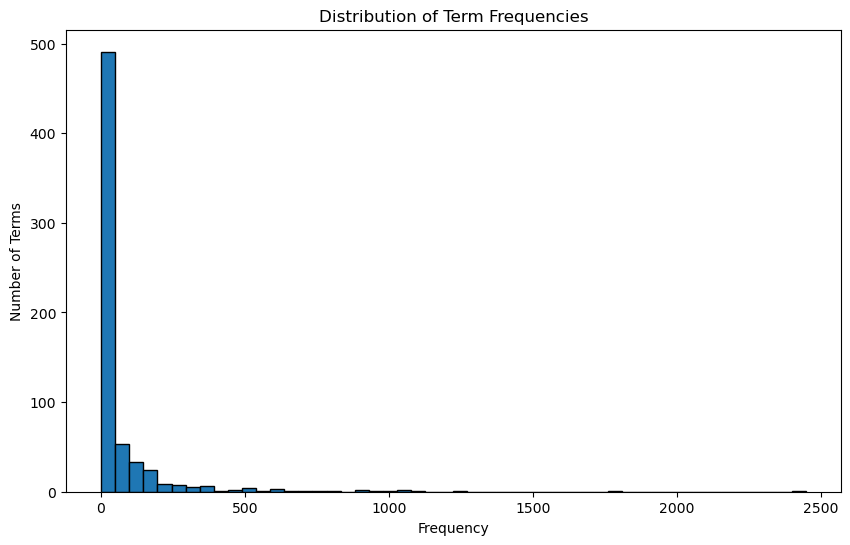

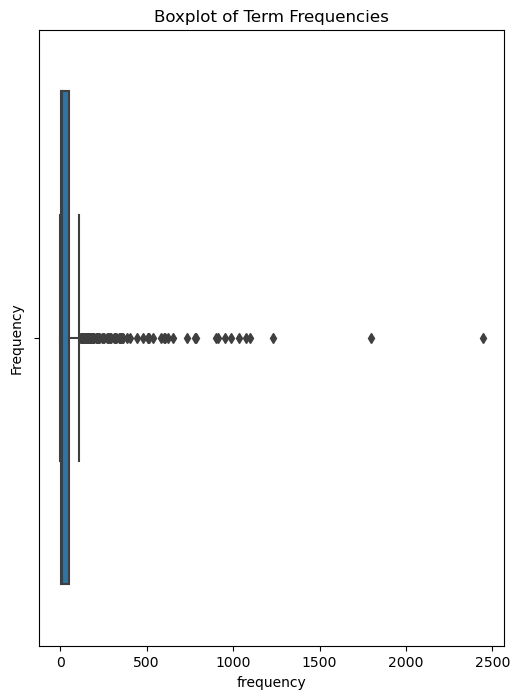

In [142]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(term_freq['frequency'], bins=50, edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.title('Distribution of Term Frequencies')
plt.show()

# Boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(x=term_freq['frequency'])
plt.ylabel('Frequency')
plt.title('Boxplot of Term Frequencies')
plt.show()

There are 653 different descriptors. The distribution is highly skewed: more than half of the terms appear less than 10 times, while there are some terms that appear more than 1000 times. The most striking is "fruit aromas", which is mentioned in 64% of the wines. "Fresh" appears in almost 50% of the wines. <br>
For the clustering exercise, we are not interested in terms that appear in most wines, since this does not help the model in find differences between clusters. Therefore we should remove the term "fruit aromas", and maybe the term "fresh". The following terms have a proportion of one third or less, so we will leave them. <br>
At the same time, we are not interested in terms that appear in just a few wines. The model needs to find the similarities between wines, and those terms just add noise. We should consider here what is the threshold that we are going to use for dropping. 

First, we are going to look at the terms to find patterns, terms that can be combined together, words that can be dropped...

In [293]:
# term_freq

#### Removing least interesting words 
There are some words that appear a great number of times and that don't have a meaning that interest us. Also, we will replace "fruits" with "fruit".

In [144]:
drop_words = ["aromas", "notes", "varietal_aromas", "varietal", "slightly", "lightly"]

In [145]:
stop_words = set(stopwords.words('english'))

def normalize_remove(text):
    if pd.isna(text):
        normalized = np.nan
    else:
        # Convert the text to lowercase
        text_lower = text.lower()

        # Replace "fruits" with "fruit"
        text_lower = text_lower.replace("fruits", "fruit")

        # Create a pattern to match any of the words in the drop_words list
        pattern = r"\b(?:{})\b".format("|".join(map(re.escape, drop_words)))

        # Use re.sub() to replace the matched pattern with an empty string
        cleaned_text = re.sub(pattern, "", text_lower)

        # Split by '/' and strip leading/trailing spaces from each part
        parts = [part.strip() for part in cleaned_text.split('/')]

        # Replace spaces with underscores in each part, and remove stop words
        parts = [part.replace(" ", "_") for part in parts if part.lower() not in stop_words]

        # Join the parts with spaces to form the final string 
        normalized = " ".join(parts)

    return normalized  

In [146]:
text_data["bouquet_norm_removed"] = text_data["tasting_bouquet"].apply(normalize_remove)
text_data["mouth_norm_removed"] = text_data["tasting_mouth"].apply(normalize_remove)
text_data["notes_norm_removed"] = text_data["mouth_norm_removed"] + " " + text_data["bouquet_norm_removed"]
text_data.head()

wine    year                  winery  \
0            Ultreia Saint Jacques 2021  2021.0   Raúl Pérez Viticultor   
1                        Blanc Pescador     NaN                Perelada   
2  Bach Extrísimo Blanco Semidulce 2021  2021.0              Masia Bach   
3            José Pariente Verdejo 2022  2022.0  Bodegas José Pariente    
4             Coto de Imaz Reserva 2018  2018.0        El Coto de Rioja   

   price  bottle  type_wine type_wine_details type_agriculture  \
0   16.2    0.75        Red               Red     Conventional   
1    7.8    0.75  Sparkling   Frizzante white     Conventional   
2    9.4    0.75      White             White     Conventional   
3   16.2    0.75      White             White     Conventional   
4   13.0    0.75        Red               Red     Conventional   

             region         region_gi                                grapes  \
0   Castilla y León            Bierzo                            ['Mencia']   
1  Wines without GI  Wines without GI  ['Macabeo', 'Parellada', 'Xarel·lo']   
2          Cataluña         Catalunya               ['Xarel·lo', 'Macabeo']   
3   Castilla y León             Rueda                           ['Verdejo']   
4          La Rioja             Rioja                       ['Tempranillo']   

  num_varieties                                    tasting_bouquet  \
0      Varietal                                Raspberry / Violets   
1         Blend          Aromatic / Fruit aromas / Highly aromatic   
2         Blend  Highly aromatic / Complex / Fruit aromas / Flo...   
3      Varietal           White fruit / Apricot / Fennel / Aniseed   
4      Varietal                 Ripe fruit / Spicy notes / Complex   

                                       tasting_mouth  alcohol_content  \
0   Red fruit / Mineral / Voluminous / Medium-bodied             13.5   
1                       Light / Pleasant / Sparkling             11.5   
2  Good entry / Structured / Balanced / Good acid...             11.5   
3              Rich / Unctuous / Pleasant bitterness             13.0   
4         Fleshy / Powerful / Ripe tannins / Velvety             13.5   

   customer_reviews  customer_reviews_number parker_score  parker_score_num  \
0               4.2                    217.0          NaN               NaN   
1               4.4                     45.0          NaN               NaN   
2               4.8                     95.0          NaN               NaN   
3               4.4                    147.0          NaN               NaN   
4               4.4                     94.0          NaN               NaN   

   penin_score                                              image  \
0          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
1          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
2          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
3          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
4          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   

                                                 url  \
0  https://www.vinissimus.com/en/wine/ultreia-sai...   
1  https://www.vinissimus.com/en/wine/blanc-pesca...   
2  https://www.vinissimus.com/en/wine/bach-extris...   
3  https://www.vinissimus.com/en/wine/jose-parien...   
4  https://www.vinissimus.com/en/wine/coto-de-ima...   

                                        bouquet_norm  \
0                                  raspberry violets   
1              aromatic fruit_aromas highly_aromatic   
2  highly_aromatic complex fruit_aromas floral_sc...   
3                 white_fruit apricot fennel aniseed   
4                     ripe_fruit spicy_notes complex   

                                          mouth_norm  parker_penin_score  \
0         red_fruit mineral voluminous medium-bodied                   0   
1                           light pleasant sparkling                   0   
2  good_entry structured balanced good_acidity fl...        

In [147]:
tasting_notes["notes_norm_removed"] = text_data["notes_norm_removed"]
tasting_notes.head()

wine  \
0            Ultreia Saint Jacques 2021   
1                        Blanc Pescador   
2  Bach Extrísimo Blanco Semidulce 2021   
3            José Pariente Verdejo 2022   
4             Coto de Imaz Reserva 2018   

                                       tasting_notes  \
0  Red fruit / Mineral / Voluminous / Medium-bodi...   
1  Light / Pleasant / Sparkling / Aromatic / Frui...   
2  Good entry / Structured / Balanced / Good acid...   
3  Rich / Unctuous / Pleasant bitterness / White ...   
4  Fleshy / Powerful / Ripe tannins / Velvety / R...   

                                          notes_norm  lenght  word_count  \
0  red_fruit mineral voluminous medium-bodied ras...      70          12   
1  light pleasant sparkling aromatic fruit_aromas...      72          13   
2  good_entry structured balanced good_acidity fl...     169          33   
3  rich unctuous pleasant_bitterness white_fruit ...      80          15   
4  fleshy powerful ripe_tannins velvety ripe_frui...      79          16   

                                               lists  \
0  [red_fruit, mineral, voluminous, medium-bodied...   
1  [light, pleasant, sparkling, aromatic, fruit_a...   
2  [good_entry, structured, balanced, good_acidit...   
3  [rich, unctuous, pleasant_bitterness, white_fr...   
4  [fleshy, powerful, ripe_tannins, velvety, ripe...   

                                  notes_norm_removed  
0  red_fruit mineral voluminous medium-bodied ras...  
1  light pleasant sparkling aromatic fruit highly...  
2  good_entry structured balanced good_acidity fl...  
3  rich unctuous pleasant_bitterness white_fruit ...  
4  fleshy powerful ripe_tannins velvety ripe_frui...

Term Frequency Analysis
There is a total of 45252 terms in notes_norm_removed.
Which are the most common terms?


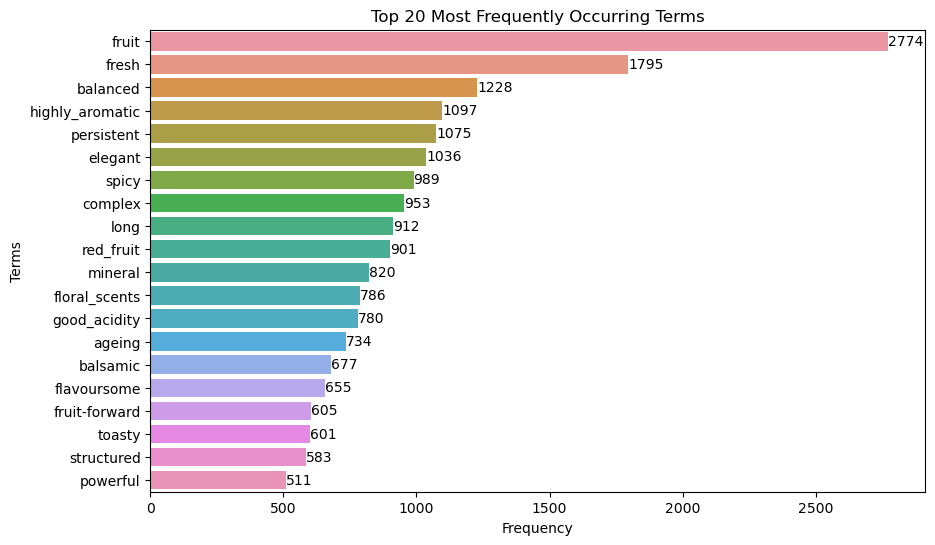

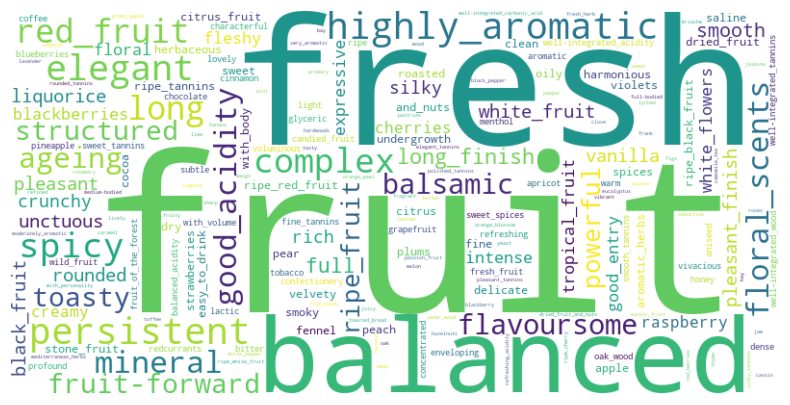

In [148]:
term_freq = exploring_text_short(tasting_notes, "notes_norm_removed")

In [149]:
term_freq.describe()

frequency  proportion
count   613.000000  613.000000
mean     73.820555    1.934910
std     204.332615    5.354444
min       1.000000    0.030000
25%       2.000000    0.050000
50%       9.000000    0.240000
75%      51.000000    1.340000
max    2774.000000   72.690000

In [294]:
# term_freq

Now the single word "fruit" is present in 73% of the wines, and fresh in almost 50%.

#### Most frequent aromas and wine characteristics
tannins/tannic, aromatic, fruit, bitter, wood (oak), body/bodied, fresh, grass, candy/candied, acid, mint/menth, earth, liqueur, grape, astringent, grass, finish, caramel, liquorice, compote

In [151]:
# Fruit
term_freq[term_freq["term"].str.contains("fruit")]

term  frequency  proportion
0                           fruit       2774       72.69
9                       red_fruit        901       23.61
16                  fruit-forward        605       15.85
20                     ripe_fruit        510       13.36
26                    black_fruit        378        9.91
30                    white_fruit        345        9.04
40                 tropical_fruit        263        6.89
46                 ripe_red_fruit        222        5.82
48                   citrus_fruit        215        5.63
66                    dried_fruit        164        4.30
76               ripe_black_fruit        148        3.88
77                    stone_fruit        147        3.85
86            fruit_of_the_forest        130        3.41
97                    fresh_fruit        118        3.09
109                 candied_fruit         96        2.52
114                    grapefruit         89        2.33
118                    wild_fruit         86        2.25
137                        fruity         60        1.57
141              ripe_white_fruit         55        1.44
165                  exotic_fruit         44        1.15
171          dried_fruit_and_nuts         40        1.05
191                 passion_fruit         32        0.84
200                  forest_fruit         29        0.76
216             jammy_black_fruit         25        0.66
223            crystallised_fruit         22        0.58
233                  yellow_fruit         21        0.55
248              fruit_in_liqueur         19        0.50
250                 raisiny_fruit         18        0.47
267                   sweet_fruit         14        0.37
270                  acidic_fruit         14        0.37
278              ripe_stone_fruit         12        0.31
287               dried_out_fruit         11        0.29
301            ready_to_eat_fruit         10        0.26
306                 fruit_jellies          9        0.24
325                 red_fruit_jam          7        0.18
348                fruit_in_syrup          6        0.16
360           ripe_tropical_fruit          5        0.13
361               over-ripe_fruit          5        0.13
400              red_fruit_sweets          4        0.10
412          candied_citrus_fruit          3        0.08
421       toasted_dried_fruit_and          3        0.08
432              citrus_fruit_jam          3        0.08
442      crystallised_white_fruit          3        0.08
445                 compote_fruit          3        0.08
451                    iced_fruit          2        0.05
457                fruity_tannins          2        0.05
462                raisined_fruit          2        0.05
467                    acid_fruit          2        0.05
468               pink_grapefruit          2        0.05
469                   green_fruit          2        0.05
496                   fruit_salad          2        0.05
546                 fruit_compote          1        0.03
560  toasted_dried_fruit_and_nuts          1        0.03
603                 roasted_fruit          1        0.03

In [152]:
# Red fruit
term_freq[term_freq["term"].str.contains("red_fruit")]

term  frequency  proportion
9           red_fruit        901       23.61
46     ripe_red_fruit        222        5.82
325     red_fruit_jam          7        0.18
400  red_fruit_sweets          4        0.10

In [153]:
# Strawberry
term_freq[term_freq["term"].str.contains("strawberr")]

term  frequency  proportion
49                 strawberries        208        5.45
234           wild_strawberries         21        0.55
241            fresh_strawberry         20        0.52
346             ripe_strawberry          6        0.16
378  strawberry_and_cream_sweet          4        0.10
395             strawberry_tree          4        0.10
411           strawberry_yogurt          3        0.08
437      strawberry-cream_candy          3        0.08
498            sharp_strawberry          2        0.05
557            strawberry_syrup          1        0.03
593          strawberry_compote          1        0.03

In [154]:
# Wood
term_freq[term_freq["term"].str.contains("wood")] 

term  frequency  proportion
100    well-integrated_wood        110        2.88
110                oak_wood         93        2.44
127               hardwoods         74        1.94
135              fine_woods         65        1.70
160              cedar_wood         46        1.21
198                    wood         30        0.79
294              sandalwood         10        0.26
303                new_wood          9        0.24
433            exotic_woods          3        0.08
461                old_wood          2        0.05
466            wood_varnish          2        0.05
471  of_freshly_shaved_wood          2        0.05
476             smoked_wood          2        0.05
509                 boxwood          1        0.03
521            woody_embers          1        0.03
541              wood_smoke          1        0.03
583                woodland          1        0.03

In [155]:
# Oak
term_freq[term_freq["term"].str.contains("oak")] 

term  frequency  proportion
110     oak_wood         93        2.44
186          oak         33        0.86
567  toasted_oak          1        0.03

In [156]:
# Grass
term_freq[term_freq["term"].str.contains("grass")] 

term  frequency  proportion
251         dry_grass         18        0.47
254  newly-mown_grass         17        0.45
353         wet_grass          6        0.16

In [157]:
# Candy/candied
term_freq[term_freq["term"].str.contains("cand")] 

term  frequency  proportion
109                candied_fruit         96        2.52
266                 candy_sweets         15        0.39
330               candied_orange          7        0.18
412         candied_citrus_fruit          3        0.08
437       strawberry-cream_candy          3        0.08
519          candied_orange_peel          1        0.03
556  honey-lemon_flavoured_candy          1        0.03

In [158]:
# Caramel
term_freq[term_freq["term"].str.contains("caramel")] 

term  frequency  proportion
144            caramel         55        1.44
397  caramelised_sugar          4        0.10
431  caramelised_apple          3        0.08
531       soft_caramel          1        0.03

In [159]:
# Mint
term_freq[term_freq["term"].str.contains("mint")] 

term  frequency  proportion
159  mint         46        1.21

In [160]:
term_freq[term_freq["term"].str.contains("menth")] 

term  frequency  proportion
121  menthol         82        2.15

In [161]:
# Earth
term_freq[term_freq["term"].str.contains("earth")] 

term  frequency  proportion
206      earthy         28        0.73
262       earth         16        0.42
280  damp_earth         12        0.31
572   wet_earth          1        0.03

In [162]:
# Liqueur
term_freq[term_freq["term"].str.contains("liqueur")] 

term  frequency  proportion
243                   liqueur         19        0.50
248          fruit_in_liqueur         19        0.50
324       cherries_in_liqueur          8        0.21
394            cherry_liqueur          4        0.10
478            cassis_liqueur          2        0.05
489        chocolatey_liqueur          2        0.05
494       sour_cherry_liqueur          2        0.05
532        blackberry_liqueur          1        0.03
537  liqueur-filled_chocolate          1        0.03

In [163]:
# Grapes
term_freq[term_freq["term"].str.contains("grape")] 

term  frequency  proportion
114       grapefruit         89        2.33
226     fresh_grapes         22        0.58
261            grape         16        0.42
307       ripe_grape          9        0.24
326     raisin_grape          7        0.18
468  pink_grapefruit          2        0.05
561      ripe_grapes          1        0.03

In [164]:
# Chocolate
term_freq[term_freq["term"].str.contains("chocolate")] 

term  frequency  proportion
104                 chocolate        103        2.70
292            dark_chocolate         10        0.26
359           black_chocolate          5        0.13
377          bitter_chocolate          5        0.13
425           white_chocolate          3        0.08
481   coffee-filled_chocolate          2        0.05
489        chocolatey_liqueur          2        0.05
537  liqueur-filled_chocolate          1        0.03
571          chocolate_spread          1        0.03

In [165]:
# Astringency
term_freq[term_freq["term"].str.contains("astring")] 

term  frequency  proportion
333  astringent          7        0.18

In [166]:
# Finish
term_freq[term_freq["term"].str.contains("finish")] 

term  frequency  proportion
21       long_finish        505       13.23
24   pleasant_finish        404       10.59
356   intense_finish          6        0.16
370       dry_finish          5        0.13
549      warm_finish          1        0.03

In [167]:
# Compote
term_freq[term_freq["term"].str.contains("compote")] 

term  frequency  proportion
173             compote         40        1.05
429        pear_compote          3        0.08
435            compotes          3        0.08
445       compote_fruit          3        0.08
499  blackberry_compote          2        0.05
546       fruit_compote          1        0.03
593  strawberry_compote          1        0.03

In [168]:
# Tannins
term_freq[term_freq["term"].str.contains("tanni")]

term  frequency  proportion
54              ripe_tannins        190        4.98
82             sweet_tannins        134        3.51
103  well-integrated_tannins        104        2.73
107             fine_tannins         99        2.59
115           smooth_tannins         89        2.33
136          rounded_tannins         62        1.62
142         polished_tannins         55        1.44
158            silky_tannins         47        1.23
170         pleasant_tannins         40        1.05
193          elegant_tannins         31        0.81
203                   tannic         29        0.76
211          velvety_tannins         26        0.68
222           marked_tannins         22        0.58
231           lovely_tannins         21        0.55
253           lively_tannins         17        0.45
298            tasty_tannins         10        0.26
315           strong_tannins          8        0.21
350         vigorous_tannins          6        0.16
354       enveloping_tannins          6        0.16
369       expressive_tannins          5        0.13
396            young_tannins          4        0.10
404            fresh_tannins          4        0.10
453           creamy_tannins          2        0.05
457           fruity_tannins          2        0.05

In [169]:
# Aromatic
term_freq[term_freq["term"].str.contains("aromatic")]

term  frequency  proportion
3             highly_aromatic       1097       28.75
56             aromatic_herbs        182        4.77
102                  aromatic        104        2.73
179       moderately_aromatic         37        0.97
196             very_aromatic         30        0.79
289  great_aromatic_diversity         11        0.29

In [170]:
# Bitter
term_freq[term_freq["term"].str.contains("bitter")]

term  frequency  proportion
84                bitter        132        3.46
340       bitter_finnish          6        0.16
347       bitter_almonds          6        0.16
367        bitter_almond          5        0.13
377     bitter_chocolate          5        0.13
415        bitter_orange          3        0.08
439  pleasant_bitterness          3        0.08
458       bitter_oranges          2        0.05
510       bitter_walnuts          1        0.03
542    slight_bitterness          1        0.03

In [171]:
# Body/bodied
term_freq[term_freq["term"].str.contains("bod")] 

term  frequency  proportion
69       with_body        158        4.14
128  medium-bodied         72        1.89
134    full-bodied         68        1.78
320    full_bodied          8        0.21

In [172]:
# Acidity
term_freq[term_freq["term"].str.contains("acid")] 

term  frequency  proportion
12                     good_acidity        780       20.44
79          well-integrated_acidity        145        3.80
95                 balanced_acidity        119        3.12
123   well-integrated_carbonic_acid         77        2.02
169              refreshing_acidity         41        1.07
260                          acidic         16        0.42
270                    acidic_fruit         14        0.37
305  sweetness_and_acidity_balanced          9        0.24
467                      acid_fruit          2        0.05
501                  lively_acidity          2        0.05
569            smell_of_acetic_acid          1        0.03

In [173]:
# Fresh
term_freq[term_freq["term"].str.contains("fresh")] 

term  frequency  proportion
1                     fresh       1795       47.04
92               refreshing        124        3.25
97              fresh_fruit        118        3.09
169      refreshing_acidity         41        1.07
172              fresh_herb         40        1.05
226            fresh_grapes         22        0.58
241        fresh_strawberry         20        0.52
275          fresh_on_entry         13        0.34
404           fresh_tannins          4        0.10
427           fresh_flowers          3        0.08
471  of_freshly_shaved_wood          2        0.05
504              fresh_lees          2        0.05
522             fresh_herbs          1        0.03
599            fresh_leaves          1        0.03

#### Merge terms that are similar
As we have seen, there are many terms that are similar (ie: "fruit" and "fruity", "fresh" and "refreshing") that can be merged. Note that this could be accomplished with lemmatization, but there are other terms that we want to preserve (such as "aromatic", which is a characteristic of the wine that interest us, while "aromas" has been removed since it merely accompanies a noun (ie: "fruit aromas"). <br>
<br>
At the same time, there are words that appear multiple times, for example, there are arond 10 different terms that contain the word strawberry, or chocolate, and simplifying it will most likely improve the performance of the model. However, it is not as simple as merging all those terms. In the case of strawberries, they are typical in young red wines, but "ripe strawberries" and "strawberry compote" are aromas that appear in aged wines, and we want the model to catch those differences. The same happens with chocolate, "chocolatey_liqueur" and "liqueur-filled_chocolate" belong to different types of wines. <br>
<br>
Lastly, there are terms that can be grouped because they are usually present in the same wines. For example, as we said, strawberry is a typical aroma present in young red wines, and so are cherries, cranberries, blueberries, etc. Therefore all these aromas can be combined in a single term, "red_fruit", to improve the performance of the model.<br>
<br>
To perform this task, we have seek advice from an industry expert, as well as consulted the following resorces:
- "Comprendiendo el vino: explicando el estilo y la calidad. Libro de apoyo de la Cualificación de Nivel 3 en vinos WSET" - WSET (Wine & Spirit Education Trust)
- Wine tasting wheel: https://cf.ltkcdn.net/wine/images/std/257323-800x800r1-Wine_Aroma_Wheel.webp
- https://www.vinatis.co.uk/blog-primary-secondary-tertiary-aromas

#### Terms to remove
We will remove the terms that appear in most wines ("fruit", in 75% of the wines) and the words that appear in only one wine, to reduce noise and help the model to find differences and similitudes.

In [174]:
low_count = list(term_freq[term_freq["frequency"]==1]["term"])
# low_count

#### Function to reduce the "tasting notes" feature 

In [175]:
# List of the terms we want to remove
drop_term = low_count
drop_term.append("fruit")

# Dictionary that stores lists with all the different aromas and characteristics
lists = {
    # Fruit aromas
    "fruit": ["fruit", "fruit_forward", "fruit_salad"],
    "red_fruit": ['strawberries', 'wild_strawberries', 'fresh_strawberry',
                  'strawberry_and_cream_sweet', 'strawberry-cream_candy',
                  'sharp_strawberry', 'strawberry_yogurt', 'strawberry_syrup',
                  "red_fruit_sweets", "strawberries", "cherries",
                  "fruit_of_the_forest", "blueberries", "wild_fruits",
                  "red_berries", "wild_strawberries", "fresh_strawberry",
                  "berries", "morello_cherry", "redcurrant",
                  "strawberry_and_cream_sweet", "red_fruits_sweets",
                  "sharp_strawberry", "pomegranate", "forest_fruit",
                  "bilberries"],
    "black_fruit": ["blackberries", "raspberry", "ripe_black_fruit",
                    "ripe_cherry", "blackberry", "jammy_black_fruit",
                    "blackberry_jam", "ripe_strawberry", "red_fruit_jam",
                    "ripe_black_fruit", "blackberry_compote", "bramble",
                    "plums", "ripe_plums"],
    "white_fruit": ["apple", "green_apple", "pear", "quince", "apricot",
                    "ripe_white_fruit"],
    "tropical_fruit": ["pineapple", "banana", "melon", "coconut",
                       "passion fruit", "vine_peach", "exotic_fruit",
                       "exotic", "guava", "watermelon", "ripe_tropical_fruit",
                       "ripe_pineapple"],
    "citrus_fruit": ["citrus", "lemon", "mandarin", "orange", "grapefruit",
                     "pink_grapefruit", "marmalade", "candied_orange"],
    "citrus_peel": ["orange_peel", "lemon_peel", "mandarin_peel"],
    "stone_fruit": ["peach", "white-fleshed_peaches", "flat_peach",
                    "peaches_in_syrup", "peach_peel", "peaches", "nectarine"],
    "grape": ["fresh_grapes", "ripe_grape", "grape", "ripe_grapes"],
    # Floral aromas
    "floral_white": ["floral_scents", "flowers", "lavender", "jasmine",
                     "wild_flowers", "almond_blossom", "honeysuckle",
                     "acacia_blossom", "lilies", "mimosa"],
    "floral_red": ["roses", "rose_petals", "violets", "red_flowers"],
    # Herbs and spices
    "mediterranean_herbs": ["thyme", "rosemary", "bay", "mountain_herbs",
                            "salvia", "balsamic_herbs", "oregano",
                            "aromatic_herbs"],
    "other_herbs": ["coriander", "dill", "green_aniseed", "basil", "fennel"],
    "spices": ["spicy", "pepper", "curry", "cardamom"],
    "mint": ["mint", "menthol"],
    # Caramel, bakery, liqueur
    "caramel": ["honey", "toffee", "honeyed", "candy_sweets", "baked_apple",
                "multi-flower_honey", "acacia_honey", "honeycomb",
                "honey-lemon_flavoured_candy", "rosemary_honey"],
    "bakery": ["butter", "pastries", "brioche", "aromas_of_baked_bread",
               "bakery_notes", "breadcrumb", "custard", "biscuit"],
    "liqueur": ["fruit_in_liqueur", "cherries_in_liqueur", "cherry_liqueur",
                "liqueur-filled_chocolate", "blackberry_liqueur",
                "cassis_liqueur", "sour_cherry_liqueur", "chocolatey_liqueur"],
    # Dried fruits and nuts
    "dried_fruits": ["dried_peach_strips", "dried_figs", "prunes", "raisins",
                     "raisiny_fruit", "raisined"],
    "nuts": ["almond", "hazelnuts", "walnut", "soft_almonds", "almonds",
             "toasted_almonds", "pine_nuts", "roasted_nuts"],
    "dried_fruit": ["dried_fruit_and_nuts", "toasted_dried_fruit_and",
                    "and_nuts", "nuts", "toasted_dried_fruit_and_nuts"],
    # Other
    "earthy": ["scrubland", "peat", "shrubland", "earthy", "earth",
               "damp_earth", "wet_earth", "undergrowth"],
    "mineral": ["chalk", "flint", "talc", "clay"],
    "charcoal": ["charcoal", "ash", "smoke", "smoky", "phosphorus",
                 "charcoal_smoke", "damp_stone", "mocha", "coffee", "chocolate",
                 "dark_chocolate", "bitter_chocolate", "milk_coffee",
                 "black_chocolate", "toasted_coffee", "tobacco",
                 "cigar_tobacco", "chocolate", "dark_chocolate",
                 "bitter_chocolate", "black_chocolate", "chocolate_spread",
                 "coffee-filled_chocolate", "cocoa", "roasted"],
    "wood": ["well-integrated_wood", "oak_wood", "hardwoods", "fine_woods",
             "cedar_wood", "wood", "sandalwood", "new_wood", "exotic_woods",
             "old_wood", "smoked_wood", "wood_smoke", "boxwood", "woody_embers",
             "woodland", "oak", "toasted_oak"],
    "compote": ["compote", "compote_fruit", "blackberry_compote", "compotes",
                "strawberry_compote", "fruit_compote"],
    "fresh": ["refreshing", "refreshing_acidity", "fresh_on_entry"]
}    

In [176]:
def join_tasting_notes(text):
    # Create a dictionary that maps each word to its corresponding list name
    word_to_list = {}
    for list_name, word_list in lists.items():
        for word in word_list:
            word_to_list[word] = list_name
                
    # Function to replace words in the text
    def replace_word_with_list_name(word):
        return word_to_list.get(word, word)
    
    # Convert the text into a list
    text_list = text.split()

    # Apply the replace function to each word in the list, excluding words in drop_term
    replaced_list = []
    for word in text_list:
        new_word = replace_word_with_list_name(word)
        replaced_list.append(new_word)
        
    # Remove duplicates
    replaced_list_no_dupli = list(dict.fromkeys(replaced_list))
    
    # Join list into text
    replaced_text = " ".join(replaced_list_no_dupli)
    
    return replaced_text

In [177]:
def drop_less_freq_words(text):
    # Convert the text into a list
    text_list = text.split()

    # Apply the replace function to each word in the list, excluding words in drop_term
    replaced_list = [word for word in text_list if word not in drop_term]
    
    # Join list into text
    replaced_text = " ".join(replaced_list)
    
    return replaced_text

In [178]:
text_data["notes_norm_removed_joined"] = text_data["notes_norm_removed"].apply(join_tasting_notes)

In [179]:
text_data["notes_norm_removed_reduced"] = text_data["notes_norm_removed_joined"].apply(drop_less_freq_words)
text_data.head()

wine    year                  winery  \
0            Ultreia Saint Jacques 2021  2021.0   Raúl Pérez Viticultor   
1                        Blanc Pescador     NaN                Perelada   
2  Bach Extrísimo Blanco Semidulce 2021  2021.0              Masia Bach   
3            José Pariente Verdejo 2022  2022.0  Bodegas José Pariente    
4             Coto de Imaz Reserva 2018  2018.0        El Coto de Rioja   

   price  bottle  type_wine type_wine_details type_agriculture  \
0   16.2    0.75        Red               Red     Conventional   
1    7.8    0.75  Sparkling   Frizzante white     Conventional   
2    9.4    0.75      White             White     Conventional   
3   16.2    0.75      White             White     Conventional   
4   13.0    0.75        Red               Red     Conventional   

             region         region_gi                                grapes  \
0   Castilla y León            Bierzo                            ['Mencia']   
1  Wines without GI  Wines without GI  ['Macabeo', 'Parellada', 'Xarel·lo']   
2          Cataluña         Catalunya               ['Xarel·lo', 'Macabeo']   
3   Castilla y León             Rueda                           ['Verdejo']   
4          La Rioja             Rioja                       ['Tempranillo']   

  num_varieties                                    tasting_bouquet  \
0      Varietal                                Raspberry / Violets   
1         Blend          Aromatic / Fruit aromas / Highly aromatic   
2         Blend  Highly aromatic / Complex / Fruit aromas / Flo...   
3      Varietal           White fruit / Apricot / Fennel / Aniseed   
4      Varietal                 Ripe fruit / Spicy notes / Complex   

                                       tasting_mouth  alcohol_content  \
0   Red fruit / Mineral / Voluminous / Medium-bodied             13.5   
1                       Light / Pleasant / Sparkling             11.5   
2  Good entry / Structured / Balanced / Good acid...             11.5   
3              Rich / Unctuous / Pleasant bitterness             13.0   
4         Fleshy / Powerful / Ripe tannins / Velvety             13.5   

   customer_reviews  customer_reviews_number parker_score  parker_score_num  \
0               4.2                    217.0          NaN               NaN   
1               4.4                     45.0          NaN               NaN   
2               4.8                     95.0          NaN               NaN   
3               4.4                    147.0          NaN               NaN   
4               4.4                     94.0          NaN               NaN   

   penin_score                                              image  \
0          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
1          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
2          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
3          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
4          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   

                                                 url  \
0  https://www.vinissimus.com/en/wine/ultreia-sai...   
1  https://www.vinissimus.com/en/wine/blanc-pesca...   
2  https://www.vinissimus.com/en/wine/bach-extris...   
3  https://www.vinissimus.com/en/wine/jose-parien...   
4  https://www.vinissimus.com/en/wine/coto-de-ima...   

                                        bouquet_norm  \
0                                  raspberry violets   
1              aromatic fruit_aromas highly_aromatic   
2  highly_aromatic complex fruit_aromas floral_sc...   
3                 white_fruit apricot fennel aniseed   
4                     ripe_fruit spicy_notes complex   

                                          mouth_norm  parker_penin_score  \
0         red_fruit mineral voluminous medium-bodied                   0   
1                           light pleasant sparkling                   0   
2  good_entry structured balanced good_acidity fl...        

Term Frequency Analysis
There is a total of 39153 terms in notes_norm_removed_reduced.
Which are the most common terms?


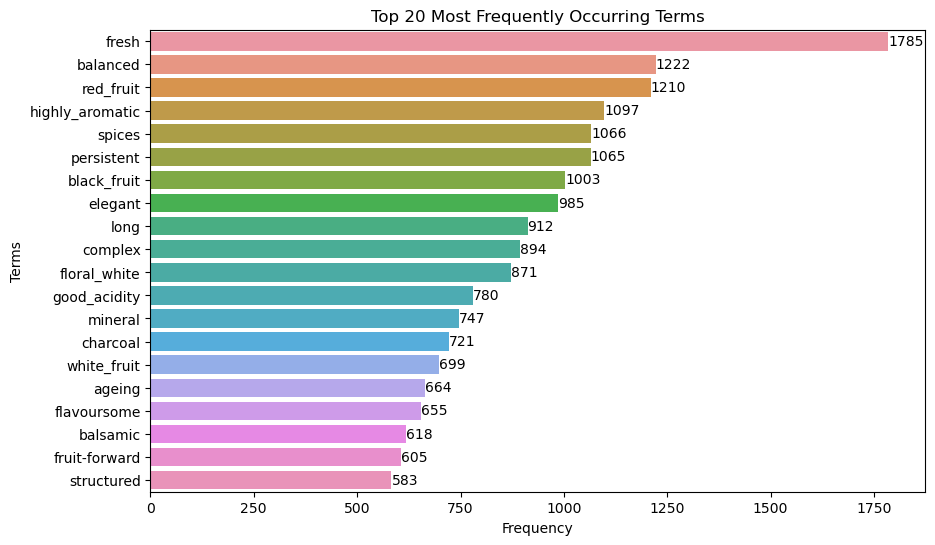

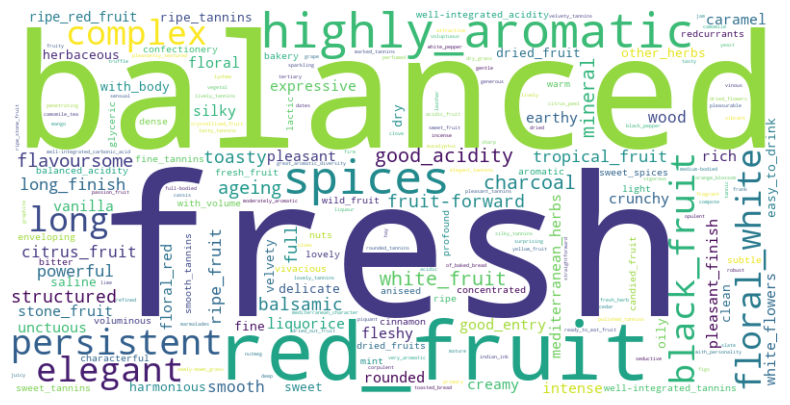

In [180]:
term_freq = exploring_text_short(text_data, "notes_norm_removed_reduced")

The corpus has been reduced from 45252 to 39141 terms. Let's have a look at the term frequency.

In [181]:
term_freq.describe()

frequency  proportion
count   332.000000   332.00000
mean    117.930723     3.09012
std     237.131991     6.21433
min       2.000000     0.05000
25%       4.000000     0.10000
50%      20.000000     0.52000
75%     107.750000     2.82000
max    1785.000000    46.78000

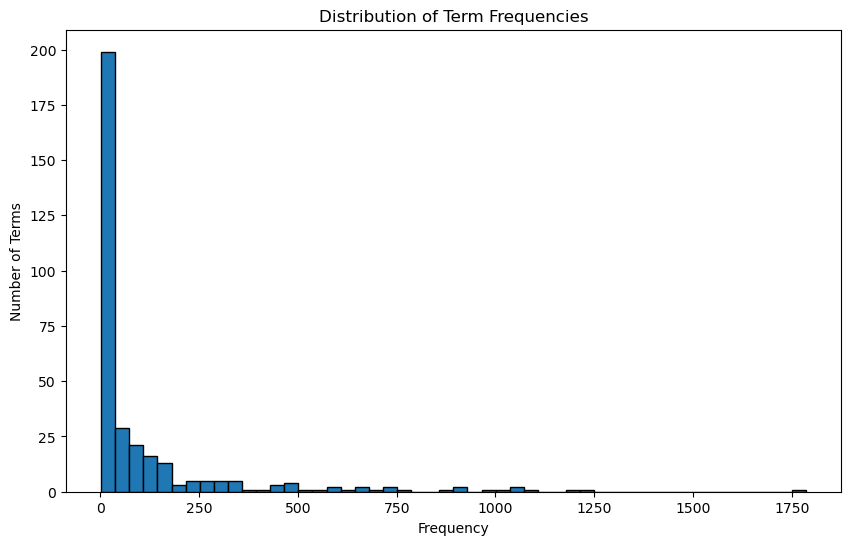

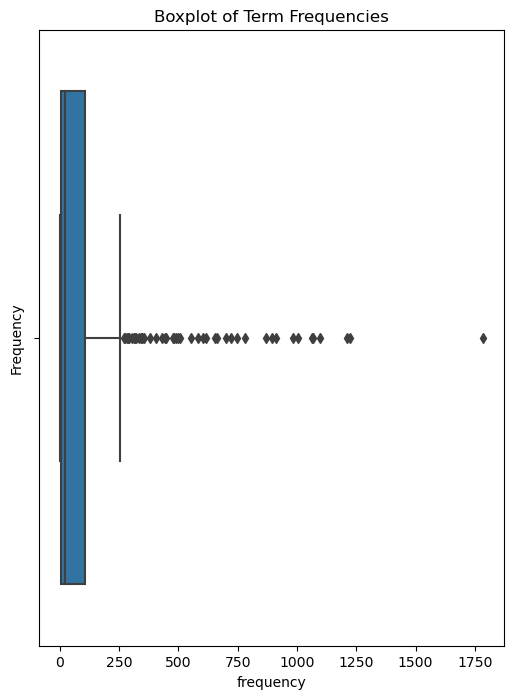

In [182]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(term_freq['frequency'], bins=50, edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.title('Distribution of Term Frequencies')
plt.show()

# Boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(x=term_freq['frequency'])
plt.ylabel('Frequency')
plt.title('Boxplot of Term Frequencies')
plt.show()

#### Increase the dropped words
We will increase the threshold for dropping words, stopping at words that appear in less than 300 wines (with higher thresholds some wines are left without descriptors).

In [183]:
for count in list(range(50, 350, 50)):
    low_count = list(term_freq[term_freq["frequency"]<count]["term"])
    drop_term = low_count
    drop_term.append("fruit")
    text_data[f"notes_norm_removed_reduced{count}"] = text_data["notes_norm_removed_joined"].apply(drop_less_freq_words)

text_data.head()

wine    year                  winery  \
0            Ultreia Saint Jacques 2021  2021.0   Raúl Pérez Viticultor   
1                        Blanc Pescador     NaN                Perelada   
2  Bach Extrísimo Blanco Semidulce 2021  2021.0              Masia Bach   
3            José Pariente Verdejo 2022  2022.0  Bodegas José Pariente    
4             Coto de Imaz Reserva 2018  2018.0        El Coto de Rioja   

   price  bottle  type_wine type_wine_details type_agriculture  \
0   16.2    0.75        Red               Red     Conventional   
1    7.8    0.75  Sparkling   Frizzante white     Conventional   
2    9.4    0.75      White             White     Conventional   
3   16.2    0.75      White             White     Conventional   
4   13.0    0.75        Red               Red     Conventional   

             region         region_gi                                grapes  \
0   Castilla y León            Bierzo                            ['Mencia']   
1  Wines without GI  Wines without GI  ['Macabeo', 'Parellada', 'Xarel·lo']   
2          Cataluña         Catalunya               ['Xarel·lo', 'Macabeo']   
3   Castilla y León             Rueda                           ['Verdejo']   
4          La Rioja             Rioja                       ['Tempranillo']   

  num_varieties                                    tasting_bouquet  \
0      Varietal                                Raspberry / Violets   
1         Blend          Aromatic / Fruit aromas / Highly aromatic   
2         Blend  Highly aromatic / Complex / Fruit aromas / Flo...   
3      Varietal           White fruit / Apricot / Fennel / Aniseed   
4      Varietal                 Ripe fruit / Spicy notes / Complex   

                                       tasting_mouth  alcohol_content  \
0   Red fruit / Mineral / Voluminous / Medium-bodied             13.5   
1                       Light / Pleasant / Sparkling             11.5   
2  Good entry / Structured / Balanced / Good acid...             11.5   
3              Rich / Unctuous / Pleasant bitterness             13.0   
4         Fleshy / Powerful / Ripe tannins / Velvety             13.5   

   customer_reviews  customer_reviews_number parker_score  parker_score_num  \
0               4.2                    217.0          NaN               NaN   
1               4.4                     45.0          NaN               NaN   
2               4.8                     95.0          NaN               NaN   
3               4.4                    147.0          NaN               NaN   
4               4.4                     94.0          NaN               NaN   

   penin_score                                              image  \
0          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
1          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
2          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
3          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
4          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   

                                                 url  \
0  https://www.vinissimus.com/en/wine/ultreia-sai...   
1  https://www.vinissimus.com/en/wine/blanc-pesca...   
2  https://www.vinissimus.com/en/wine/bach-extris...   
3  https://www.vinissimus.com/en/wine/jose-parien...   
4  https://www.vinissimus.com/en/wine/coto-de-ima...   

                                        bouquet_norm  \
0                                  raspberry violets   
1              aromatic fruit_aromas highly_aromatic   
2  highly_aromatic complex fruit_aromas floral_sc...   
3                 white_fruit apricot fennel aniseed   
4                     ripe_fruit spicy_notes complex   

                                          mouth_norm  parker_penin_score  \
0         red_fruit mineral voluminous medium-bodied                   0   
1                           light pleasant sparkling                   0   
2  good_entry structured balanced good_acidity fl...        

In [295]:
test = term_freq[term_freq["frequency"]>250]
# test

In [185]:
# list(term_freq[term_freq["frequency"]>250]["term"])

In [186]:
len(term_freq[term_freq["frequency"]<100])/len(term_freq)*100

73.79518072289156

In [187]:
len(term_freq[term_freq["frequency"]==1])/len(term_freq)*100

0.0

### New reduction of the tasting notes descriptors
We have seen that the clustering performace increases greatly when removing a large part of the descriptors (around 90%). To avoid losing all that information, we will further combine the terms together. 

In [188]:
# Dictionary that stores lists with all the different aromas and characteristics
lists = {
    # Primary aromas: from grapes and alcoholic fermentation
    "floral": ["floral_scents", "flowers", "lavender", "jasmine",
               "wild_flowers", "almond_blossom", "honeysuckle",
               "acacia_blossom", "lilies", "mimosa", "roses",
               "rose_petals", "violets", "red_flowers", "white_flowers"],
    "fruit": ["fruit", "fruit-forward", "fruit_salad", "fruity"],
    "red_fruit": ['strawberries', 'wild_strawberries', 'fresh_strawberry',
                  'strawberry_and_cream_sweet', 'strawberry-cream_candy',
                  'sharp_strawberry', 'strawberry_yogurt', 'strawberry_syrup',
                  "red_fruit_sweets", "strawberries", "cherries",
                  "fruit_of_the_forest", "blueberries", "wild_fruit",
                  "red_berries", "wild_strawberries", "fresh_strawberry",
                  "berries", "morello_cherry", "redcurrant",
                  "strawberry_and_cream_sweet", "red_fruits_sweets",
                  "sharp_strawberry", "pomegranate", "forest_fruit",
                  "bilberries", "fresh_fruit", "strawberry_tree", "redcurrants"],
    "black_fruit": ["blackberries", "raspberry", "ripe_black_fruit",
                    "ripe_cherry", "blackberry", "jammy_black_fruit",
                    "blackberry_jam", "ripe_strawberry", "red_fruit_jam",
                    "ripe_black_fruit", "blackberry_compote", "bramble",
                    "plums", "ripe_plums", "ripe_fruit", "ripe_red_fruit"],
    "green_fruit": ["apple", "green_apple", "pear", "quince",
                    "ripe_white_fruit", "fresh_grapes", "ripe_grape", "grape", "ripe_grapes"],
    "tropical_fruit": ["pineapple", "banana", "melon",
                       "passion fruit", "vine_peach", "exotic_fruit",
                       "exotic", "guava", "watermelon", "ripe_tropical_fruit",
                       "ripe_pineapple"],
    "citrus_fruit": ["citrus", "lemon", "mandarin", "orange", "grapefruit",
                     "pink_grapefruit"],
    "citrus_peel": ["orange_peel", "lemon_peel", "mandarin_peel"],
    "stone_fruit": ["peach", "white-fleshed_peaches", "flat_peach",
                    "peaches_in_syrup", "peach_peel", "peaches", "nectarine", "apricot"],
    "dried_cooked_fruits": ["dried_figs", "prunes", "raisins",
                            "raisiny_fruit", "raisined", "compote", "compote_fruit",
                            "blackberry_compote", "compotes",
                            "strawberry_compote", "fruit_compote", 'jam',
                            'raspberry_jam', 'figs', "fruit_in_liqueur",
                            "cherries_in_liqueur", "cherry_liqueur",
                            "liqueur-filled_chocolate", "blackberry_liqueur",
                            "cassis_liqueur", "sour_cherry_liqueur", "liqueur",
                            "candied_fruit"],
    "herbaceous": ["peppers", "red_pepper", 'newly-mown_grass', 'dry_grass', 'wet_grass', 'fig_tree_leaf'],
    "herbs": ["mediterranean_herbs", "thyme", "rosemary", "bay", "mountain_herbs",
              "salvia", "balsamic_herbs", "oregano",
              "aromatic_herbs", "coriander", "dill", "green_aniseed",
              "basil", "fennel", "mint", "menthol"],
    "spices": ["spicy", "black_pepper", "white_pepper", "curry", "cardamom", "liquorice"],
    "mineral": ["chalk", "flint", "talc", "clay"],
    # Secondary aromas: from the vinification process, after fermentation
    "bakery": ["butter", "pastries", "brioche", "aromas_of_baked_bread",
               "bakery_notes", "breadcrumb", "custard", "biscuit", "of_baked_bread", "white_bread"],
    "wood": ["well-integrated_wood", "oak_wood", "hardwoods", "fine_woods",
             "cedar_wood", "wood", "sandalwood", "new_wood", "exotic_woods",
             "old_wood", "smoked_wood", "wood_smoke", "boxwood",
             "woody_embers", "woodland", "oak", "toasted_oak", 'toasted_bread',
             "vanilla", "clove", "nutmeg", "coconut", "cedar", "charcoal",
             "ash", "smoke", "smoky", "phosphorus", "charcoal_smoke",
             "damp_stone", "mocha", "coffee", "chocolate", "dark_chocolate",
             "bitter_chocolate", "milk_coffee", "black_chocolate",
             "toasted_coffee", "chocolate", "dark_chocolate",
             "bitter_chocolate", "black_chocolate", "chocolate_spread",
             "coffee-filled_chocolate", "cocoa", "roasted", "resin"],
    # Tertiary aromas: from aging
    "nuts": ["almond", "hazelnuts", "walnut", "soft_almonds",
             "almonds", "toasted_almonds", "pine_nuts", "roasted_nuts",
             "and_nuts"],
    "caramel": ["toffee","candy_sweets", "baked_apple"],
    "fruit_evolution": ["dried_peach_strips", "dried_fruit_and_nuts", "toasted_dried_fruit_and",
                        "toasted_dried_fruit_and_nuts", "dried_fruit",
                        "marmalade", "candied_orange"],
    "bottle_aging": ["petrol-like", "ginger", "hay", "honey", "honeyed",
                     "multi-flower_honey", "honeycomb", "acacia_honey",
                     "honey-lemon_flavoured_candy", "rosemary_honey",
                     "leather", "scrubland", "peat", "shrubland", "earthy",
                     "earth", "damp_earth", "wet_earth", "undergrowth",
                     "tobacco", "cigar_tobacco", "dead_leaves"],
    # Other characteristics, mouthfeel
    "fresh": ["refreshing", "refreshing_acidity", "fresh_on_entry"],
    "aromatic": ['highly_aromatic', 'aromatic', 'moderately_aromatic',
                 'very_aromatic', 'great_aromatic_diversity'],
    "finish": ["long_finish", "pleasant_finish"],
    "tannins": ['ripe_tannins', 'sweet_tannins', 'well-integrated_tannins',
                'fine_tannins', 'smooth_tannins', 'rounded_tannins',
                'polished_tannins', 'silky_tannins', 'pleasant_tannins',
                'elegant_tannins', 'tannic', 'velvety_tannins',
                'marked_tannins', 'lovely_tannins', 'lively_tannins',
                'tasty_tannins', 'strong_tannins', 'vigorous_tannins',
                'enveloping_tannins', 'expressive_tannins', 'fresh_tannins',
                'young_tannins', 'fruity_tannins', 'creamy_tannins'],
    "good_acidity": ['good_acidity', 'well-integrated_acidity',
                     'balanced_acidity', 'well-integrated_carbonic_acid',
                     'sweetness_and_acidity_balanced']
}

Term Frequency Analysis
There is a total of 39708 terms in notes_norm_removed_new_reduction.
Which are the most common terms?


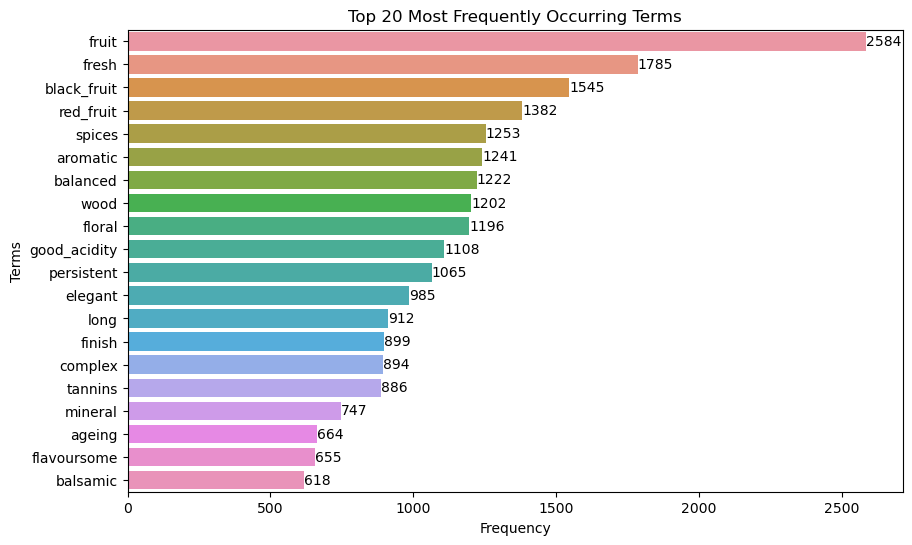

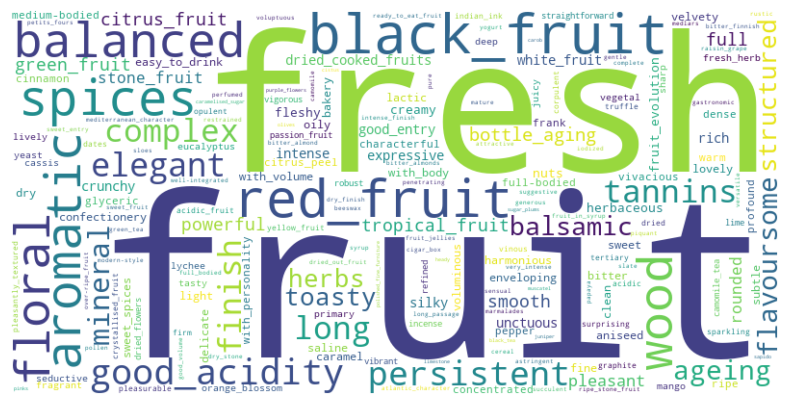

In [189]:
text_data["notes_norm_removed_new_reduction"] = text_data["notes_norm_removed"].apply(join_tasting_notes)
term_freq = exploring_text_short(text_data, "notes_norm_removed_new_reduction")

In [190]:
term_freq.describe()

frequency  proportion
count   347.000000  347.000000
mean    114.432277    2.999539
std     295.502429    7.743576
min       1.000000    0.030000
25%       1.500000    0.040000
50%       6.000000    0.160000
75%      56.000000    1.470000
max    2584.000000   67.710000

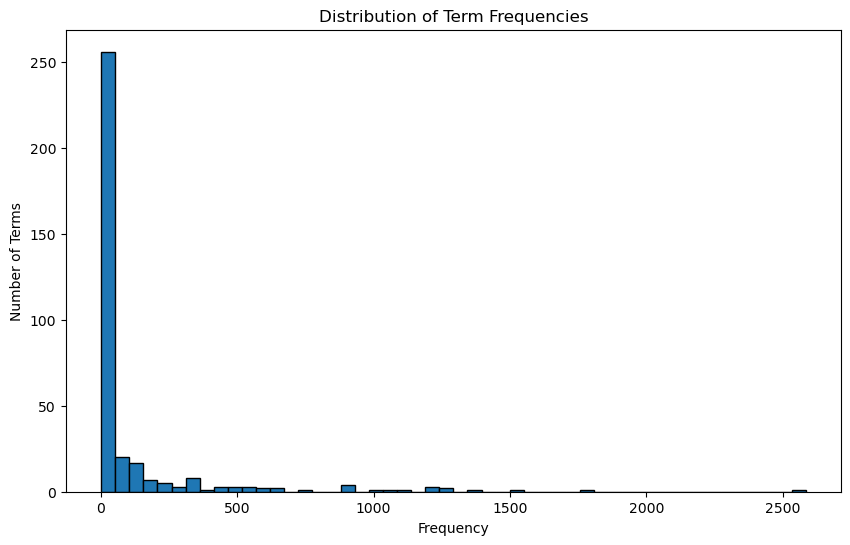

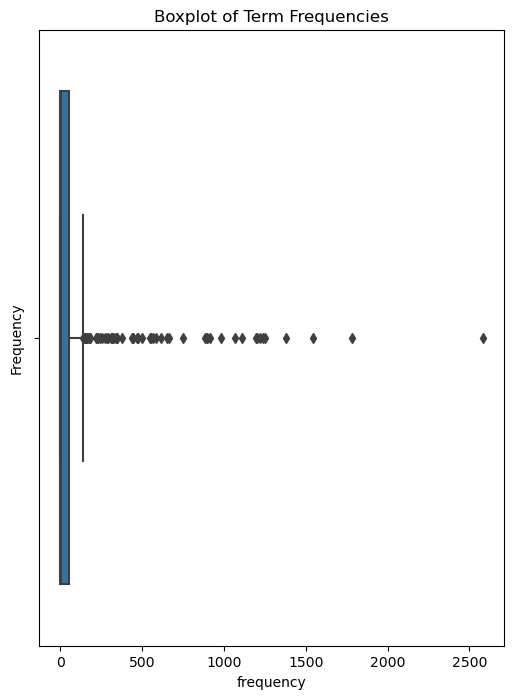

In [191]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(term_freq['frequency'], bins=50, edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.title('Distribution of Term Frequencies')
plt.show()

# Boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(x=term_freq['frequency'])
plt.ylabel('Frequency')
plt.title('Boxplot of Term Frequencies')
plt.show()

In [192]:
# term_freq[term_freq["frequency"]<300]

In [193]:
low_count = list(term_freq[term_freq["frequency"]<300]["term"])
drop_term = low_count + ["fruit"]  # Add "fruit" to the drop_term list

In [194]:
def drop_less_freq_words(text):
    # Convert the text into a list
    text_list = text.split()

    # Apply the replace function to each word in the list, excluding words in drop_term
    replaced_list = [word for word in text_list if word not in drop_term]
    
    # Join list into text
    replaced_text = " ".join(replaced_list)
    
    return replaced_text

Term Frequency Analysis
There is a total of 28312 terms in notes_norm_removed_new_reduction_dropped.
Which are the most common terms?


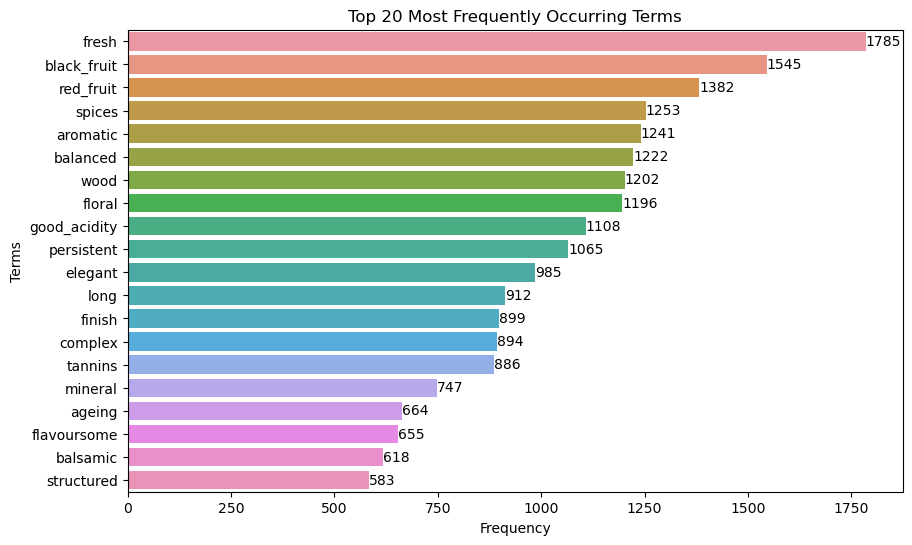

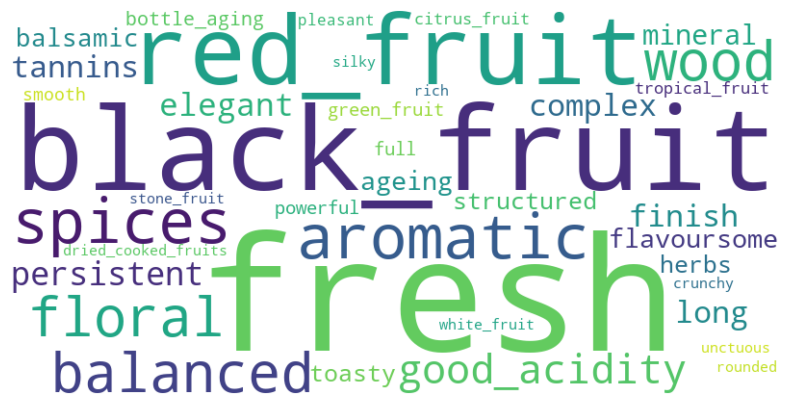

In [195]:
text_data["notes_norm_removed_new_reduction_dropped"] = text_data["notes_norm_removed_new_reduction"].apply(drop_less_freq_words)
term_freq = exploring_text_short(text_data, "notes_norm_removed_new_reduction_dropped")

In [196]:
term_freq.describe()

frequency  proportion
count    38.000000   38.000000
mean    745.052632   19.524737
std     396.189618   10.383026
min     313.000000    8.200000
25%     440.000000   11.527500
50%     600.500000   15.735000
75%    1045.000000   27.385000
max    1785.000000   46.780000

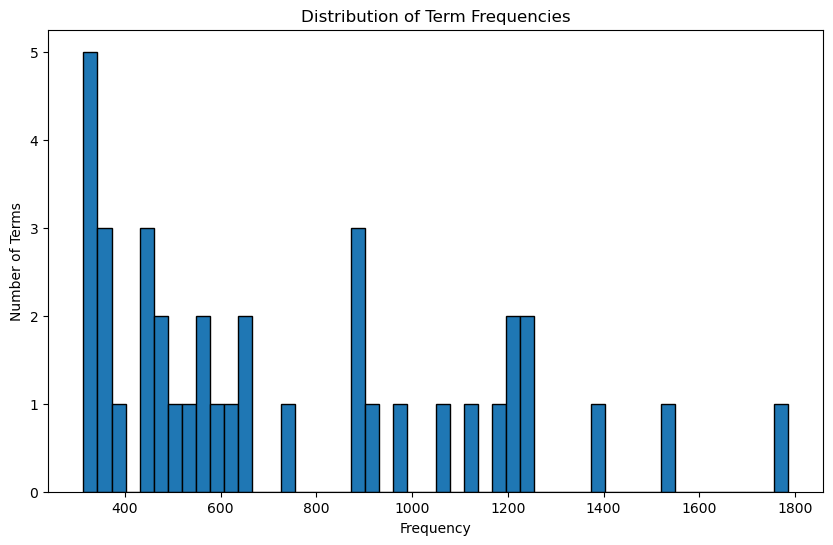

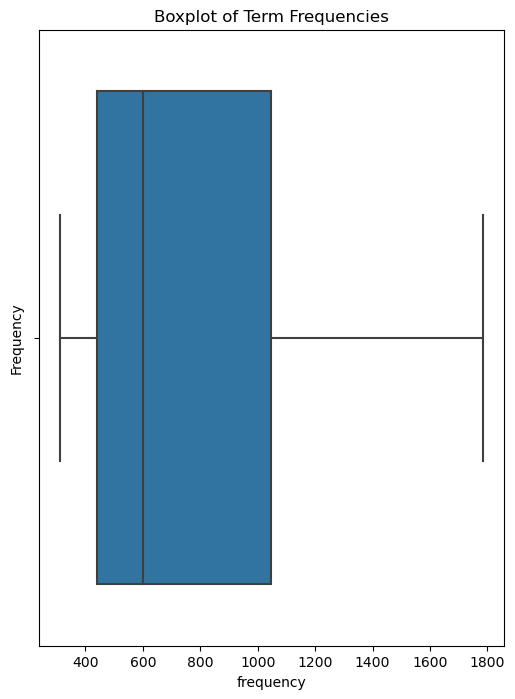

In [197]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(term_freq['frequency'], bins=50, edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.title('Distribution of Term Frequencies')
plt.show()

# Boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(x=term_freq['frequency'])
plt.ylabel('Frequency')
plt.title('Boxplot of Term Frequencies')
plt.show()

In [199]:
list(term_freq["term"].unique())

['fresh',
 'black_fruit',
 'red_fruit',
 'spices',
 'aromatic',
 'balanced',
 'wood',
 'floral',
 'good_acidity',
 'persistent',
 'elegant',
 'long',
 'finish',
 'complex',
 'tannins',
 'mineral',
 'ageing',
 'flavoursome',
 'balsamic',
 'structured',
 'herbs',
 'toasty',
 'bottle_aging',
 'powerful',
 'full',
 'green_fruit',
 'tropical_fruit',
 'smooth',
 'citrus_fruit',
 'pleasant',
 'stone_fruit',
 'rounded',
 'dried_cooked_fruits',
 'unctuous',
 'white_fruit',
 'crunchy',
 'silky',
 'rich']

One could think that "balanced" and "rounded" are the same, or "smooth" and "pleasant", but when you look at the bibliography there are differences between the terms. They could probably be somehow simplified but we would need expert knowledge for that. It could be done in a next iteration.

# Export the data

In [200]:
text_data.to_csv("text_data_new_clean.csv", index=False)

In [201]:
text_data.head()

wine    year                  winery  \
0            Ultreia Saint Jacques 2021  2021.0   Raúl Pérez Viticultor   
1                        Blanc Pescador     NaN                Perelada   
2  Bach Extrísimo Blanco Semidulce 2021  2021.0              Masia Bach   
3            José Pariente Verdejo 2022  2022.0  Bodegas José Pariente    
4             Coto de Imaz Reserva 2018  2018.0        El Coto de Rioja   

   price  bottle  type_wine type_wine_details type_agriculture  \
0   16.2    0.75        Red               Red     Conventional   
1    7.8    0.75  Sparkling   Frizzante white     Conventional   
2    9.4    0.75      White             White     Conventional   
3   16.2    0.75      White             White     Conventional   
4   13.0    0.75        Red               Red     Conventional   

             region         region_gi                                grapes  \
0   Castilla y León            Bierzo                            ['Mencia']   
1  Wines without GI  Wines without GI  ['Macabeo', 'Parellada', 'Xarel·lo']   
2          Cataluña         Catalunya               ['Xarel·lo', 'Macabeo']   
3   Castilla y León             Rueda                           ['Verdejo']   
4          La Rioja             Rioja                       ['Tempranillo']   

  num_varieties                                    tasting_bouquet  \
0      Varietal                                Raspberry / Violets   
1         Blend          Aromatic / Fruit aromas / Highly aromatic   
2         Blend  Highly aromatic / Complex / Fruit aromas / Flo...   
3      Varietal           White fruit / Apricot / Fennel / Aniseed   
4      Varietal                 Ripe fruit / Spicy notes / Complex   

                                       tasting_mouth  alcohol_content  \
0   Red fruit / Mineral / Voluminous / Medium-bodied             13.5   
1                       Light / Pleasant / Sparkling             11.5   
2  Good entry / Structured / Balanced / Good acid...             11.5   
3              Rich / Unctuous / Pleasant bitterness             13.0   
4         Fleshy / Powerful / Ripe tannins / Velvety             13.5   

   customer_reviews  customer_reviews_number parker_score  parker_score_num  \
0               4.2                    217.0          NaN               NaN   
1               4.4                     45.0          NaN               NaN   
2               4.8                     95.0          NaN               NaN   
3               4.4                    147.0          NaN               NaN   
4               4.4                     94.0          NaN               NaN   

   penin_score                                              image  \
0          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
1          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
2          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
3          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
4          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   

                                                 url  \
0  https://www.vinissimus.com/en/wine/ultreia-sai...   
1  https://www.vinissimus.com/en/wine/blanc-pesca...   
2  https://www.vinissimus.com/en/wine/bach-extris...   
3  https://www.vinissimus.com/en/wine/jose-parien...   
4  https://www.vinissimus.com/en/wine/coto-de-ima...   

                                        bouquet_norm  \
0                                  raspberry violets   
1              aromatic fruit_aromas highly_aromatic   
2  highly_aromatic complex fruit_aromas floral_sc...   
3                 white_fruit apricot fennel aniseed   
4                     ripe_fruit spicy_notes complex   

                                          mouth_norm  parker_penin_score  \
0         red_fruit mineral voluminous medium-bodied                   0   
1                           light pleasant sparkling                   0   
2  good_entry structured balanced good_acidity fl...        

In [202]:
vinissimus.head()

wine    year                  winery  \
0            Ultreia Saint Jacques 2021  2021.0   Raúl Pérez Viticultor   
1                        Blanc Pescador     NaN                Perelada   
2  Bach Extrísimo Blanco Semidulce 2021  2021.0              Masia Bach   
3            José Pariente Verdejo 2022  2022.0  Bodegas José Pariente    
4             Coto de Imaz Reserva 2018  2018.0        El Coto de Rioja   

   price  bottle  type_wine type_wine_details type_agriculture  \
0   16.2    0.75        Red               Red     Conventional   
1    7.8    0.75  Sparkling   Frizzante white     Conventional   
2    9.4    0.75      White             White     Conventional   
3   16.2    0.75      White             White     Conventional   
4   13.0    0.75        Red               Red     Conventional   

             region         region_gi                                grapes  \
0   Castilla y León            Bierzo                            ['Mencia']   
1  Wines without GI  Wines without GI  ['Macabeo', 'Parellada', 'Xarel·lo']   
2          Cataluña         Catalunya               ['Xarel·lo', 'Macabeo']   
3   Castilla y León             Rueda                           ['Verdejo']   
4          La Rioja             Rioja                       ['Tempranillo']   

  num_varieties                                    tasting_bouquet  \
0      Varietal                                Raspberry / Violets   
1         Blend          Aromatic / Fruit aromas / Highly aromatic   
2         Blend  Highly aromatic / Complex / Fruit aromas / Flo...   
3      Varietal           White fruit / Apricot / Fennel / Aniseed   
4      Varietal                 Ripe fruit / Spicy notes / Complex   

                                       tasting_mouth  alcohol_content  \
0   Red fruit / Mineral / Voluminous / Medium-bodied             13.5   
1                       Light / Pleasant / Sparkling             11.5   
2  Good entry / Structured / Balanced / Good acid...             11.5   
3              Rich / Unctuous / Pleasant bitterness             13.0   
4         Fleshy / Powerful / Ripe tannins / Velvety             13.5   

   customer_reviews  customer_reviews_number parker_score  parker_score_num  \
0               4.2                    217.0          NaN               NaN   
1               4.4                     45.0          NaN               NaN   
2               4.8                     95.0          NaN               NaN   
3               4.4                    147.0          NaN               NaN   
4               4.4                     94.0          NaN               NaN   

   penin_score                                              image  \
0          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
1          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
2          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
3          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
4          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   

                                                 url  \
0  https://www.vinissimus.com/en/wine/ultreia-sai...   
1  https://www.vinissimus.com/en/wine/blanc-pesca...   
2  https://www.vinissimus.com/en/wine/bach-extris...   
3  https://www.vinissimus.com/en/wine/jose-parien...   
4  https://www.vinissimus.com/en/wine/coto-de-ima...   

                                        bouquet_norm  \
0                                  raspberry violets   
1              aromatic fruit_aromas highly_aromatic   
2  highly_aromatic complex fruit_aromas floral_sc...   
3                 white_fruit apricot fennel aniseed   
4                     ripe_fruit spicy_notes complex   

                                          mouth_norm  parker_penin_score  
0         red_fruit mineral voluminous medium-bodied                   0  
1                           light pleasant sparkling                   0  
2  good_entry structured balanced good_acidity fl...           

In [203]:
# Add the reduced tasting notes to the full dataframe with all the rows

wine = vinissimus.merge(text_data[["wine", "notes_norm_removed"]], how="left", left_on="wine", right_on="wine")
wine.head()

wine    year                  winery  \
0            Ultreia Saint Jacques 2021  2021.0   Raúl Pérez Viticultor   
1                        Blanc Pescador     NaN                Perelada   
2  Bach Extrísimo Blanco Semidulce 2021  2021.0              Masia Bach   
3            José Pariente Verdejo 2022  2022.0  Bodegas José Pariente    
4             Coto de Imaz Reserva 2018  2018.0        El Coto de Rioja   

   price  bottle  type_wine type_wine_details type_agriculture  \
0   16.2    0.75        Red               Red     Conventional   
1    7.8    0.75  Sparkling   Frizzante white     Conventional   
2    9.4    0.75      White             White     Conventional   
3   16.2    0.75      White             White     Conventional   
4   13.0    0.75        Red               Red     Conventional   

             region         region_gi                                grapes  \
0   Castilla y León            Bierzo                            ['Mencia']   
1  Wines without GI  Wines without GI  ['Macabeo', 'Parellada', 'Xarel·lo']   
2          Cataluña         Catalunya               ['Xarel·lo', 'Macabeo']   
3   Castilla y León             Rueda                           ['Verdejo']   
4          La Rioja             Rioja                       ['Tempranillo']   

  num_varieties                                    tasting_bouquet  \
0      Varietal                                Raspberry / Violets   
1         Blend          Aromatic / Fruit aromas / Highly aromatic   
2         Blend  Highly aromatic / Complex / Fruit aromas / Flo...   
3      Varietal           White fruit / Apricot / Fennel / Aniseed   
4      Varietal                 Ripe fruit / Spicy notes / Complex   

                                       tasting_mouth  alcohol_content  \
0   Red fruit / Mineral / Voluminous / Medium-bodied             13.5   
1                       Light / Pleasant / Sparkling             11.5   
2  Good entry / Structured / Balanced / Good acid...             11.5   
3              Rich / Unctuous / Pleasant bitterness             13.0   
4         Fleshy / Powerful / Ripe tannins / Velvety             13.5   

   customer_reviews  customer_reviews_number parker_score  parker_score_num  \
0               4.2                    217.0          NaN               NaN   
1               4.4                     45.0          NaN               NaN   
2               4.8                     95.0          NaN               NaN   
3               4.4                    147.0          NaN               NaN   
4               4.4                     94.0          NaN               NaN   

   penin_score                                              image  \
0          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
1          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
2          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
3          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
4          NaN  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   

                                                 url  \
0  https://www.vinissimus.com/en/wine/ultreia-sai...   
1  https://www.vinissimus.com/en/wine/blanc-pesca...   
2  https://www.vinissimus.com/en/wine/bach-extris...   
3  https://www.vinissimus.com/en/wine/jose-parien...   
4  https://www.vinissimus.com/en/wine/coto-de-ima...   

                                        bouquet_norm  \
0                                  raspberry violets   
1              aromatic fruit_aromas highly_aromatic   
2  highly_aromatic complex fruit_aromas floral_sc...   
3                 white_fruit apricot fennel aniseed   
4                     ripe_fruit spicy_notes complex   

                                          mouth_norm  parker_penin_score  \
0         red_fruit mineral voluminous medium-bodied                   0   
1                           light pleasant sparkling                   0   
2  good_entry structured balanced good_acidity fl...        

In [204]:
wine = wine.rename(columns={"notes_norm_removed": "tasting_notes"})

wine = wine[['wine', 'year', 'winery', 'price', 'bottle',
       'type_wine', 'type_wine_details', 'grapes', 'num_varieties', 'type_agriculture', 'region',
       'region_gi', 'alcohol_content', 'tasting_notes', 'customer_reviews',
       'customer_reviews_number', 'parker_score', 'parker_score_num',
       'penin_score', 'image', 'url']]

wine.head()

wine    year                  winery  \
0            Ultreia Saint Jacques 2021  2021.0   Raúl Pérez Viticultor   
1                        Blanc Pescador     NaN                Perelada   
2  Bach Extrísimo Blanco Semidulce 2021  2021.0              Masia Bach   
3            José Pariente Verdejo 2022  2022.0  Bodegas José Pariente    
4             Coto de Imaz Reserva 2018  2018.0        El Coto de Rioja   

   price  bottle  type_wine type_wine_details  \
0   16.2    0.75        Red               Red   
1    7.8    0.75  Sparkling   Frizzante white   
2    9.4    0.75      White             White   
3   16.2    0.75      White             White   
4   13.0    0.75        Red               Red   

                                 grapes num_varieties type_agriculture  \
0                            ['Mencia']      Varietal     Conventional   
1  ['Macabeo', 'Parellada', 'Xarel·lo']         Blend     Conventional   
2               ['Xarel·lo', 'Macabeo']         Blend     Conventional   
3                           ['Verdejo']      Varietal     Conventional   
4                       ['Tempranillo']      Varietal     Conventional   

             region         region_gi  alcohol_content  \
0   Castilla y León            Bierzo             13.5   
1  Wines without GI  Wines without GI             11.5   
2          Cataluña         Catalunya             11.5   
3   Castilla y León             Rueda             13.0   
4          La Rioja             Rioja             13.5   

                                       tasting_notes  customer_reviews  \
0  red_fruit mineral voluminous medium-bodied ras...               4.2   
1  light pleasant sparkling aromatic fruit highly...               4.4   
2  good_entry structured balanced good_acidity fl...               4.8   
3  rich unctuous pleasant_bitterness white_fruit ...               4.4   
4  fleshy powerful ripe_tannins velvety ripe_frui...               4.4   

   customer_reviews_number parker_score  parker_score_num  penin_score  \
0                    217.0          NaN               NaN          NaN   
1                     45.0          NaN               NaN          NaN   
2                     95.0          NaN               NaN          NaN   
3                    147.0          NaN               NaN          NaN   
4                     94.0          NaN               NaN          NaN   

                                               image  \
0  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
1  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
2  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
3  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   
4  https://cdn.vinissimus.com/img/unsafe/p500x/pl...   

                                                 url  
0  https://www.vinissimus.com/en/wine/ultreia-sai...  
1  https://www.vinissimus.com/en/wine/blanc-pesca...  
2  https://www.vinissimus.com/en/wine/bach-extris...  
3  https://www.vinissimus.com/en/wine/jose-parien...  
4  https://www.vinissimus.com/en/wine/coto-de-ima...

In [205]:
wine.to_csv("cleaned_wine_data.csv", index=False)

In [206]:
wine["tasting_notes_list"] = wine["tasting_notes"].str.split(" ") # turns each value into a list
wine_exploded_tasting_notes = wine.explode("tasting_notes_list")
wine_exploded_tasting_notes.shape

(46939, 22)

In [207]:
wine_exploded_tasting_notes.to_csv("wine_exploded_tasting_notes.csv", index=False)